### Project Website: https://mohamedirfan-cz1015-fsp2t08.imfast.io/

## Importing Essential Libraries
Other than the essential libraries that were learnt and used in the labs such as Numpy, Pandas, Seaborn and the various sklearn functions, other libraries that were used in this portion of the project includes the libraries needed for regression modelling as well as for model analysis such as:
- XGBoost Library: https://xgboost.readthedocs.io/en/latest/build.html
- CatBoost: https://catboost.ai/docs/concepts/python-installation.html
- RandomForestRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- Ridge Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- Lasso Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
- TreeInterpreter: https://pypi.org/project/treeinterpreter/

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Libraries used for Modelling
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

## Importing Dataset

The dataset,  which is in csv format, is named 'listings.csv'. Based on the work done during Exploratory Analysis, we have concluded that the predictor variables that might have the greatest impact on price are:
- Room Type
- Property Type
- Number of Bedrooms
- Amenities
- Number of Reviews

As such, we single out these variables (together with price) to form a new dataframe.

In [2]:
listingDF =  pd.read_csv('datasets/listings.csv')

In [3]:
newListingsDF = listingDF[['room_type','property_type','bedrooms','amenities','number_of_reviews', 'price']]
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
room_type            3818 non-null object
property_type        3817 non-null object
bedrooms             3812 non-null float64
amenities            3818 non-null object
number_of_reviews    3818 non-null int64
price                3818 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 179.1+ KB


## Data-Cleaning

Data Cleaning is done to remove the irrelevant/insignificant parts of the data, modify the data for easy manipulation and correcting them so as to prepare them for modelling.


###  Amenities
- Displays the different types of amenities available for each listing

To clean the data in this variable: 
- Checking and listing down all the different amenities that were offered
- Separating the different amenities and creating a dedicated column for each amenity
- Removing amenities which have NULL values for all listings

In [4]:
# Creating a set of all possible amenities
amenities_list = list(newListingsDF.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

In [5]:
# Creating column variables for each of the different amenities and adding them into the original dataframe
newListingsDF.loc[newListingsDF['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('TV'), 'tv'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Elevator'), 'elevator'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('parking'), 'parking'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

C:\Users\krist\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\krist\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\krist\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [6]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = newListingsDF.iloc[:,41:].columns
newListingsDF[cols_to_replace_nulls] = newListingsDF[cols_to_replace_nulls].fillna(0)

# Dropping the original amenities variable
newListingsDF.drop('amenities', axis=1, inplace=True)

C:\Users\krist\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
# Removing the amenities which have all NULL values for all listings
newListingsDF = newListingsDF.dropna(axis=1, how='all')
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
room_type                3818 non-null object
property_type            3817 non-null object
bedrooms                 3812 non-null float64
number_of_reviews        3818 non-null int64
price                    3818 non-null object
breakfast                291 non-null float64
tv                       2741 non-null float64
white_goods              3134 non-null float64
elevator                 785 non-null float64
gym                      442 non-null float64
hot_tub_sauna_or_pool    159 non-null float64
internet                 3692 non-null float64
pets_allowed             1169 non-null float64
secure                   727 non-null float64
accessible               300 non-null float64
dtypes: float64(11), int64(1), object(3)
memory usage: 447.5+ KB


### Property Type
- Displays the property type of a listing

To clean the data in this variable: 
- Grouping property types whose low counts might be insignificant and not provide us with enough information
- Thus, grouping property types that have counts that are < 30

In [8]:
newListingsDF.head()

,room_type,property_type,bedrooms,number_of_reviews,price,breakfast,tv,white_goods,elevator,gym,hot_tub_sauna_or_pool,internet,pets_allowed,secure,accessible
0,Entire home/apt,Apartment,1.0,207,$85.00,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,Entire home/apt,Apartment,1.0,43,$150.00,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
2,Entire home/apt,House,5.0,20,$975.00,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN
3,Entire home/apt,Apartment,0.0,0,$100.00,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
4,Entire home/apt,House,3.0,38,$450.00,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [9]:
# Checking to see the total number of each type of property 
newListingsDF.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [10]:
# Grouping property types with less than <30 count into 'Other'
newListingsDF.loc[~newListingsDF.property_type.isin(['House', 'Apartment','Townhouse','Condominium','Loft',"Bed & Breakfast"]), 'property_type'] = 'Other'
newListingsDF.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Other                91
Condominium          91
Loft                 40
Bed & Breakfast      37
Name: property_type, dtype: int64

### Price
- Displays the price/cost of a listing

To clean the data in this variable: 
- Since the Price variable is currently a string (with the "$" symbol), the variable is thus converted into an integer 

In [11]:
newListingsDF.price = newListingsDF.price.str[1:-3]
newListingsDF.price = newListingsDF.price.str.replace(",", "")
newListingsDF.price = newListingsDF.price.astype('int64')
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
room_type                3818 non-null object
property_type            3818 non-null object
bedrooms                 3812 non-null float64
number_of_reviews        3818 non-null int64
price                    3818 non-null int64
breakfast                291 non-null float64
tv                       2741 non-null float64
white_goods              3134 non-null float64
elevator                 785 non-null float64
gym                      442 non-null float64
hot_tub_sauna_or_pool    159 non-null float64
internet                 3692 non-null float64
pets_allowed             1169 non-null float64
secure                   727 non-null float64
accessible               300 non-null float64
dtypes: float64(11), int64(2), object(2)
memory usage: 447.5+ KB


Ensuring that there are no NULL entries in the data

In [12]:
# To convert NaN values to 0 for preparation for Modelling
newListingsDF = newListingsDF.fillna(0)
# Checking to ensure that there are no NULL entries
newListingsDF.isnull().sum()

room_type                0
property_type            0
bedrooms                 0
number_of_reviews        0
price                    0
breakfast                0
tv                       0
white_goods              0
elevator                 0
gym                      0
hot_tub_sauna_or_pool    0
internet                 0
pets_allowed             0
secure                   0
accessible               0
dtype: int64

## Regression Models

Regression models are used to target a prediction value based on independent variables and it is mostly used for finding out the relationship between variables as well as preidction/forecasting.

Here, we use regression models to help predict the price based on the significant predictor variables identified in Exploratory Analysis.
> - **Predictor Variables**: Room_type, Property_type, Bedrooms, Number_of_Reviews, Amenities
> - **Response Variable**: Price

The following regression models will be carried out:

- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest Regression
- XGBoost
- CatBoost

### Data Preparation
The following will be done to the data to ensure its fit into the different regression models:
- Encoding the categorical variables so that it can be fit into the regression models
- Separating the data into predictor and response variables
- Separating the data into training and testing sets (Training Sets: Testing Sets = 80% : 20%)

In [13]:
# One-hot encode the Categorial variables
transformedDF = pd.get_dummies(newListingsDF, columns=['room_type','property_type'])

#renaming some categories to remove '/' and blank spaces
newTransformedDF = transformedDF.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Private room': 'room_type_Private_room'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})
newTransformedDF =newTransformedDF.rename(columns={'property_type_Bed & Breakfast': 'property_type_Bed_and_Breakfast'})

newTransformedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 23 columns):
bedrooms                           3818 non-null float64
number_of_reviews                  3818 non-null int64
price                              3818 non-null int64
breakfast                          3818 non-null float64
tv                                 3818 non-null float64
white_goods                        3818 non-null float64
elevator                           3818 non-null float64
gym                                3818 non-null float64
hot_tub_sauna_or_pool              3818 non-null float64
internet                           3818 non-null float64
pets_allowed                       3818 non-null float64
secure                             3818 non-null float64
accessible                         3818 non-null float64
room_type_Entire_home_apt          3818 non-null uint8
room_type_Private_room             3818 non-null uint8
room_type_Shared_room              3818 non-nu

In [14]:
# Separating X and y for Modelling
X = pd.DataFrame(newTransformedDF[["bedrooms", "breakfast", "tv", "white_goods", "elevator", "gym", "hot_tub_sauna_or_pool",
                              "internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private_room", "room_type_Shared_room", "property_type_Apartment",
                              "property_type_Bed_and_Breakfast", "property_type_Condominium", "property_type_House",
                              "property_type_Loft", "property_type_Other", "property_type_Townhouse"]]) #Predictor Variables
y = pd.DataFrame(newTransformedDF["price"]) #Response Variables

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [15]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Model 1: Linear Regression
Linear Regression is a machine learning algorithm that is based on supervised learning. It performs the regression task to predict a dependent variable value (in this case, price) based on given independent variables (in this case, the identified predictor variables). 

It then tries to find a linear relationship between the variables and predicts the price based on the linear line. 

Here, we have trained the model to follow the following formula:
> Regression Problem : Price = $a$ $\times$ (Predictor Variables) + $b$

The above is a general formula, however, since we have multiple predictor variables, there will be more than 1 coefficient (one for each predictor variable). 

In [16]:
# Creating and fitting the model
linreg = LinearRegression()     
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [127.93146603]

                         Predictors  Coefficients
0                          bedrooms  5.106230e+01
1                         breakfast -5.563736e-01
2                                tv  1.801059e+00
3                       white_goods -1.265723e-01
4                          elevator  1.139565e+01
5                               gym -5.270804e-01
6             hot_tub_sauna_or_pool  2.731474e+00
7                          internet -1.377591e+00
8                      pets_allowed -2.416784e+00
9                            secure  1.252139e+00
10                       accessible -6.347549e-01
11                number_of_reviews -4.191239e+00
12        room_type_Entire_home_apt -5.146741e+13
13           room_type_Private_room -5.016964e+13
14            room_type_Shared_room -1.880126e+13
15          property_type_Apartment -4.569800e+12
16  property_type_Bed_and_Breakfast -9.003602e+11
17        property_type_Condominium -1.401885e+12
18

**Note that**:
A positive coefficient indicates that as the predictor variable increases, the response variable also increases. 
A negative coefficient indicates that as the predictor variable increases, the response variable decreases.

In [18]:
# Predict Response corresponding to Predictors
trainPredictionLR = linreg.predict(X_train)
testPredictionLR = linreg.predict(X_test)

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

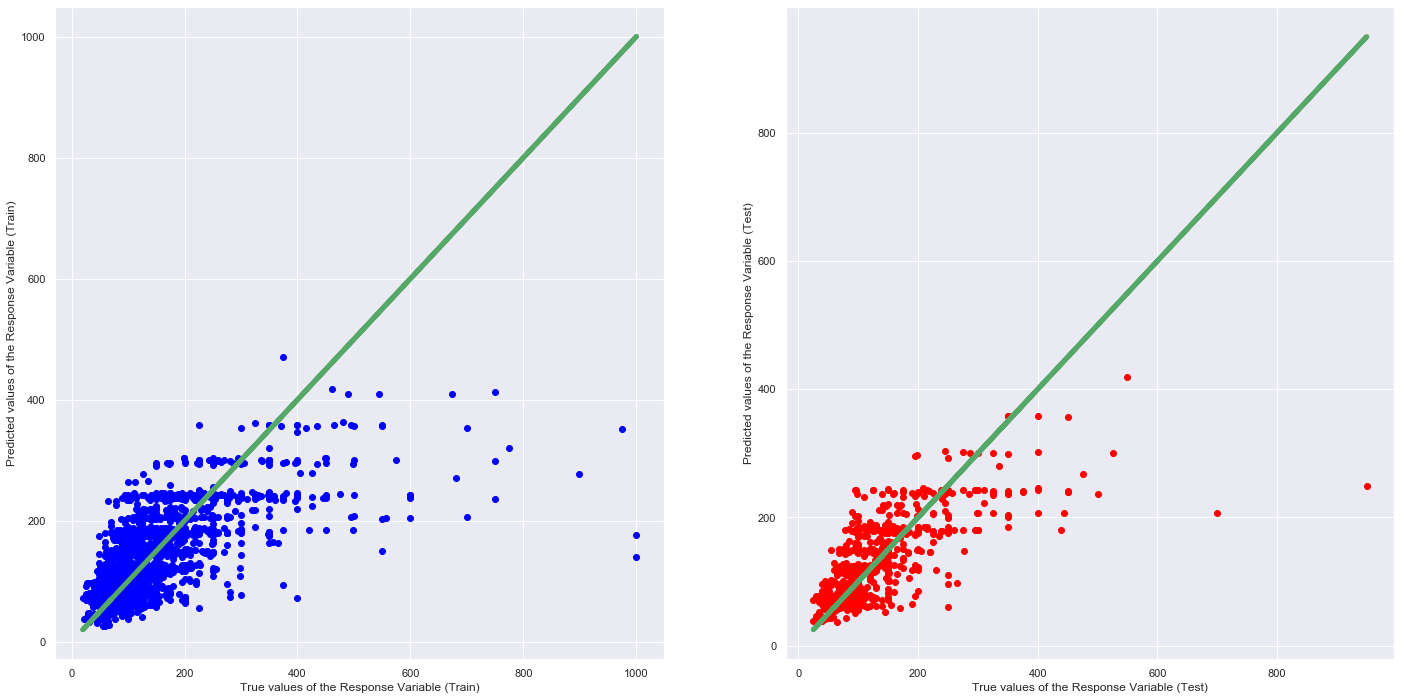

In [19]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the Linear Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted. 

### Model 2: Ridge Regression


Ridge Regression is meant to be an upgrade to linear regression. It is similar to linear regression where it can be used to for regression and classification.

Ridge Regression is good at handling overfitting.

The difference in the equation for Ridge Regression is that it penalize RSS by adding another term and search for the minimization.

We can iterate different $\lambda$ values as the additional term to find the best fit for a Ridge Regression model.

Ridge Regression does not drop any predictors unlike Lasso Regression, which is we will observe later on that the beta estimate will only converge to zero, but never reach zero.



In [20]:
#numpy array used for plotting Ridge and Lasson Regression later on
varArr = np.array(["bedrooms", "breakfast", "tv", "white_goods", "elevator", "gym", "hot_tub_sauna_or_pool",
"internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private room", "room_type_Shared_room", "property_type_Apartment",
                              "property_type_Bed_and_Breakfast", "property_type_Condominium", "property_type_House",
                              "property_type_Loft", "property_type_Other", "property_type_Townhouse"])

In [21]:
# initializing the model
ridgeReg = Ridge(alpha=0).fit(X_train,y_train) #alpha is the lambda value

#store the predictions for each lambda/alpha value
ridgeTrainPred = []
ridgeTestPred = []
ridgeR2score = [] # store all the R2 values
lambdaVal = [] #store all values of lambda
#for plotting
ridgeDF = pd.DataFrame({'variable': varArr, 'estimate': ridgeReg.coef_.ravel()})


lambdas = np.arange(0,2000,1) #lambda value of 0 to positive 2000, in intervals of 1

for alpha in lambdas:
    ridgeReg = Ridge(alpha=alpha)
    ridgeReg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridgeDF[var_name] = ridgeReg.coef_.ravel()
    #prediction
    ridgeTrainPred.append(ridgeReg.predict(X_train))
    ridgeTestPred.append(ridgeReg.predict(X_test))
    #storing the R2 scores and lambda value
    ridgeR2score.append(ridgeReg.score(X_train,y_train))
    lambdaVal.append(alpha)

ridgeDF = ridgeDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()


bestRidgeR2 = max(ridgeR2score)
print("The highest R2 value: ",bestRidgeR2)
print("The value of lambda that minimises: ",lambdaVal[ridgeR2score.index(bestRidgeR2)])


#Using the best fit Ridge Regression Model's predictions
trainPredictionRidge = ridgeTrainPred[ridgeR2score.index(bestRidgeR2)]
testPredictionRidge = ridgeTestPred[ridgeR2score.index(bestRidgeR2)]
ridgeDF.head()

C:\Users\krist\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.04412e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\krist\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.04412e-17): result may not be accurate.
  overwrite_a=True).T


The highest R2 value:  0.5004900033244232
The value of lambda that minimises:  0


variable,1,bedrooms,breakfast,tv,white_goods,elevator,gym,hot_tub_sauna_or_pool,internet,pets_allowed,...,room_type_Entire_home_apt,room_type_Private room,room_type_Shared_room,property_type_Apartment,property_type_Bed_and_Breakfast,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse
0,estimate,51.024914,-0.543827,1.805002,-0.119241,11.401172,-0.527518,2.728198,-1.392275,-2.420019,...,-8.264163,-30.727846,-16.815040,-6.891969,2.066148,-2.250754,-4.351714,3.168583,1.789534,-1.368172
1,estimate0,51.024914,-0.543827,1.805002,-0.119241,11.401172,-0.527518,2.728198,-1.392275,-2.420019,...,-8.264163,-30.727846,-16.815040,-6.891969,2.066148,-2.250754,-4.351714,3.168583,1.789534,-1.368172
2,estimate1,51.004138,-0.544734,1.808480,-0.116778,11.391254,-0.522437,2.728156,-1.392380,-2.419528,...,13.026036,-9.976984,-9.035278,-2.375454,2.955520,-0.863653,0.175242,4.091308,3.173620,0.204698
3,estimate2,50.983384,-0.545639,1.811954,-0.114319,11.381354,-0.517369,2.728114,-1.392485,-2.419037,...,13.026787,-9.978742,-9.032642,-2.377263,2.954673,-0.862649,0.177962,4.088798,3.171614,0.204908
4,estimate3,50.962651,-0.546544,1.815422,-0.111864,11.371472,-0.512313,2.728072,-1.392587,-2.418545,...,13.027534,-9.980495,-9.030008,-2.379068,2.953825,-0.861646,0.180678,4.086291,3.169610,0.205118


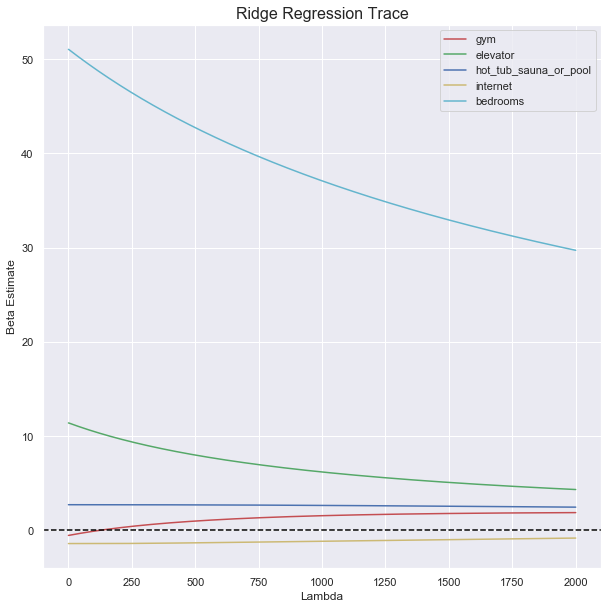

In [22]:
#plotting the Ridge Regression Trace
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(ridgeDF.gym,'r',ridgeDF.elevator,'g',ridgeDF.hot_tub_sauna_or_pool,'b',ridgeDF.internet,'y',ridgeDF.bedrooms,'c')
ax.axhline(y=0, color='black', linestyle='--')

ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['gym','elevator','hot_tub_sauna_or_pool','internet','bedrooms'])
ax.grid(True)

From this graph, we can see that the most important predictor among the 5 is <code>bedrooms</code>. For Ridge Regression, the beta estimate of each predictor will converge to zero (but will never reach zero) as lambda increases, the faster it converges to zero, the less important the predictor is. For this case, the most important predictor is <code>bedrooms</code>. The reason why the beta estimate does not reach zero is because Ridge Regression does not drop any predictors, unlike Lasso Regression, which we will observe later on.

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

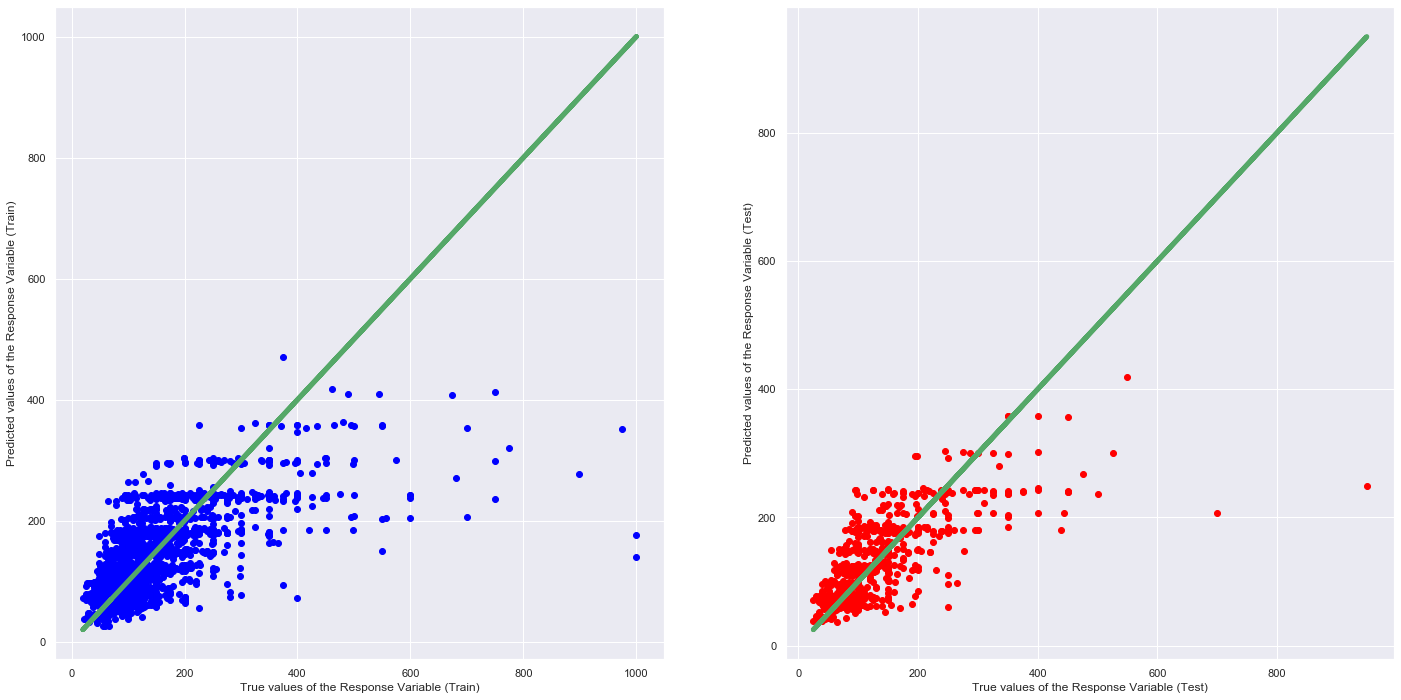

In [23]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionRidge, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionRidge, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the Ridge Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted. 

### Model 3: Lasso Regression

Lasso Regression is similar to Ridge Regression, meant to be an upgrade to linear regression, it also can be used for Regression and Classification.

Lasso Regression can be used for feature selection, where some predictors will be dropped after a lambda reaches a certain value.

Lasson Regression also requires a $\lambda$ value to be iterated to find the best fit.


In [24]:
#initialising the model
lassoReg = Lasso(alpha=1)
lassoReg.fit(X_train, y_train)
#stores prediction
lassoTrainPred = []
lassoTestPred = []
lassoR2score=[] #stores R2 value
lassoDF = pd.DataFrame({'variable': varArr, 'estimate': lassoReg.coef_.ravel()})

lambdas = np.arange(0.01, 8.01, 0.02)#lambda value of 0.01 to 8.01, in intervals of 0.02

for alpha in lambdas:
    lassoReg = Lasso(alpha=alpha)
    lassoReg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    lassoDF[var_name] = lassoReg.coef_.ravel()
    #prediction
    lassoTrainPred.append(lassoReg.predict(X_train))
    lassoTestPred.append(lassoReg.predict(X_test))
    #storing the r2 score 
    lassoR2score.append(lassoReg.score(X_train,y_train))


bestLassoR2 = max(lassoR2score)
print("The highest R2 value: ",bestLassoR2)


#Using the best fit Lasso Regression Model's predictions
trainPredictionLasso = lassoTrainPred[lassoR2score.index(bestLassoR2)]
testPredictionLasso = lassoTestPred[lassoR2score.index(bestLassoR2)]

lassoDF = lassoDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()

lassoDF.head()

The highest R2 value:  0.5004896646656453


variable,1,bedrooms,breakfast,tv,white_goods,elevator,gym,hot_tub_sauna_or_pool,internet,pets_allowed,...,room_type_Entire_home_apt,room_type_Private room,room_type_Shared_room,property_type_Apartment,property_type_Bed_and_Breakfast,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse
0,estimate,50.711342,-0.000000,0.991054,-0.000000,9.478209,0.000000,1.945506,-0.290871,-1.380858,...,22.412837,-0.0,-4.450044,-0.495201,1.772744,-0.000000,0.0,3.215562,2.162702,0.000000
1,estimate0.01,51.021060,-0.533641,1.794567,-0.108836,11.359933,-0.492448,2.710741,-1.383894,-2.409927,...,23.249381,-0.0,-5.291388,-2.522587,2.910845,-0.898582,0.0,4.049896,3.114089,0.136809
2,estimate0.03,51.013335,-0.513261,1.773691,-0.088030,11.277471,-0.422311,2.675827,-1.367135,-2.389744,...,23.231093,-0.0,-5.274831,-2.475916,2.887690,-0.860727,0.0,4.032602,3.096713,0.121390
3,estimate0.049999999999999996,51.005471,-0.492834,1.752768,-0.067248,11.195143,-0.352200,2.640933,-1.350384,-2.369571,...,23.212978,-0.0,-5.258256,-2.429428,2.864518,-0.822930,0.0,4.015277,3.079296,0.105970
4,estimate0.06999999999999999,50.998014,-0.472543,1.731983,-0.046394,11.112429,-0.282013,2.605983,-1.333610,-2.349371,...,23.194355,-0.0,-5.241735,-2.382405,2.841397,-0.784965,0.0,3.998044,3.062000,0.090555


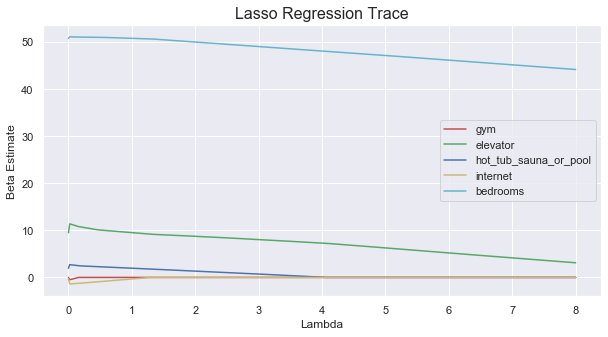

In [25]:
#Plot the Lasso Regression Trace
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lassoDF.gym,'r',lassoDF.elevator,'g',lassoDF.hot_tub_sauna_or_pool,'b',lassoDF.internet,'y',lassoDF.bedrooms,'c')
ax.set_xlabel("Lambda")
ax.set_xticklabels(np.arange(-1, 100, 1))
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['gym','elevator','hot_tub_sauna_or_pool','internet','bedrooms'])
ax.grid(True)


From this graph, we can see that the most important predictor among the 5 is also <code>bedrooms</code>. For Lasso Regression, the faster the beta estimate of the predictor reaches zero (the predictor has been dropped) as lambda increases, the less important the predictor is. As we can see from the graph, <code>bedrooms</code> does not even hit zero after when has reached its highest value of 8, compared to the beta estimate of <code>hot_tub_sauna_or_pool</code> which reached zero a lot faster than <code>bedrooms</code>.

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

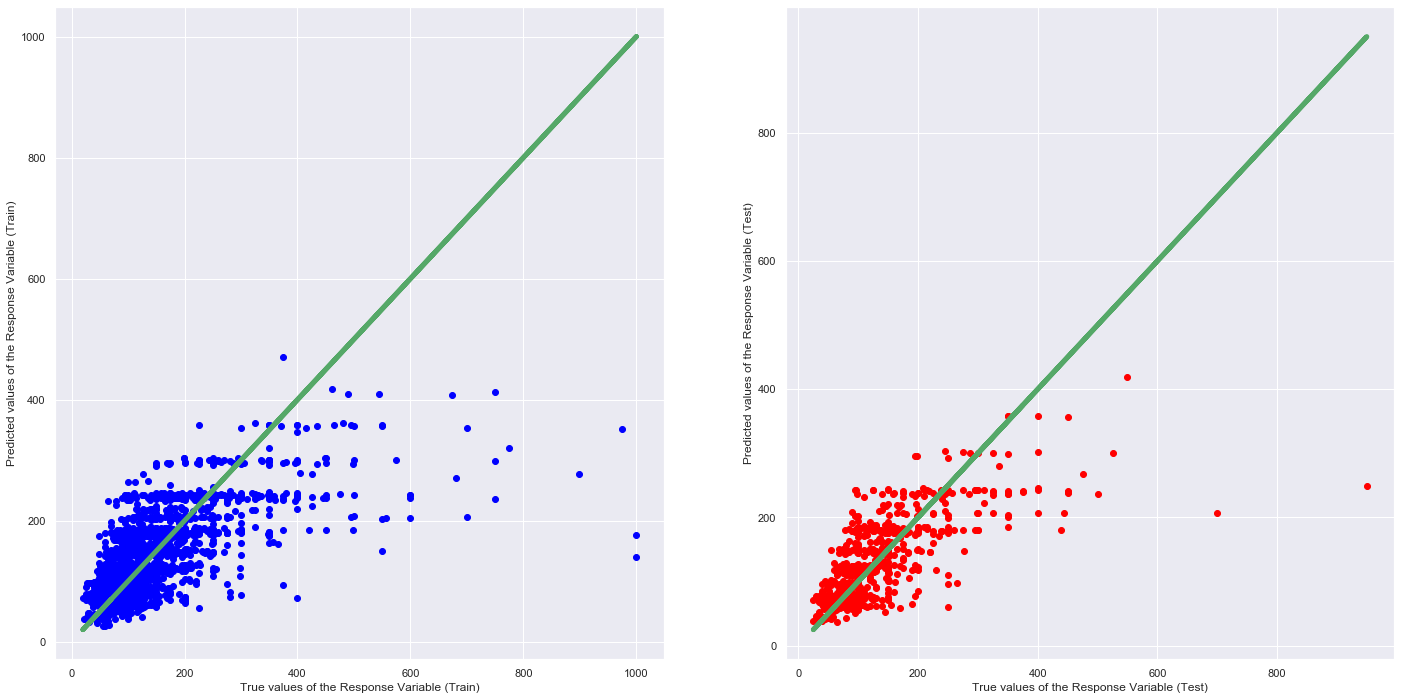

In [26]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLasso, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLasso, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the Lasso Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted. 

### Model 4: Random Forest Regression

Random Forest is an emsemble technique that is able to perform both Regression and Classification tasks with the use of multiple decision trees and a technique that is called Bootstrap Aggression. The idea behind this technique is to combine multiple decision trees in its prediction rather than replying on individual decision trees. 

Here, we use the RandomForestRegressor to help predict the price.

In [27]:
# Tuning of Parameters

# random_grid = {'n_estimators': [2000],
#                'max_features': [2,5],
#                'max_depth': [40,70],
#                'min_samples_split': [40,50],
#                'max_leaf_nodes':[50,70],
#                'max_features': [2,5]}
# rf_tune = RandomForestRegressor()
# rf_random = GridSearchCV(estimator = rf_tune, param_grid = random_grid, cv = 3, verbose=2,n_jobs = 2)

# rf_random.fit(X_train,y_train)

# print(rf_random.best_estimator_)

To optimize the parameters used in the Random Forest Regression modelling algorithm, we first tune the parameters - in which GridSearchCV was used to optimize the parameters to determine the values that impact the model in order to enable the algorithm to perform at its best. In this case, while we managed to get the optimal parameter values (for at least the more significant parameters), we commented off the code as it would take a decent amount of time to process. The output of the code is as follows:

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=5, max_leaf_nodes=30,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=2000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [28]:
# Creating and fitting the model
RF = RandomForestRegressor(n_estimators=2000, max_depth=40,min_samples_split = 50,
                           max_leaf_nodes = 70,max_features = 5).fit(X_train,y_train)

# Predicting the training and testing sets
trainPredictin_RF = RF.predict(X_train)
testPredictin_RF =RF.predict(X_test)

C:\Users\krist\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
importancesRF = RF.feature_importances_
feat_imp1 = pd.DataFrame(importancesRF, columns=['Weight'], index=X_train.columns)
feat_imp1.sort_values('Weight', inplace=True)
feat_imp1

,Weight
property_type_Bed_and_Breakfast,0.001773
property_type_Condominium,0.002310
property_type_Townhouse,0.003087
property_type_Loft,0.003431
accessible,0.003575
secure,0.004208
pets_allowed,0.004536
internet,0.004598
breakfast,0.005263
hot_tub_sauna_or_pool,0.007597


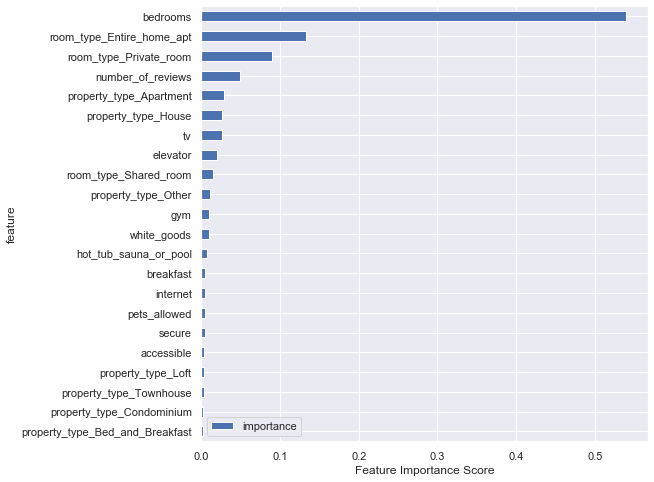

In [31]:
feat_imp = pd.DataFrame({'importance':RF.feature_importances_})  
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

Importance provides a score that indicates how useful or valuable each feature was in the construction of the decision trees within the model. The more a variable is used to make key decisions with decision trees, the higher its relative importance.

As such, feature importance can be used to interpret our data to understand the most important features that define our predictions. In this case, looking at the bar chart above, the predictor variable that is associated with a taller bar means that the variable has a higher importance in the Random Tree Regression Model in predicting price. 

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

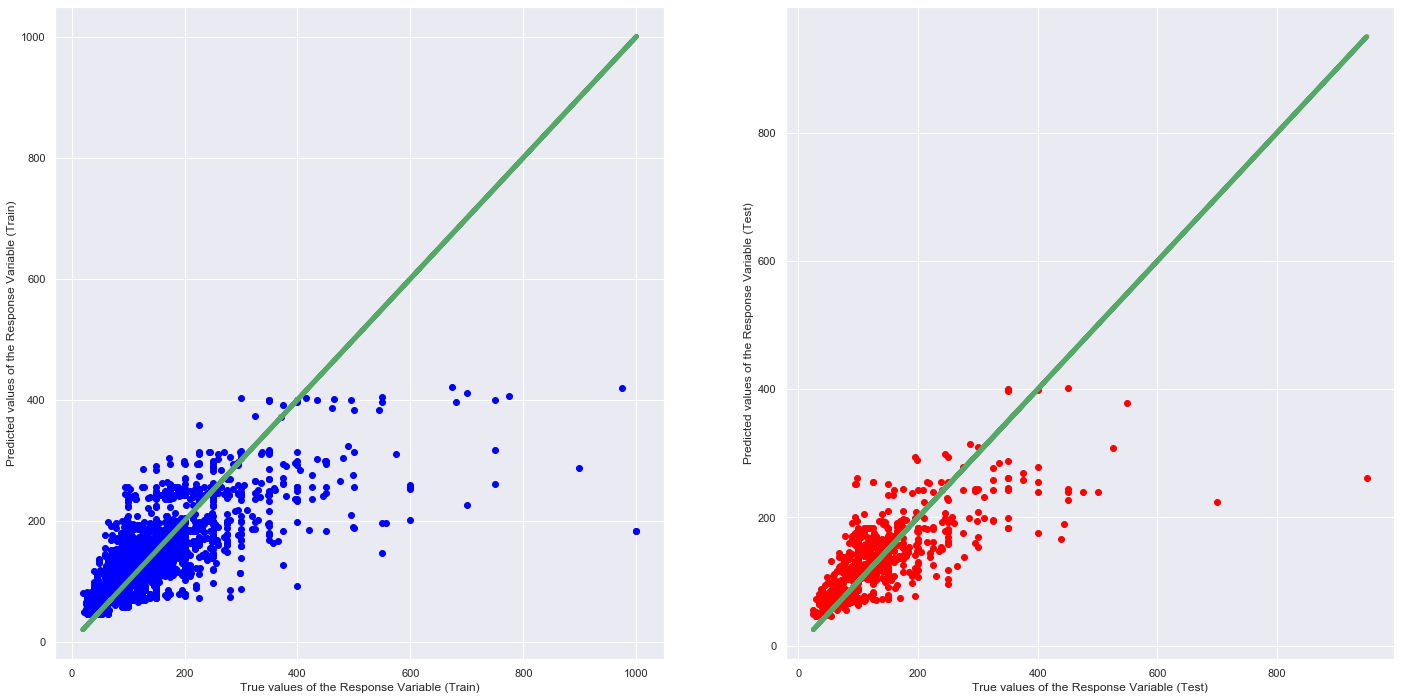

In [32]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_RF, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_RF, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the Random Forest Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted. 

### Model 5 : XGBoost

XGBoost is an open source library that provides a high-performance implementation of gradient boost decision trees (similar to the decision trees that we have learnt). It is a machine learning model that is able to perform prediction tasks regardless of Regression or Classification. 

The key idea of Gradient Boosted Decision Trees is that they build a series of trees in which each tree is trained so that it attempts to correct the mistakes of the previous tree in the seroes.

In [33]:
#Tuning the Parameters

# parameters_for_testing = {
#     'colsample_bytree':[0.3,0.5],
#     'learning_rate':[0.1,0.5],
#     'alpha': [10,12],
#     'max_depth':[3,5],
#     'n_estimators':[2000],  
# }

                    
# xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
#      gamma=0, colsample_bytree=0.8)

# gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
# gsearch1.fit(X_train,y_train)

# print(gsearch1.best_estimator_)

To optimize the parameters used in the XGBoost modelling algorithm, we first tune the parameters - in which GridSearchCV was used to optimize the parameters to determine the values that impact the model in order to enable the algorithm to perform at its best. In this case, while we managed to get the optimal parameter values (for at least the more significant parameters), we commented off the code as it would take a decent amount of time to process. The output of the code is as follows:

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [34]:
# Fitting and Training the model for Train & Test sets
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 2000)

xgb_reg.fit(X_train,y_train)

# Predicting using the model
trainPredictin_xgb_reg = xgb_reg.predict(X_train)
testPredictin_xgb_reg = xgb_reg.predict(X_test)

[21:23:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


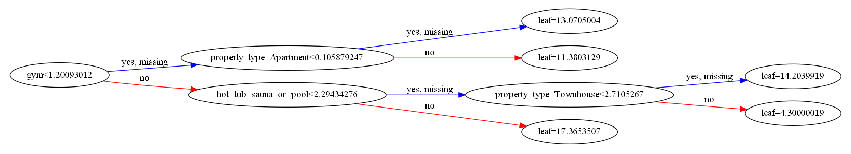

In [35]:
# Ploting decision tree 
xgb.plot_tree(xgb_reg, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(15, 20)

In [36]:
# Weightage/Importance of each variable 
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
property_type_Townhouse,0.006907
property_type_Loft,0.007583
property_type_Bed_and_Breakfast,0.007993
accessible,0.008335
breakfast,0.010225
property_type_Condominium,0.011662
internet,0.011672
secure,0.012162
white_goods,0.013150
pets_allowed,0.017811


Importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more a variable is used to make key decisions with decision trees, the higher its relative importance.

As such, feature importance can be used to interpret our data to understand the most important features that define our predictions. In this case, looking at the table above, the predictor variable that is associated with a higher number means that the variable has a higher importance in the XGBoost Regression Model in predicting price. 

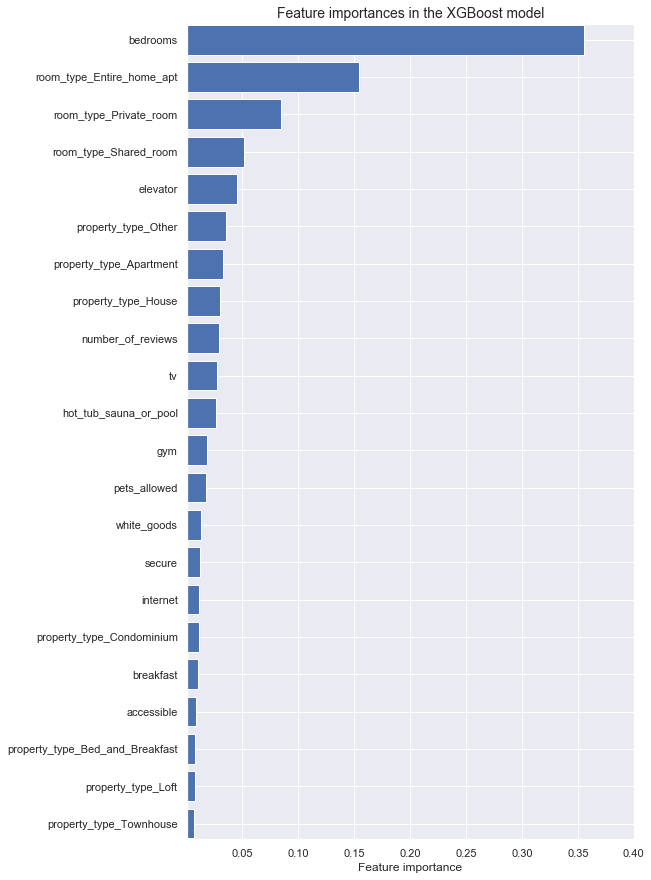

In [37]:
# Plotting feature importances
plt.figure(figsize=(8,15))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.001)
plt.xlim(0.001, 0.4)
plt.show()

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

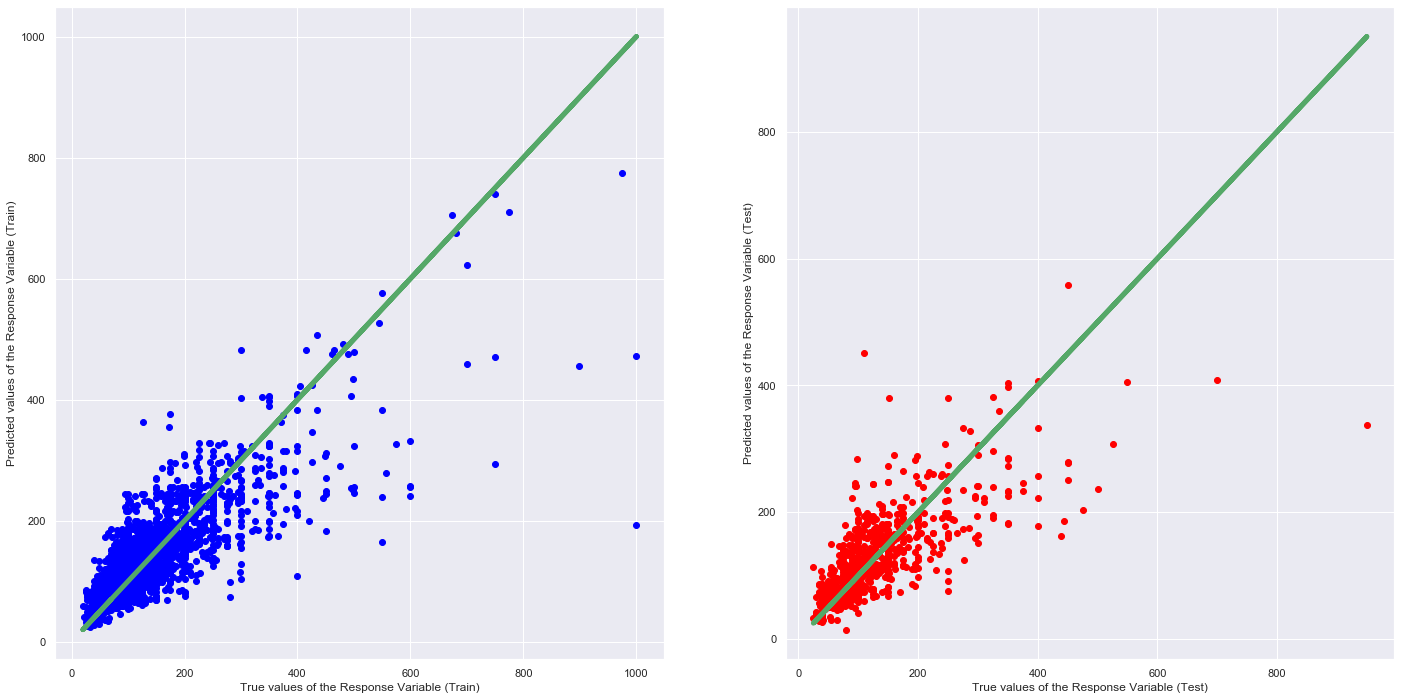

In [38]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_xgb_reg, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_xgb_reg, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the XGBoost Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

### Model 6: CatBoost 

CatBoost is a high performance open source gradient boosting on decision trees. It can be used to solve both Classification and Regression problems. 

In [39]:
# catBoost = CatBoostRegressor()
# parameters = {'depth'         : [3,5],
#                 'learning_rate' : [0.1,0.5],
#                 'iterations'    : [2000]
#                 }
# grid = GridSearchCV(estimator=catBoost, param_grid = parameters, cv = 2, n_jobs=6)
# grid.fit(X_train, y_train)

# print("\n The best parameters across ALL searched params:\n",
#           grid.best_params_)

To optimize the parameters used in the CatBoost modelling algorithm, we first tune the parameters - in which GridSearchCV was used to optimize the parameters to determine the values that impact the model in order to enable the algorithm to perform at its best. In this case, while we managed to get the optimal parameter values (for at least the more significant parameters), we commented off the code as it would take a decent amount of time to process. The output of the code is as follows:

{'depth': 3, 'iterations': 2000, 'learning_rate': 0.1}

In [40]:
# Creating and fitting the model
CatB=CatBoostRegressor(iterations=2000, depth=3, learning_rate=0.1,loss_function='RMSE')
CatB.fit(X_train, y_train,plot=True);

# Predicting based on the model
trainPrediction_CatB = CatB.predict(X_train)
testPrediction_CatB = CatB.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 86.6329507	total: 56.2ms	remaining: 1m 52s
1:	learn: 83.2845974	total: 57.8ms	remaining: 57.7s
2:	learn: 80.4531993	total: 59ms	remaining: 39.2s
3:	learn: 78.2626814	total: 60.8ms	remaining: 30.4s
4:	learn: 76.2470321	total: 62.6ms	remaining: 25s
5:	learn: 74.4206698	total: 63.9ms	remaining: 21.2s
6:	learn: 72.7991700	total: 65.6ms	remaining: 18.7s
7:	learn: 71.5681258	total: 67.6ms	remaining: 16.8s
8:	learn: 70.3562855	total: 69.5ms	remaining: 15.4s
9:	learn: 69.3825478	total: 71.4ms	remaining: 14.2s
10:	learn: 68.6011091	total: 73.4ms	remaining: 13.3s
11:	learn: 67.9156021	total: 75.3ms	remaining: 12.5s
12:	learn: 67.1937349	total: 77.5ms	remaining: 11.8s
13:	learn: 66.6012407	total: 79.3ms	remaining: 11.3s
14:	learn: 66.0872991	total: 81ms	remaining: 10.7s
15:	learn: 65.6692794	total: 83ms	remaining: 10.3s
16:	learn: 65.3778936	total: 84.5ms	remaining: 9.85s
17:	learn: 65.0918279	total: 85.7ms	remaining: 9.44s
18:	learn: 64.8078046	total: 87.2ms	remaining: 9.09s
19:	learn:

216:	learn: 58.1462635	total: 485ms	remaining: 3.98s
217:	learn: 58.1401255	total: 487ms	remaining: 3.98s
218:	learn: 58.1396856	total: 489ms	remaining: 3.97s
219:	learn: 58.0826743	total: 491ms	remaining: 3.97s
220:	learn: 58.0652922	total: 493ms	remaining: 3.97s
221:	learn: 58.0620970	total: 495ms	remaining: 3.97s
222:	learn: 58.0586756	total: 497ms	remaining: 3.96s
223:	learn: 58.0512056	total: 499ms	remaining: 3.96s
224:	learn: 58.0481676	total: 501ms	remaining: 3.96s
225:	learn: 58.0235903	total: 504ms	remaining: 3.95s
226:	learn: 58.0219676	total: 505ms	remaining: 3.95s
227:	learn: 58.0084138	total: 507ms	remaining: 3.94s
228:	learn: 58.0051675	total: 509ms	remaining: 3.94s
229:	learn: 57.9803034	total: 512ms	remaining: 3.94s
230:	learn: 57.9780404	total: 514ms	remaining: 3.93s
231:	learn: 57.9693109	total: 516ms	remaining: 3.93s
232:	learn: 57.9326617	total: 518ms	remaining: 3.92s
233:	learn: 57.9295453	total: 520ms	remaining: 3.92s
234:	learn: 57.9266756	total: 522ms	remaining:

420:	learn: 55.8720568	total: 924ms	remaining: 3.46s
421:	learn: 55.8689570	total: 926ms	remaining: 3.46s
422:	learn: 55.8529054	total: 928ms	remaining: 3.46s
423:	learn: 55.8407927	total: 930ms	remaining: 3.46s
424:	learn: 55.8388494	total: 934ms	remaining: 3.46s
425:	learn: 55.8372310	total: 936ms	remaining: 3.46s
426:	learn: 55.8319142	total: 938ms	remaining: 3.46s
427:	learn: 55.8277187	total: 940ms	remaining: 3.45s
428:	learn: 55.8222367	total: 943ms	remaining: 3.45s
429:	learn: 55.8120881	total: 945ms	remaining: 3.45s
430:	learn: 55.7982258	total: 947ms	remaining: 3.45s
431:	learn: 55.7850687	total: 949ms	remaining: 3.44s
432:	learn: 55.7657230	total: 951ms	remaining: 3.44s
433:	learn: 55.7444438	total: 953ms	remaining: 3.44s
434:	learn: 55.7318090	total: 955ms	remaining: 3.44s
435:	learn: 55.7236315	total: 957ms	remaining: 3.43s
436:	learn: 55.7182435	total: 959ms	remaining: 3.43s
437:	learn: 55.7058712	total: 962ms	remaining: 3.43s
438:	learn: 55.6948668	total: 964ms	remaining:

639:	learn: 54.1788070	total: 1.36s	remaining: 2.89s
640:	learn: 54.1766230	total: 1.36s	remaining: 2.89s
641:	learn: 54.1745470	total: 1.36s	remaining: 2.88s
642:	learn: 54.1727301	total: 1.36s	remaining: 2.88s
643:	learn: 54.1576852	total: 1.37s	remaining: 2.88s
644:	learn: 54.1565686	total: 1.37s	remaining: 2.88s
645:	learn: 54.1505419	total: 1.37s	remaining: 2.87s
646:	learn: 54.1429729	total: 1.37s	remaining: 2.87s
647:	learn: 54.1368541	total: 1.37s	remaining: 2.87s
648:	learn: 54.1351740	total: 1.38s	remaining: 2.86s
649:	learn: 54.1309671	total: 1.38s	remaining: 2.86s
650:	learn: 54.1299019	total: 1.38s	remaining: 2.86s
651:	learn: 54.1238282	total: 1.38s	remaining: 2.85s
652:	learn: 54.1163233	total: 1.38s	remaining: 2.85s
653:	learn: 54.1081028	total: 1.38s	remaining: 2.85s
654:	learn: 54.1030538	total: 1.39s	remaining: 2.85s
655:	learn: 54.1015067	total: 1.39s	remaining: 2.84s
656:	learn: 54.1000831	total: 1.39s	remaining: 2.84s
657:	learn: 54.0874623	total: 1.39s	remaining:

866:	learn: 53.2680014	total: 1.79s	remaining: 2.35s
867:	learn: 53.2657727	total: 1.8s	remaining: 2.34s
868:	learn: 53.2445237	total: 1.8s	remaining: 2.34s
869:	learn: 53.2343371	total: 1.8s	remaining: 2.34s
870:	learn: 53.2337359	total: 1.8s	remaining: 2.34s
871:	learn: 53.2320286	total: 1.8s	remaining: 2.33s
872:	learn: 53.2285446	total: 1.81s	remaining: 2.33s
873:	learn: 53.2285013	total: 1.81s	remaining: 2.33s
874:	learn: 53.2229761	total: 1.81s	remaining: 2.33s
875:	learn: 53.2035034	total: 1.81s	remaining: 2.33s
876:	learn: 53.1999934	total: 1.81s	remaining: 2.32s
877:	learn: 53.1968397	total: 1.82s	remaining: 2.32s
878:	learn: 53.1931164	total: 1.82s	remaining: 2.32s
879:	learn: 53.1926811	total: 1.82s	remaining: 2.31s
880:	learn: 53.1910629	total: 1.82s	remaining: 2.31s
881:	learn: 53.1897621	total: 1.82s	remaining: 2.31s
882:	learn: 53.1883568	total: 1.82s	remaining: 2.31s
883:	learn: 53.1857953	total: 1.83s	remaining: 2.31s
884:	learn: 53.1815945	total: 1.83s	remaining: 2.3s

1092:	learn: 52.5622840	total: 2.23s	remaining: 1.85s
1093:	learn: 52.5586942	total: 2.23s	remaining: 1.85s
1094:	learn: 52.5578984	total: 2.23s	remaining: 1.84s
1095:	learn: 52.5531771	total: 2.23s	remaining: 1.84s
1096:	learn: 52.5525587	total: 2.24s	remaining: 1.84s
1097:	learn: 52.5520536	total: 2.24s	remaining: 1.84s
1098:	learn: 52.5490026	total: 2.24s	remaining: 1.84s
1099:	learn: 52.5478164	total: 2.24s	remaining: 1.83s
1100:	learn: 52.5437387	total: 2.24s	remaining: 1.83s
1101:	learn: 52.5430185	total: 2.25s	remaining: 1.83s
1102:	learn: 52.5418206	total: 2.25s	remaining: 1.83s
1103:	learn: 52.5344295	total: 2.25s	remaining: 1.83s
1104:	learn: 52.5339374	total: 2.25s	remaining: 1.82s
1105:	learn: 52.5309961	total: 2.25s	remaining: 1.82s
1106:	learn: 52.5304123	total: 2.26s	remaining: 1.82s
1107:	learn: 52.5265173	total: 2.26s	remaining: 1.82s
1108:	learn: 52.5255988	total: 2.26s	remaining: 1.82s
1109:	learn: 52.5245731	total: 2.26s	remaining: 1.81s
1110:	learn: 52.5235420	tota

1263:	learn: 52.1020364	total: 2.67s	remaining: 1.55s
1264:	learn: 52.0974322	total: 2.67s	remaining: 1.55s
1265:	learn: 52.0964407	total: 2.67s	remaining: 1.55s
1266:	learn: 52.0950357	total: 2.67s	remaining: 1.55s
1267:	learn: 52.0949754	total: 2.67s	remaining: 1.54s
1268:	learn: 52.0890070	total: 2.68s	remaining: 1.54s
1269:	learn: 52.0879993	total: 2.68s	remaining: 1.54s
1270:	learn: 52.0877677	total: 2.68s	remaining: 1.54s
1271:	learn: 52.0831775	total: 2.68s	remaining: 1.53s
1272:	learn: 52.0830583	total: 2.68s	remaining: 1.53s
1273:	learn: 52.0807351	total: 2.69s	remaining: 1.53s
1274:	learn: 52.0768408	total: 2.69s	remaining: 1.53s
1275:	learn: 52.0767225	total: 2.69s	remaining: 1.52s
1276:	learn: 52.0757643	total: 2.69s	remaining: 1.52s
1277:	learn: 52.0705359	total: 2.69s	remaining: 1.52s
1278:	learn: 52.0704902	total: 2.69s	remaining: 1.52s
1279:	learn: 52.0704533	total: 2.69s	remaining: 1.51s
1280:	learn: 52.0698152	total: 2.7s	remaining: 1.51s
1281:	learn: 52.0692774	total

1419:	learn: 51.8010731	total: 2.95s	remaining: 1.21s
1420:	learn: 51.8001622	total: 2.95s	remaining: 1.2s
1421:	learn: 51.7985221	total: 2.95s	remaining: 1.2s
1422:	learn: 51.7961496	total: 2.95s	remaining: 1.2s
1423:	learn: 51.7922231	total: 2.96s	remaining: 1.2s
1424:	learn: 51.7854348	total: 2.96s	remaining: 1.19s
1425:	learn: 51.7811350	total: 2.96s	remaining: 1.19s
1426:	learn: 51.7775053	total: 2.96s	remaining: 1.19s
1427:	learn: 51.7767041	total: 2.96s	remaining: 1.19s
1428:	learn: 51.7754123	total: 2.96s	remaining: 1.18s
1429:	learn: 51.7744118	total: 2.97s	remaining: 1.18s
1430:	learn: 51.7726061	total: 2.97s	remaining: 1.18s
1431:	learn: 51.7718855	total: 2.97s	remaining: 1.18s
1432:	learn: 51.7665307	total: 2.97s	remaining: 1.18s
1433:	learn: 51.7659629	total: 2.97s	remaining: 1.17s
1434:	learn: 51.7658768	total: 2.98s	remaining: 1.17s
1435:	learn: 51.7649590	total: 2.98s	remaining: 1.17s
1436:	learn: 51.7627815	total: 2.98s	remaining: 1.17s
1437:	learn: 51.7584103	total: 2

1577:	learn: 51.3560359	total: 3.24s	remaining: 866ms
1578:	learn: 51.3559324	total: 3.24s	remaining: 864ms
1579:	learn: 51.3554404	total: 3.24s	remaining: 862ms
1580:	learn: 51.3510897	total: 3.24s	remaining: 860ms
1581:	learn: 51.3484535	total: 3.25s	remaining: 858ms
1582:	learn: 51.3476212	total: 3.25s	remaining: 856ms
1583:	learn: 51.3441610	total: 3.25s	remaining: 853ms
1584:	learn: 51.3441366	total: 3.25s	remaining: 851ms
1585:	learn: 51.3438217	total: 3.25s	remaining: 849ms
1586:	learn: 51.3431526	total: 3.26s	remaining: 847ms
1587:	learn: 51.3419846	total: 3.26s	remaining: 845ms
1588:	learn: 51.3305855	total: 3.26s	remaining: 843ms
1589:	learn: 51.3299393	total: 3.26s	remaining: 841ms
1590:	learn: 51.3298260	total: 3.26s	remaining: 839ms
1591:	learn: 51.3262420	total: 3.27s	remaining: 837ms
1592:	learn: 51.3239982	total: 3.27s	remaining: 835ms
1593:	learn: 51.3239924	total: 3.27s	remaining: 833ms
1594:	learn: 51.3217818	total: 3.27s	remaining: 831ms
1595:	learn: 51.3186022	tota

1743:	learn: 51.0285789	total: 3.69s	remaining: 541ms
1744:	learn: 51.0281768	total: 3.69s	remaining: 539ms
1745:	learn: 51.0273845	total: 3.69s	remaining: 537ms
1746:	learn: 51.0271800	total: 3.69s	remaining: 535ms
1747:	learn: 51.0271363	total: 3.69s	remaining: 533ms
1748:	learn: 51.0270902	total: 3.7s	remaining: 531ms
1749:	learn: 51.0225081	total: 3.7s	remaining: 529ms
1750:	learn: 51.0207484	total: 3.7s	remaining: 526ms
1751:	learn: 51.0188088	total: 3.7s	remaining: 524ms
1752:	learn: 51.0151566	total: 3.71s	remaining: 522ms
1753:	learn: 51.0146363	total: 3.71s	remaining: 520ms
1754:	learn: 51.0146103	total: 3.71s	remaining: 518ms
1755:	learn: 51.0145967	total: 3.71s	remaining: 516ms
1756:	learn: 51.0139458	total: 3.71s	remaining: 514ms
1757:	learn: 51.0053825	total: 3.72s	remaining: 512ms
1758:	learn: 51.0036733	total: 3.72s	remaining: 510ms
1759:	learn: 51.0033689	total: 3.72s	remaining: 507ms
1760:	learn: 51.0007718	total: 3.72s	remaining: 505ms
1761:	learn: 51.0004418	total: 3

1945:	learn: 50.6729153	total: 4.12s	remaining: 114ms
1946:	learn: 50.6726559	total: 4.12s	remaining: 112ms
1947:	learn: 50.6721760	total: 4.12s	remaining: 110ms
1948:	learn: 50.6720871	total: 4.12s	remaining: 108ms
1949:	learn: 50.6701295	total: 4.12s	remaining: 106ms
1950:	learn: 50.6698568	total: 4.13s	remaining: 104ms
1951:	learn: 50.6698466	total: 4.13s	remaining: 102ms
1952:	learn: 50.6667192	total: 4.13s	remaining: 99.4ms
1953:	learn: 50.6657047	total: 4.13s	remaining: 97.3ms
1954:	learn: 50.6647419	total: 4.13s	remaining: 95.2ms
1955:	learn: 50.6641635	total: 4.14s	remaining: 93.1ms
1956:	learn: 50.6634328	total: 4.14s	remaining: 90.9ms
1957:	learn: 50.6633004	total: 4.14s	remaining: 88.8ms
1958:	learn: 50.6626536	total: 4.14s	remaining: 86.7ms
1959:	learn: 50.6625816	total: 4.14s	remaining: 84.6ms
1960:	learn: 50.6614096	total: 4.15s	remaining: 82.5ms
1961:	learn: 50.6602359	total: 4.15s	remaining: 80.4ms
1962:	learn: 50.6562198	total: 4.15s	remaining: 78.3ms
1963:	learn: 50.6

(0.001, 20.0)

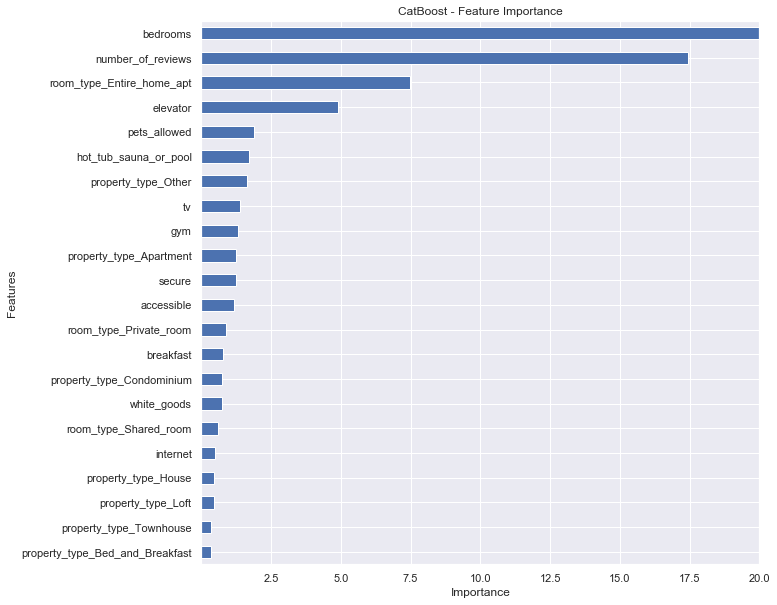

In [41]:
# Plotting the feature importance diagram
feature_impCatB = pd.DataFrame({'imp': CatB.feature_importances_, 'col': X.columns})
feature_impCatB = feature_impCatB.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
feature_impCatB.plot(kind='barh', x='col', y='imp', figsize=(10, 10), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');
plt.xlim(0.001, 20.0)

Importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more a variable is used to make key decisions with decision trees, the higher its relative importance.

As such, feature importance can be used to interpret our data to understand the most important features that define our predictions. In this case, looking at the bar chart above, the predictor variable that is associated with a longer bar means that the variable has a higher importance in the CatBoost Regression Model in predicting price. 

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

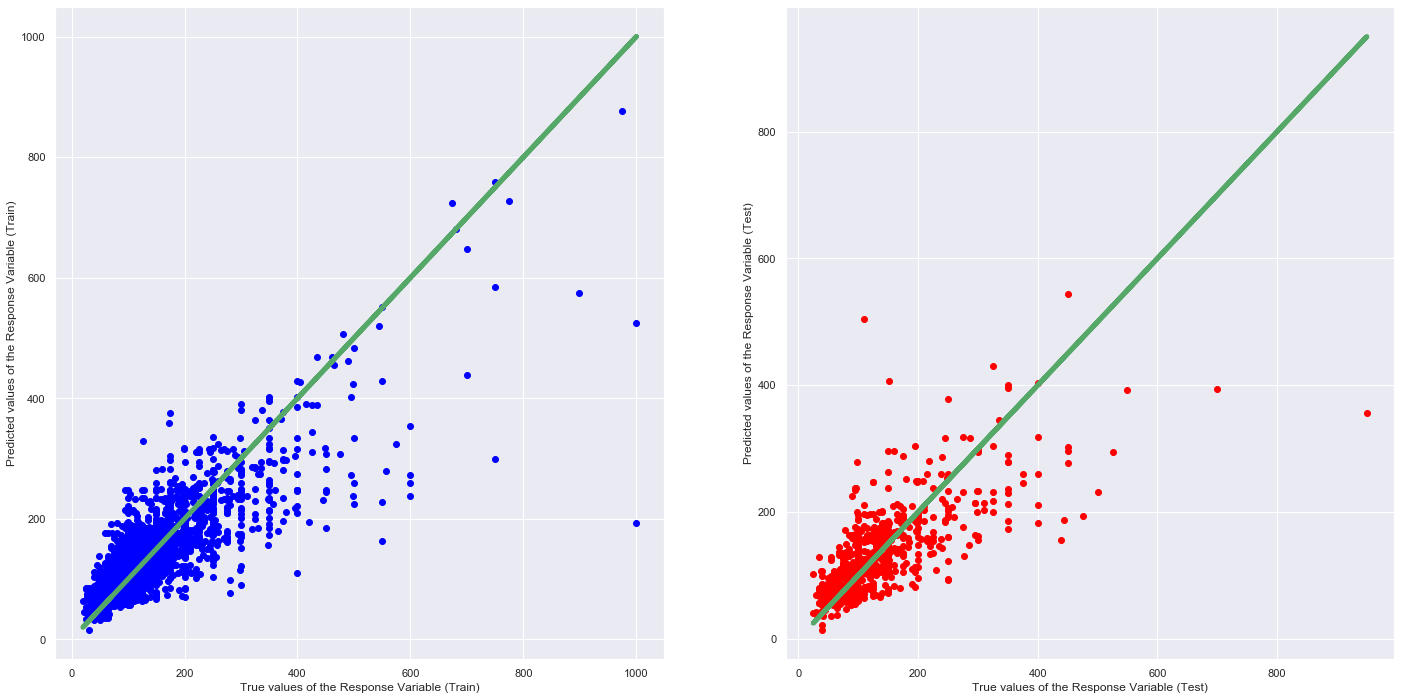

In [42]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPrediction_CatB, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPrediction_CatB, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the CatBoost Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

### Evaluation of Models

#### Train Test Split
Validation of model performance is done using Train/Test Set Split in which the data set is split into 80% : 20%. 

In [43]:
# Results of Model
print ("Goodness Fit on the Models (Train/Test Split):")
print()
print("Performance Metrics for Test Set")
print("--------------------------------")
print("Linear Regression (MSE):", round(mean_squared_error(y_test, testPredictionLR),4))
print("Linear Regression (R^2):", round(r2_score(y_test, testPredictionLR),4))

print("\nRidge Regression (MSE):", round(mean_squared_error(y_test, testPredictionRidge),4))
print("Ridge Regression (R^2):", round(r2_score(y_test, testPredictionRidge),4))

print("\nLasso Regression (MSE):", round(mean_squared_error(y_test, testPredictionLasso),4))
print("Lasso Regression (R^2):", round(r2_score(y_test, testPredictionLasso),4))

print("\nRandom Forest Regression (MSE):", round(mean_squared_error(y_test, testPredictin_RF),4))
print("Random Forest Regression (R^2):", round(r2_score(y_test, testPredictin_RF),4))

print("\nXGBoost (MSE):", round(mean_squared_error(y_test, testPredictin_xgb_reg),4))
print("XGBoost (R^2):", round(r2_score(y_test, testPredictin_xgb_reg),4))

print("\nCatBoost (MSE):", round(mean_squared_error(y_test, testPrediction_CatB),4))
print("CatBoost (R^2):", round(r2_score(y_test, testPrediction_CatB ),4))


print()
print("\nPerformance Metrics for Train Set")
print("-----------------------------------")
print("Linear Regression (R^2):", round(r2_score(y_train, trainPredictionLR),4))
print("Ridge Regression (R^2):", round(r2_score(y_train, trainPredictionRidge),4))
print("Lasso Regression (R^2):", round(r2_score(y_train, trainPredictionLasso),4))
print("Random Forest Regression (R^2):", round(r2_score(y_train, trainPredictin_RF),4))
print("XGBoost (R^2):", round(r2_score(y_train, trainPredictin_xgb_reg),4))
print("CatBoost (R^2):", round(r2_score(y_train, trainPrediction_CatB ),4))

Goodness Fit on the Models (Train/Test Split):

Performance Metrics for Test Set
--------------------------------
Linear Regression (MSE): 3814.0115
Linear Regression (R^2): 0.5198

Ridge Regression (MSE): 3814.1028
Ridge Regression (R^2): 0.5197

Lasso Regression (MSE): 3813.708
Lasso Regression (R^2): 0.5198

Random Forest Regression (MSE): 3594.2552
Random Forest Regression (R^2): 0.5474

XGBoost (MSE): 3672.9407
XGBoost (R^2): 0.5375

CatBoost (MSE): 3687.5774
CatBoost (R^2): 0.5357


Performance Metrics for Train Set
-----------------------------------
Linear Regression (R^2): 0.5005
Ridge Regression (R^2): 0.5005
Lasso Regression (R^2): 0.5005
Random Forest Regression (R^2): 0.5632
XGBoost (R^2): 0.6749
CatBoost (R^2): 0.6876


However, Random Train/Test Set Splits may not always be enough as it can be subjected to selection biased during the split process (even if its randomly split). This is especially so if the dataset is small. Train/Test Set Splits can also cause over-fitted predicted models that can also affect its performance metrics. 

As such, to overcome the pitfalls in Train/Test set split evaluation, k-fold Cross Validation is also performed. Here, the whole dataset is used to calcualte the performance of the regression models. This validation method is more popular simply because it generally results in a less biased or less optimistic estimate of the model. 

#### K-fold Cross Validation

K-Fold Cross Validation is where the dataset will be split into k number of folds in which each fold is used as a testing point.

Here, k=10 is used as it is a value that has been found to generally result in a model skill estimate with low bias and a modest variance. 

In [44]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, random_state=100)

scoring = ['r2', 'neg_mean_squared_error']

results_kfold_LR = cross_validate(linreg,X,y,cv=kf,scoring=scoring)
results_kfold_Ridge = cross_validate(ridgeReg,X,y,cv=kf,scoring=scoring)
results_kfold_Lasso = cross_validate(lassoReg,X,y,cv=kf,scoring=scoring)
results_kfold_RF = cross_validate(RF,X,y,cv=kf,scoring=scoring)
results_kfold_XGB = cross_validate(xgb_reg,X,y,cv=kf,scoring=scoring)
results_kfold_CatB = cross_validate(CatB,X,y,cv=kf,scoring=scoring)

C:\Users\krist\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\krist\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\krist\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\krist\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

[21:25:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

201:	learn: 57.0202306	total: 430ms	remaining: 3.83s
202:	learn: 57.0015485	total: 432ms	remaining: 3.82s
203:	learn: 56.9905231	total: 433ms	remaining: 3.81s
204:	learn: 56.9878069	total: 435ms	remaining: 3.81s
205:	learn: 56.9788744	total: 437ms	remaining: 3.81s
206:	learn: 56.9490677	total: 439ms	remaining: 3.8s
207:	learn: 56.9446438	total: 441ms	remaining: 3.79s
208:	learn: 56.9263010	total: 442ms	remaining: 3.79s
209:	learn: 56.9221504	total: 444ms	remaining: 3.78s
210:	learn: 56.9070476	total: 446ms	remaining: 3.78s
211:	learn: 56.9063699	total: 447ms	remaining: 3.77s
212:	learn: 56.9041544	total: 449ms	remaining: 3.77s
213:	learn: 56.8835846	total: 451ms	remaining: 3.77s
214:	learn: 56.8683841	total: 453ms	remaining: 3.76s
215:	learn: 56.8474943	total: 455ms	remaining: 3.76s
216:	learn: 56.8380396	total: 457ms	remaining: 3.76s
217:	learn: 56.8064477	total: 459ms	remaining: 3.75s
218:	learn: 56.7953079	total: 462ms	remaining: 3.75s
219:	learn: 56.7939794	total: 464ms	remaining: 

407:	learn: 55.0161228	total: 861ms	remaining: 3.36s
408:	learn: 55.0121389	total: 863ms	remaining: 3.36s
409:	learn: 55.0077574	total: 865ms	remaining: 3.35s
410:	learn: 55.0067155	total: 866ms	remaining: 3.35s
411:	learn: 54.9925102	total: 868ms	remaining: 3.35s
412:	learn: 54.9916812	total: 870ms	remaining: 3.34s
413:	learn: 54.9896725	total: 872ms	remaining: 3.34s
414:	learn: 54.9887812	total: 874ms	remaining: 3.34s
415:	learn: 54.9823432	total: 876ms	remaining: 3.33s
416:	learn: 54.9821340	total: 878ms	remaining: 3.33s
417:	learn: 54.9800389	total: 879ms	remaining: 3.33s
418:	learn: 54.9748907	total: 881ms	remaining: 3.32s
419:	learn: 54.9679243	total: 883ms	remaining: 3.32s
420:	learn: 54.9637980	total: 884ms	remaining: 3.32s
421:	learn: 54.9343622	total: 886ms	remaining: 3.31s
422:	learn: 54.8840389	total: 888ms	remaining: 3.31s
423:	learn: 54.8775356	total: 890ms	remaining: 3.31s
424:	learn: 54.8636554	total: 892ms	remaining: 3.3s
425:	learn: 54.8559819	total: 894ms	remaining: 

629:	learn: 53.5394462	total: 1.3s	remaining: 2.83s
630:	learn: 53.5353939	total: 1.3s	remaining: 2.83s
631:	learn: 53.5306483	total: 1.3s	remaining: 2.82s
632:	learn: 53.5250571	total: 1.31s	remaining: 2.82s
633:	learn: 53.5245035	total: 1.31s	remaining: 2.82s
634:	learn: 53.5182000	total: 1.31s	remaining: 2.82s
635:	learn: 53.5082295	total: 1.31s	remaining: 2.82s
636:	learn: 53.5027312	total: 1.31s	remaining: 2.81s
637:	learn: 53.4971731	total: 1.32s	remaining: 2.81s
638:	learn: 53.4962073	total: 1.32s	remaining: 2.81s
639:	learn: 53.4934250	total: 1.32s	remaining: 2.81s
640:	learn: 53.4877435	total: 1.32s	remaining: 2.81s
641:	learn: 53.4832772	total: 1.33s	remaining: 2.81s
642:	learn: 53.4728139	total: 1.33s	remaining: 2.8s
643:	learn: 53.4727074	total: 1.33s	remaining: 2.8s
644:	learn: 53.4538271	total: 1.33s	remaining: 2.8s
645:	learn: 53.4453353	total: 1.33s	remaining: 2.8s
646:	learn: 53.4452361	total: 1.34s	remaining: 2.79s
647:	learn: 53.4410266	total: 1.34s	remaining: 2.79s


835:	learn: 52.6716714	total: 1.74s	remaining: 2.42s
836:	learn: 52.6707673	total: 1.74s	remaining: 2.42s
837:	learn: 52.6707573	total: 1.74s	remaining: 2.42s
838:	learn: 52.6680891	total: 1.74s	remaining: 2.41s
839:	learn: 52.6659145	total: 1.75s	remaining: 2.41s
840:	learn: 52.6632210	total: 1.75s	remaining: 2.41s
841:	learn: 52.6619139	total: 1.75s	remaining: 2.41s
842:	learn: 52.6615333	total: 1.75s	remaining: 2.41s
843:	learn: 52.6602676	total: 1.75s	remaining: 2.4s
844:	learn: 52.6567701	total: 1.76s	remaining: 2.4s
845:	learn: 52.6425532	total: 1.76s	remaining: 2.4s
846:	learn: 52.6336763	total: 1.76s	remaining: 2.4s
847:	learn: 52.6312585	total: 1.76s	remaining: 2.4s
848:	learn: 52.6260737	total: 1.76s	remaining: 2.39s
849:	learn: 52.6227145	total: 1.77s	remaining: 2.39s
850:	learn: 52.6166449	total: 1.77s	remaining: 2.39s
851:	learn: 52.6131893	total: 1.77s	remaining: 2.39s
852:	learn: 52.6125290	total: 1.77s	remaining: 2.38s
853:	learn: 52.6062369	total: 1.78s	remaining: 2.38

1041:	learn: 52.0198184	total: 2.17s	remaining: 2s
1042:	learn: 52.0166075	total: 2.17s	remaining: 2s
1043:	learn: 52.0155401	total: 2.18s	remaining: 1.99s
1044:	learn: 52.0149130	total: 2.18s	remaining: 1.99s
1045:	learn: 52.0137416	total: 2.18s	remaining: 1.99s
1046:	learn: 52.0098718	total: 2.18s	remaining: 1.99s
1047:	learn: 52.0081369	total: 2.19s	remaining: 1.99s
1048:	learn: 52.0072767	total: 2.19s	remaining: 1.98s
1049:	learn: 51.9980409	total: 2.19s	remaining: 1.98s
1050:	learn: 51.9976599	total: 2.19s	remaining: 1.98s
1051:	learn: 51.9965542	total: 2.19s	remaining: 1.98s
1052:	learn: 51.9932314	total: 2.2s	remaining: 1.98s
1053:	learn: 51.9925945	total: 2.2s	remaining: 1.97s
1054:	learn: 51.9923159	total: 2.2s	remaining: 1.97s
1055:	learn: 51.9922749	total: 2.2s	remaining: 1.97s
1056:	learn: 51.9922374	total: 2.21s	remaining: 1.97s
1057:	learn: 51.9884987	total: 2.21s	remaining: 1.97s
1058:	learn: 51.9876843	total: 2.21s	remaining: 1.96s
1059:	learn: 51.9854280	total: 2.21s	r

1260:	learn: 51.5716767	total: 2.61s	remaining: 1.53s
1261:	learn: 51.5701365	total: 2.61s	remaining: 1.53s
1262:	learn: 51.5700560	total: 2.61s	remaining: 1.52s
1263:	learn: 51.5700405	total: 2.61s	remaining: 1.52s
1264:	learn: 51.5697090	total: 2.61s	remaining: 1.52s
1265:	learn: 51.5620124	total: 2.62s	remaining: 1.52s
1266:	learn: 51.5619792	total: 2.62s	remaining: 1.51s
1267:	learn: 51.5618026	total: 2.62s	remaining: 1.51s
1268:	learn: 51.5579975	total: 2.62s	remaining: 1.51s
1269:	learn: 51.5578808	total: 2.62s	remaining: 1.51s
1270:	learn: 51.5575935	total: 2.63s	remaining: 1.51s
1271:	learn: 51.5575852	total: 2.63s	remaining: 1.5s
1272:	learn: 51.5574730	total: 2.63s	remaining: 1.5s
1273:	learn: 51.5574689	total: 2.63s	remaining: 1.5s
1274:	learn: 51.5537419	total: 2.63s	remaining: 1.5s
1275:	learn: 51.5522523	total: 2.64s	remaining: 1.5s
1276:	learn: 51.5516944	total: 2.64s	remaining: 1.49s
1277:	learn: 51.5474452	total: 2.64s	remaining: 1.49s
1278:	learn: 51.5472476	total: 2.

1471:	learn: 51.1453314	total: 3.04s	remaining: 1.09s
1472:	learn: 51.1389394	total: 3.05s	remaining: 1.09s
1473:	learn: 51.1300000	total: 3.05s	remaining: 1.09s
1474:	learn: 51.1298430	total: 3.05s	remaining: 1.09s
1475:	learn: 51.1286110	total: 3.06s	remaining: 1.08s
1476:	learn: 51.1210623	total: 3.06s	remaining: 1.08s
1477:	learn: 51.1202774	total: 3.06s	remaining: 1.08s
1478:	learn: 51.1197190	total: 3.06s	remaining: 1.08s
1479:	learn: 51.1192262	total: 3.06s	remaining: 1.08s
1480:	learn: 51.1190981	total: 3.06s	remaining: 1.07s
1481:	learn: 51.1190786	total: 3.07s	remaining: 1.07s
1482:	learn: 51.1188869	total: 3.07s	remaining: 1.07s
1483:	learn: 51.1184540	total: 3.07s	remaining: 1.07s
1484:	learn: 51.1183386	total: 3.07s	remaining: 1.07s
1485:	learn: 51.1150112	total: 3.08s	remaining: 1.06s
1486:	learn: 51.1149409	total: 3.08s	remaining: 1.06s
1487:	learn: 51.1123155	total: 3.08s	remaining: 1.06s
1488:	learn: 51.1117873	total: 3.08s	remaining: 1.06s
1489:	learn: 51.1112695	tota

1677:	learn: 50.7225881	total: 3.48s	remaining: 668ms
1678:	learn: 50.7210314	total: 3.48s	remaining: 666ms
1679:	learn: 50.7181683	total: 3.48s	remaining: 664ms
1680:	learn: 50.7178268	total: 3.49s	remaining: 662ms
1681:	learn: 50.7178015	total: 3.49s	remaining: 660ms
1682:	learn: 50.7177587	total: 3.49s	remaining: 658ms
1683:	learn: 50.7169876	total: 3.49s	remaining: 656ms
1684:	learn: 50.7110987	total: 3.5s	remaining: 653ms
1685:	learn: 50.7050219	total: 3.5s	remaining: 651ms
1686:	learn: 50.7049841	total: 3.5s	remaining: 649ms
1687:	learn: 50.7049025	total: 3.5s	remaining: 647ms
1688:	learn: 50.7044363	total: 3.5s	remaining: 645ms
1689:	learn: 50.6956295	total: 3.5s	remaining: 643ms
1690:	learn: 50.6954297	total: 3.51s	remaining: 641ms
1691:	learn: 50.6871026	total: 3.51s	remaining: 639ms
1692:	learn: 50.6844478	total: 3.51s	remaining: 637ms
1693:	learn: 50.6843648	total: 3.51s	remaining: 635ms
1694:	learn: 50.6830091	total: 3.52s	remaining: 633ms
1695:	learn: 50.6828729	total: 3.5

1901:	learn: 50.3577857	total: 3.92s	remaining: 202ms
1902:	learn: 50.3564635	total: 3.92s	remaining: 200ms
1903:	learn: 50.3561132	total: 3.92s	remaining: 198ms
1904:	learn: 50.3535406	total: 3.92s	remaining: 196ms
1905:	learn: 50.3528686	total: 3.93s	remaining: 194ms
1906:	learn: 50.3453132	total: 3.93s	remaining: 192ms
1907:	learn: 50.3450727	total: 3.93s	remaining: 190ms
1908:	learn: 50.3444443	total: 3.93s	remaining: 188ms
1909:	learn: 50.3444302	total: 3.94s	remaining: 185ms
1910:	learn: 50.3443976	total: 3.94s	remaining: 183ms
1911:	learn: 50.3440072	total: 3.94s	remaining: 181ms
1912:	learn: 50.3439623	total: 3.94s	remaining: 179ms
1913:	learn: 50.3438734	total: 3.94s	remaining: 177ms
1914:	learn: 50.3424471	total: 3.95s	remaining: 175ms
1915:	learn: 50.3401232	total: 3.95s	remaining: 173ms
1916:	learn: 50.3392086	total: 3.95s	remaining: 171ms
1917:	learn: 50.3392015	total: 3.95s	remaining: 169ms
1918:	learn: 50.3386333	total: 3.96s	remaining: 167ms
1919:	learn: 50.3384973	tota

68:	learn: 60.6666507	total: 146ms	remaining: 4.08s
69:	learn: 60.6136261	total: 149ms	remaining: 4.1s
70:	learn: 60.5972957	total: 151ms	remaining: 4.11s
71:	learn: 60.5810083	total: 153ms	remaining: 4.11s
72:	learn: 60.5549752	total: 155ms	remaining: 4.1s
73:	learn: 60.5186506	total: 158ms	remaining: 4.11s
74:	learn: 60.4733073	total: 160ms	remaining: 4.11s
75:	learn: 60.4230538	total: 162ms	remaining: 4.11s
76:	learn: 60.4102745	total: 164ms	remaining: 4.11s
77:	learn: 60.3906890	total: 167ms	remaining: 4.11s
78:	learn: 60.3659775	total: 169ms	remaining: 4.1s
79:	learn: 60.3533318	total: 171ms	remaining: 4.1s
80:	learn: 60.3461695	total: 173ms	remaining: 4.1s
81:	learn: 60.3377326	total: 175ms	remaining: 4.1s
82:	learn: 60.3129329	total: 177ms	remaining: 4.09s
83:	learn: 60.3019970	total: 179ms	remaining: 4.09s
84:	learn: 60.2922144	total: 181ms	remaining: 4.09s
85:	learn: 60.2784250	total: 184ms	remaining: 4.09s
86:	learn: 60.2644841	total: 188ms	remaining: 4.13s
87:	learn: 60.2541

279:	learn: 57.5800111	total: 582ms	remaining: 3.58s
280:	learn: 57.5717780	total: 584ms	remaining: 3.57s
281:	learn: 57.5616740	total: 586ms	remaining: 3.57s
282:	learn: 57.5587642	total: 588ms	remaining: 3.57s
283:	learn: 57.5501504	total: 590ms	remaining: 3.57s
284:	learn: 57.5363121	total: 592ms	remaining: 3.56s
285:	learn: 57.5213374	total: 595ms	remaining: 3.56s
286:	learn: 57.5195675	total: 597ms	remaining: 3.56s
287:	learn: 57.4895967	total: 599ms	remaining: 3.56s
288:	learn: 57.4696113	total: 601ms	remaining: 3.56s
289:	learn: 57.4653496	total: 603ms	remaining: 3.56s
290:	learn: 57.4602385	total: 605ms	remaining: 3.55s
291:	learn: 57.4571971	total: 607ms	remaining: 3.55s
292:	learn: 57.4539847	total: 609ms	remaining: 3.55s
293:	learn: 57.4421110	total: 611ms	remaining: 3.55s
294:	learn: 57.4243084	total: 614ms	remaining: 3.55s
295:	learn: 57.4036246	total: 616ms	remaining: 3.55s
296:	learn: 57.4010213	total: 618ms	remaining: 3.54s
297:	learn: 57.4002632	total: 620ms	remaining:

503:	learn: 55.7974376	total: 1.01s	remaining: 3.01s
504:	learn: 55.7963580	total: 1.01s	remaining: 3s
505:	learn: 55.7886782	total: 1.02s	remaining: 3s
506:	learn: 55.7853381	total: 1.02s	remaining: 3s
507:	learn: 55.7796794	total: 1.02s	remaining: 3s
508:	learn: 55.7779974	total: 1.02s	remaining: 3s
509:	learn: 55.7775767	total: 1.02s	remaining: 3s
510:	learn: 55.7613025	total: 1.03s	remaining: 2.99s
511:	learn: 55.7584509	total: 1.03s	remaining: 2.99s
512:	learn: 55.7516510	total: 1.03s	remaining: 2.99s
513:	learn: 55.7488488	total: 1.03s	remaining: 2.99s
514:	learn: 55.7416292	total: 1.04s	remaining: 2.99s
515:	learn: 55.7329619	total: 1.04s	remaining: 2.99s
516:	learn: 55.7311009	total: 1.04s	remaining: 2.98s
517:	learn: 55.7245486	total: 1.04s	remaining: 2.98s
518:	learn: 55.7130070	total: 1.04s	remaining: 2.98s
519:	learn: 55.7090319	total: 1.05s	remaining: 2.98s
520:	learn: 55.6879958	total: 1.05s	remaining: 2.98s
521:	learn: 55.6823715	total: 1.05s	remaining: 2.97s
522:	learn:

720:	learn: 54.3607756	total: 1.45s	remaining: 2.58s
721:	learn: 54.3589501	total: 1.45s	remaining: 2.57s
722:	learn: 54.3587951	total: 1.46s	remaining: 2.57s
723:	learn: 54.3568355	total: 1.46s	remaining: 2.57s
724:	learn: 54.3544891	total: 1.46s	remaining: 2.57s
725:	learn: 54.3461642	total: 1.46s	remaining: 2.57s
726:	learn: 54.3425265	total: 1.47s	remaining: 2.57s
727:	learn: 54.3368903	total: 1.47s	remaining: 2.56s
728:	learn: 54.3328192	total: 1.47s	remaining: 2.56s
729:	learn: 54.3326049	total: 1.47s	remaining: 2.56s
730:	learn: 54.3289711	total: 1.47s	remaining: 2.56s
731:	learn: 54.3274273	total: 1.48s	remaining: 2.56s
732:	learn: 54.3238956	total: 1.48s	remaining: 2.56s
733:	learn: 54.3206567	total: 1.48s	remaining: 2.55s
734:	learn: 54.3202623	total: 1.48s	remaining: 2.55s
735:	learn: 54.3148799	total: 1.49s	remaining: 2.55s
736:	learn: 54.3138082	total: 1.49s	remaining: 2.55s
737:	learn: 54.3124548	total: 1.49s	remaining: 2.55s
738:	learn: 54.3100018	total: 1.49s	remaining:

923:	learn: 53.6320207	total: 1.89s	remaining: 2.2s
924:	learn: 53.6295053	total: 1.89s	remaining: 2.19s
925:	learn: 53.6168990	total: 1.89s	remaining: 2.19s
926:	learn: 53.6015841	total: 1.89s	remaining: 2.19s
927:	learn: 53.6008943	total: 1.9s	remaining: 2.19s
928:	learn: 53.5891658	total: 1.9s	remaining: 2.19s
929:	learn: 53.5890955	total: 1.9s	remaining: 2.19s
930:	learn: 53.5842781	total: 1.9s	remaining: 2.18s
931:	learn: 53.5807503	total: 1.9s	remaining: 2.18s
932:	learn: 53.5789320	total: 1.91s	remaining: 2.18s
933:	learn: 53.5761192	total: 1.91s	remaining: 2.18s
934:	learn: 53.5760826	total: 1.91s	remaining: 2.17s
935:	learn: 53.5751905	total: 1.91s	remaining: 2.17s
936:	learn: 53.5743376	total: 1.91s	remaining: 2.17s
937:	learn: 53.5722780	total: 1.91s	remaining: 2.17s
938:	learn: 53.5722335	total: 1.92s	remaining: 2.17s
939:	learn: 53.5704929	total: 1.92s	remaining: 2.16s
940:	learn: 53.5687735	total: 1.92s	remaining: 2.16s
941:	learn: 53.5543135	total: 1.92s	remaining: 2.16s

1157:	learn: 53.0042253	total: 2.33s	remaining: 1.69s
1158:	learn: 53.0031168	total: 2.33s	remaining: 1.69s
1159:	learn: 53.0023845	total: 2.33s	remaining: 1.69s
1160:	learn: 52.9963282	total: 2.34s	remaining: 1.69s
1161:	learn: 52.9919901	total: 2.34s	remaining: 1.69s
1162:	learn: 52.9912484	total: 2.34s	remaining: 1.69s
1163:	learn: 52.9903146	total: 2.34s	remaining: 1.68s
1164:	learn: 52.9893799	total: 2.35s	remaining: 1.68s
1165:	learn: 52.9886467	total: 2.35s	remaining: 1.68s
1166:	learn: 52.9857506	total: 2.35s	remaining: 1.68s
1167:	learn: 52.9851328	total: 2.35s	remaining: 1.68s
1168:	learn: 52.9841706	total: 2.35s	remaining: 1.67s
1169:	learn: 52.9833929	total: 2.36s	remaining: 1.67s
1170:	learn: 52.9826164	total: 2.36s	remaining: 1.67s
1171:	learn: 52.9825989	total: 2.36s	remaining: 1.67s
1172:	learn: 52.9822530	total: 2.36s	remaining: 1.67s
1173:	learn: 52.9796500	total: 2.37s	remaining: 1.66s
1174:	learn: 52.9775814	total: 2.37s	remaining: 1.66s
1175:	learn: 52.9769937	tota

1363:	learn: 52.5243337	total: 2.76s	remaining: 1.29s
1364:	learn: 52.5238770	total: 2.77s	remaining: 1.29s
1365:	learn: 52.5213954	total: 2.77s	remaining: 1.28s
1366:	learn: 52.5206688	total: 2.77s	remaining: 1.28s
1367:	learn: 52.5201708	total: 2.77s	remaining: 1.28s
1368:	learn: 52.5162785	total: 2.77s	remaining: 1.28s
1369:	learn: 52.5110658	total: 2.78s	remaining: 1.28s
1370:	learn: 52.5102343	total: 2.78s	remaining: 1.27s
1371:	learn: 52.5095261	total: 2.78s	remaining: 1.27s
1372:	learn: 52.5087985	total: 2.78s	remaining: 1.27s
1373:	learn: 52.5086233	total: 2.78s	remaining: 1.27s
1374:	learn: 52.5082568	total: 2.78s	remaining: 1.26s
1375:	learn: 52.5082354	total: 2.79s	remaining: 1.26s
1376:	learn: 52.5081991	total: 2.79s	remaining: 1.26s
1377:	learn: 52.5057673	total: 2.79s	remaining: 1.26s
1378:	learn: 52.5053874	total: 2.79s	remaining: 1.26s
1379:	learn: 52.5025371	total: 2.79s	remaining: 1.25s
1380:	learn: 52.4986865	total: 2.8s	remaining: 1.25s
1381:	learn: 52.4867973	total

1563:	learn: 52.1091970	total: 3.2s	remaining: 892ms
1564:	learn: 52.1010179	total: 3.2s	remaining: 890ms
1565:	learn: 52.1001288	total: 3.2s	remaining: 888ms
1566:	learn: 52.1001081	total: 3.21s	remaining: 886ms
1567:	learn: 52.0996040	total: 3.21s	remaining: 884ms
1568:	learn: 52.0970700	total: 3.21s	remaining: 882ms
1569:	learn: 52.0940870	total: 3.21s	remaining: 880ms
1570:	learn: 52.0940228	total: 3.21s	remaining: 878ms
1571:	learn: 52.0927148	total: 3.22s	remaining: 876ms
1572:	learn: 52.0919149	total: 3.22s	remaining: 874ms
1573:	learn: 52.0909623	total: 3.22s	remaining: 872ms
1574:	learn: 52.0901717	total: 3.22s	remaining: 870ms
1575:	learn: 52.0896717	total: 3.22s	remaining: 868ms
1576:	learn: 52.0896512	total: 3.23s	remaining: 866ms
1577:	learn: 52.0793533	total: 3.23s	remaining: 864ms
1578:	learn: 52.0789285	total: 3.23s	remaining: 862ms
1579:	learn: 52.0708862	total: 3.23s	remaining: 859ms
1580:	learn: 52.0702796	total: 3.24s	remaining: 858ms
1581:	learn: 52.0698738	total: 

1768:	learn: 51.6936690	total: 3.63s	remaining: 474ms
1769:	learn: 51.6926643	total: 3.63s	remaining: 472ms
1770:	learn: 51.6926473	total: 3.63s	remaining: 470ms
1771:	learn: 51.6890842	total: 3.64s	remaining: 468ms
1772:	learn: 51.6885237	total: 3.64s	remaining: 466ms
1773:	learn: 51.6885009	total: 3.64s	remaining: 464ms
1774:	learn: 51.6859708	total: 3.64s	remaining: 462ms
1775:	learn: 51.6852852	total: 3.64s	remaining: 459ms
1776:	learn: 51.6825151	total: 3.65s	remaining: 457ms
1777:	learn: 51.6819506	total: 3.65s	remaining: 455ms
1778:	learn: 51.6799888	total: 3.65s	remaining: 453ms
1779:	learn: 51.6784756	total: 3.65s	remaining: 451ms
1780:	learn: 51.6764734	total: 3.65s	remaining: 449ms
1781:	learn: 51.6739173	total: 3.65s	remaining: 447ms
1782:	learn: 51.6722750	total: 3.66s	remaining: 445ms
1783:	learn: 51.6716861	total: 3.66s	remaining: 443ms
1784:	learn: 51.6712051	total: 3.66s	remaining: 441ms
1785:	learn: 51.6709307	total: 3.66s	remaining: 439ms
1786:	learn: 51.6706466	tota

1923:	learn: 51.4379735	total: 3.92s	remaining: 155ms
1924:	learn: 51.4295911	total: 3.92s	remaining: 153ms
1925:	learn: 51.4247866	total: 3.92s	remaining: 151ms
1926:	learn: 51.4246255	total: 3.93s	remaining: 149ms
1927:	learn: 51.4204237	total: 3.93s	remaining: 147ms
1928:	learn: 51.4204073	total: 3.93s	remaining: 145ms
1929:	learn: 51.4198861	total: 3.93s	remaining: 143ms
1930:	learn: 51.4173347	total: 3.94s	remaining: 141ms
1931:	learn: 51.4172178	total: 3.94s	remaining: 139ms
1932:	learn: 51.4165667	total: 3.94s	remaining: 137ms
1933:	learn: 51.4155124	total: 3.94s	remaining: 134ms
1934:	learn: 51.4149426	total: 3.94s	remaining: 132ms
1935:	learn: 51.4135442	total: 3.94s	remaining: 130ms
1936:	learn: 51.4070766	total: 3.94s	remaining: 128ms
1937:	learn: 51.4031515	total: 3.95s	remaining: 126ms
1938:	learn: 51.4027212	total: 3.95s	remaining: 124ms
1939:	learn: 51.4011716	total: 3.95s	remaining: 122ms
1940:	learn: 51.3963254	total: 3.95s	remaining: 120ms
1941:	learn: 51.3957506	tota

129:	learn: 59.7279086	total: 289ms	remaining: 4.16s
130:	learn: 59.6858447	total: 291ms	remaining: 4.15s
131:	learn: 59.6837158	total: 293ms	remaining: 4.15s
132:	learn: 59.6816310	total: 295ms	remaining: 4.14s
133:	learn: 59.6382868	total: 297ms	remaining: 4.14s
134:	learn: 59.6325580	total: 299ms	remaining: 4.14s
135:	learn: 59.6129170	total: 301ms	remaining: 4.13s
136:	learn: 59.6034361	total: 303ms	remaining: 4.13s
137:	learn: 59.5914101	total: 305ms	remaining: 4.12s
138:	learn: 59.5835524	total: 308ms	remaining: 4.12s
139:	learn: 59.5553650	total: 310ms	remaining: 4.12s
140:	learn: 59.5536003	total: 312ms	remaining: 4.11s
141:	learn: 59.5426579	total: 314ms	remaining: 4.11s
142:	learn: 59.4963730	total: 316ms	remaining: 4.11s
143:	learn: 59.4818832	total: 318ms	remaining: 4.1s
144:	learn: 59.4641470	total: 320ms	remaining: 4.1s
145:	learn: 59.4553032	total: 322ms	remaining: 4.09s
146:	learn: 59.4430959	total: 324ms	remaining: 4.09s
147:	learn: 59.4350252	total: 326ms	remaining: 4

334:	learn: 56.6516472	total: 725ms	remaining: 3.6s
335:	learn: 56.6430057	total: 727ms	remaining: 3.6s
336:	learn: 56.6255489	total: 729ms	remaining: 3.6s
337:	learn: 56.6166259	total: 731ms	remaining: 3.59s
338:	learn: 56.6115997	total: 732ms	remaining: 3.59s
339:	learn: 56.5867762	total: 734ms	remaining: 3.58s
340:	learn: 56.5803837	total: 737ms	remaining: 3.58s
341:	learn: 56.5667973	total: 739ms	remaining: 3.58s
342:	learn: 56.5665642	total: 741ms	remaining: 3.58s
343:	learn: 56.5434959	total: 743ms	remaining: 3.58s
344:	learn: 56.5353599	total: 745ms	remaining: 3.57s
345:	learn: 56.5349741	total: 747ms	remaining: 3.57s
346:	learn: 56.5340621	total: 749ms	remaining: 3.57s
347:	learn: 56.5287113	total: 751ms	remaining: 3.56s
348:	learn: 56.5109881	total: 753ms	remaining: 3.56s
349:	learn: 56.5021162	total: 755ms	remaining: 3.56s
350:	learn: 56.5012507	total: 757ms	remaining: 3.56s
351:	learn: 56.5010606	total: 759ms	remaining: 3.55s
352:	learn: 56.4907251	total: 761ms	remaining: 3.

554:	learn: 54.9502268	total: 1.16s	remaining: 3.02s
555:	learn: 54.9492762	total: 1.16s	remaining: 3.02s
556:	learn: 54.9447176	total: 1.16s	remaining: 3.02s
557:	learn: 54.9372587	total: 1.17s	remaining: 3.01s
558:	learn: 54.9279080	total: 1.17s	remaining: 3.01s
559:	learn: 54.9239395	total: 1.17s	remaining: 3.01s
560:	learn: 54.9171566	total: 1.17s	remaining: 3.01s
561:	learn: 54.9139315	total: 1.17s	remaining: 3s
562:	learn: 54.9028419	total: 1.18s	remaining: 3s
563:	learn: 54.8938899	total: 1.18s	remaining: 3s
564:	learn: 54.8931316	total: 1.18s	remaining: 3s
565:	learn: 54.8831466	total: 1.18s	remaining: 3s
566:	learn: 54.8800267	total: 1.18s	remaining: 2.99s
567:	learn: 54.8792607	total: 1.19s	remaining: 2.99s
568:	learn: 54.8603901	total: 1.19s	remaining: 2.99s
569:	learn: 54.8562082	total: 1.19s	remaining: 2.99s
570:	learn: 54.8532022	total: 1.19s	remaining: 2.98s
571:	learn: 54.8494851	total: 1.19s	remaining: 2.98s
572:	learn: 54.8348690	total: 1.2s	remaining: 2.98s
573:	lear

757:	learn: 53.8816869	total: 1.59s	remaining: 2.61s
758:	learn: 53.8774033	total: 1.59s	remaining: 2.61s
759:	learn: 53.8749056	total: 1.6s	remaining: 2.6s
760:	learn: 53.8724558	total: 1.6s	remaining: 2.6s
761:	learn: 53.8633497	total: 1.6s	remaining: 2.6s
762:	learn: 53.8617689	total: 1.6s	remaining: 2.6s
763:	learn: 53.8574696	total: 1.6s	remaining: 2.59s
764:	learn: 53.8521640	total: 1.6s	remaining: 2.59s
765:	learn: 53.8492322	total: 1.6s	remaining: 2.59s
766:	learn: 53.8450633	total: 1.61s	remaining: 2.58s
767:	learn: 53.8393695	total: 1.61s	remaining: 2.58s
768:	learn: 53.8370666	total: 1.61s	remaining: 2.58s
769:	learn: 53.8337382	total: 1.61s	remaining: 2.58s
770:	learn: 53.8331478	total: 1.61s	remaining: 2.57s
771:	learn: 53.8299024	total: 1.62s	remaining: 2.57s
772:	learn: 53.8267649	total: 1.62s	remaining: 2.57s
773:	learn: 53.8219586	total: 1.62s	remaining: 2.57s
774:	learn: 53.8174586	total: 1.62s	remaining: 2.56s
775:	learn: 53.7862233	total: 1.62s	remaining: 2.56s
776:

920:	learn: 53.1706418	total: 1.88s	remaining: 2.2s
921:	learn: 53.1653790	total: 1.88s	remaining: 2.2s
922:	learn: 53.1604557	total: 1.89s	remaining: 2.2s
923:	learn: 53.1600483	total: 1.89s	remaining: 2.2s
924:	learn: 53.1351846	total: 1.89s	remaining: 2.2s
925:	learn: 53.1305187	total: 1.89s	remaining: 2.19s
926:	learn: 53.1260969	total: 1.89s	remaining: 2.19s
927:	learn: 53.1219053	total: 1.9s	remaining: 2.19s
928:	learn: 53.1178341	total: 1.9s	remaining: 2.19s
929:	learn: 53.1152851	total: 1.9s	remaining: 2.19s
930:	learn: 53.1097712	total: 1.9s	remaining: 2.18s
931:	learn: 53.1071324	total: 1.9s	remaining: 2.18s
932:	learn: 53.1033241	total: 1.91s	remaining: 2.18s
933:	learn: 53.1032531	total: 1.91s	remaining: 2.18s
934:	learn: 53.0990410	total: 1.91s	remaining: 2.18s
935:	learn: 53.0962476	total: 1.91s	remaining: 2.17s
936:	learn: 53.0940203	total: 1.92s	remaining: 2.17s
937:	learn: 53.0939470	total: 1.92s	remaining: 2.17s
938:	learn: 53.0916421	total: 1.92s	remaining: 2.17s
939

1125:	learn: 52.5726369	total: 2.31s	remaining: 1.79s
1126:	learn: 52.5714083	total: 2.31s	remaining: 1.79s
1127:	learn: 52.5688167	total: 2.32s	remaining: 1.79s
1128:	learn: 52.5687700	total: 2.32s	remaining: 1.79s
1129:	learn: 52.5687166	total: 2.32s	remaining: 1.79s
1130:	learn: 52.5641061	total: 2.33s	remaining: 1.79s
1131:	learn: 52.5622291	total: 2.33s	remaining: 1.78s
1132:	learn: 52.5386562	total: 2.33s	remaining: 1.78s
1133:	learn: 52.5367556	total: 2.33s	remaining: 1.78s
1134:	learn: 52.5360127	total: 2.33s	remaining: 1.78s
1135:	learn: 52.5359619	total: 2.34s	remaining: 1.78s
1136:	learn: 52.5293927	total: 2.34s	remaining: 1.77s
1137:	learn: 52.5144237	total: 2.34s	remaining: 1.77s
1138:	learn: 52.5113000	total: 2.34s	remaining: 1.77s
1139:	learn: 52.5111831	total: 2.34s	remaining: 1.77s
1140:	learn: 52.5093369	total: 2.35s	remaining: 1.77s
1141:	learn: 52.5093046	total: 2.35s	remaining: 1.76s
1142:	learn: 52.5071160	total: 2.35s	remaining: 1.76s
1143:	learn: 52.5060757	tota

1328:	learn: 52.0327171	total: 2.75s	remaining: 1.39s
1329:	learn: 52.0314172	total: 2.75s	remaining: 1.39s
1330:	learn: 52.0284696	total: 2.75s	remaining: 1.39s
1331:	learn: 52.0284653	total: 2.76s	remaining: 1.38s
1332:	learn: 52.0273496	total: 2.76s	remaining: 1.38s
1333:	learn: 52.0247818	total: 2.76s	remaining: 1.38s
1334:	learn: 52.0245695	total: 2.76s	remaining: 1.38s
1335:	learn: 52.0244284	total: 2.77s	remaining: 1.37s
1336:	learn: 52.0197525	total: 2.77s	remaining: 1.37s
1337:	learn: 52.0171029	total: 2.77s	remaining: 1.37s
1338:	learn: 52.0139040	total: 2.77s	remaining: 1.37s
1339:	learn: 52.0133197	total: 2.77s	remaining: 1.37s
1340:	learn: 52.0122669	total: 2.78s	remaining: 1.36s
1341:	learn: 52.0097604	total: 2.78s	remaining: 1.36s
1342:	learn: 52.0031421	total: 2.78s	remaining: 1.36s
1343:	learn: 52.0031009	total: 2.78s	remaining: 1.36s
1344:	learn: 52.0019502	total: 2.78s	remaining: 1.36s
1345:	learn: 52.0019055	total: 2.79s	remaining: 1.35s
1346:	learn: 52.0013493	tota

1534:	learn: 51.5725364	total: 3.18s	remaining: 964ms
1535:	learn: 51.5712519	total: 3.19s	remaining: 962ms
1536:	learn: 51.5690988	total: 3.19s	remaining: 960ms
1537:	learn: 51.5605754	total: 3.19s	remaining: 958ms
1538:	learn: 51.5527823	total: 3.19s	remaining: 956ms
1539:	learn: 51.5515337	total: 3.19s	remaining: 954ms
1540:	learn: 51.5497760	total: 3.2s	remaining: 952ms
1541:	learn: 51.5480590	total: 3.2s	remaining: 950ms
1542:	learn: 51.5469907	total: 3.2s	remaining: 948ms
1543:	learn: 51.5467390	total: 3.2s	remaining: 946ms
1544:	learn: 51.5462155	total: 3.21s	remaining: 944ms
1545:	learn: 51.5459062	total: 3.21s	remaining: 942ms
1546:	learn: 51.5439987	total: 3.21s	remaining: 940ms
1547:	learn: 51.5432814	total: 3.21s	remaining: 938ms
1548:	learn: 51.5432378	total: 3.21s	remaining: 936ms
1549:	learn: 51.5422431	total: 3.21s	remaining: 934ms
1550:	learn: 51.5396876	total: 3.22s	remaining: 932ms
1551:	learn: 51.5391579	total: 3.22s	remaining: 929ms
1552:	learn: 51.5391414	total: 3

1755:	learn: 51.2547899	total: 3.62s	remaining: 504ms
1756:	learn: 51.2537932	total: 3.63s	remaining: 501ms
1757:	learn: 51.2536360	total: 3.63s	remaining: 499ms
1758:	learn: 51.2391038	total: 3.63s	remaining: 498ms
1759:	learn: 51.2385870	total: 3.63s	remaining: 495ms
1760:	learn: 51.2351774	total: 3.63s	remaining: 493ms
1761:	learn: 51.2350232	total: 3.64s	remaining: 491ms
1762:	learn: 51.2339738	total: 3.64s	remaining: 489ms
1763:	learn: 51.2337377	total: 3.64s	remaining: 487ms
1764:	learn: 51.2336830	total: 3.64s	remaining: 485ms
1765:	learn: 51.2322682	total: 3.65s	remaining: 483ms
1766:	learn: 51.2321305	total: 3.65s	remaining: 481ms
1767:	learn: 51.2320658	total: 3.65s	remaining: 479ms
1768:	learn: 51.2320539	total: 3.65s	remaining: 477ms
1769:	learn: 51.2284372	total: 3.65s	remaining: 475ms
1770:	learn: 51.2230568	total: 3.66s	remaining: 473ms
1771:	learn: 51.2229251	total: 3.66s	remaining: 471ms
1772:	learn: 51.2218845	total: 3.66s	remaining: 469ms
1773:	learn: 51.2208487	tota

1965:	learn: 50.9093291	total: 4.06s	remaining: 70.2ms
1966:	learn: 50.9076305	total: 4.06s	remaining: 68.1ms
1967:	learn: 50.9067377	total: 4.06s	remaining: 66.1ms
1968:	learn: 50.9061441	total: 4.07s	remaining: 64ms
1969:	learn: 50.9052423	total: 4.07s	remaining: 61.9ms
1970:	learn: 50.9038812	total: 4.07s	remaining: 59.9ms
1971:	learn: 50.9038150	total: 4.07s	remaining: 57.8ms
1972:	learn: 50.8967642	total: 4.07s	remaining: 55.8ms
1973:	learn: 50.8967292	total: 4.08s	remaining: 53.7ms
1974:	learn: 50.8963642	total: 4.08s	remaining: 51.6ms
1975:	learn: 50.8960281	total: 4.08s	remaining: 49.6ms
1976:	learn: 50.8957422	total: 4.08s	remaining: 47.5ms
1977:	learn: 50.8957013	total: 4.08s	remaining: 45.4ms
1978:	learn: 50.8943252	total: 4.09s	remaining: 43.4ms
1979:	learn: 50.8902309	total: 4.09s	remaining: 41.3ms
1980:	learn: 50.8901602	total: 4.09s	remaining: 39.2ms
1981:	learn: 50.8829836	total: 4.09s	remaining: 37.2ms
1982:	learn: 50.8805402	total: 4.09s	remaining: 35.1ms
1983:	learn:

133:	learn: 56.0247350	total: 286ms	remaining: 3.98s
134:	learn: 55.9945918	total: 288ms	remaining: 3.98s
135:	learn: 55.9789664	total: 290ms	remaining: 3.98s
136:	learn: 55.9586459	total: 292ms	remaining: 3.97s
137:	learn: 55.9421009	total: 294ms	remaining: 3.97s
138:	learn: 55.9396924	total: 296ms	remaining: 3.97s
139:	learn: 55.9337752	total: 298ms	remaining: 3.96s
140:	learn: 55.8753673	total: 301ms	remaining: 3.97s
141:	learn: 55.8688275	total: 303ms	remaining: 3.97s
142:	learn: 55.8367569	total: 305ms	remaining: 3.96s
143:	learn: 55.8119927	total: 307ms	remaining: 3.96s
144:	learn: 55.7849010	total: 309ms	remaining: 3.96s
145:	learn: 55.7800569	total: 311ms	remaining: 3.95s
146:	learn: 55.7702585	total: 313ms	remaining: 3.95s
147:	learn: 55.7637707	total: 315ms	remaining: 3.95s
148:	learn: 55.7591047	total: 317ms	remaining: 3.94s
149:	learn: 55.7452284	total: 319ms	remaining: 3.94s
150:	learn: 55.7411901	total: 322ms	remaining: 3.94s
151:	learn: 55.6953872	total: 324ms	remaining:

339:	learn: 53.5233395	total: 723ms	remaining: 3.53s
340:	learn: 53.5202496	total: 726ms	remaining: 3.53s
341:	learn: 53.5188984	total: 729ms	remaining: 3.53s
342:	learn: 53.4825301	total: 731ms	remaining: 3.53s
343:	learn: 53.4689675	total: 733ms	remaining: 3.53s
344:	learn: 53.4626595	total: 736ms	remaining: 3.53s
345:	learn: 53.4593703	total: 738ms	remaining: 3.53s
346:	learn: 53.4590997	total: 740ms	remaining: 3.53s
347:	learn: 53.4419620	total: 742ms	remaining: 3.52s
348:	learn: 53.4410726	total: 744ms	remaining: 3.52s
349:	learn: 53.4384883	total: 747ms	remaining: 3.52s
350:	learn: 53.4382065	total: 749ms	remaining: 3.52s
351:	learn: 53.4357006	total: 751ms	remaining: 3.52s
352:	learn: 53.4339151	total: 753ms	remaining: 3.51s
353:	learn: 53.4209828	total: 755ms	remaining: 3.51s
354:	learn: 53.4027256	total: 757ms	remaining: 3.51s
355:	learn: 53.3913194	total: 759ms	remaining: 3.5s
356:	learn: 53.3869782	total: 761ms	remaining: 3.5s
357:	learn: 53.3679633	total: 763ms	remaining: 3

560:	learn: 51.9533953	total: 1.16s	remaining: 2.97s
561:	learn: 51.9532541	total: 1.16s	remaining: 2.97s
562:	learn: 51.9531725	total: 1.16s	remaining: 2.97s
563:	learn: 51.9469948	total: 1.16s	remaining: 2.96s
564:	learn: 51.9438397	total: 1.17s	remaining: 2.96s
565:	learn: 51.9407885	total: 1.17s	remaining: 2.96s
566:	learn: 51.9389618	total: 1.18s	remaining: 2.98s
567:	learn: 51.9273870	total: 1.18s	remaining: 2.97s
568:	learn: 51.9096434	total: 1.18s	remaining: 2.97s
569:	learn: 51.9024831	total: 1.18s	remaining: 2.97s
570:	learn: 51.8982171	total: 1.19s	remaining: 2.97s
571:	learn: 51.8932379	total: 1.19s	remaining: 2.97s
572:	learn: 51.8927381	total: 1.19s	remaining: 2.96s
573:	learn: 51.8874731	total: 1.19s	remaining: 2.96s
574:	learn: 51.8818392	total: 1.19s	remaining: 2.96s
575:	learn: 51.8732850	total: 1.2s	remaining: 2.96s
576:	learn: 51.8675128	total: 1.2s	remaining: 2.95s
577:	learn: 51.8588353	total: 1.2s	remaining: 2.95s
578:	learn: 51.8535645	total: 1.2s	remaining: 2.9

777:	learn: 50.9926346	total: 1.59s	remaining: 2.51s
778:	learn: 50.9893615	total: 1.6s	remaining: 2.5s
779:	learn: 50.9842934	total: 1.6s	remaining: 2.5s
780:	learn: 50.9838673	total: 1.6s	remaining: 2.5s
781:	learn: 50.9837807	total: 1.6s	remaining: 2.5s
782:	learn: 50.9820864	total: 1.61s	remaining: 2.5s
783:	learn: 50.9808023	total: 1.61s	remaining: 2.5s
784:	learn: 50.9788985	total: 1.61s	remaining: 2.5s
785:	learn: 50.9787998	total: 1.61s	remaining: 2.49s
786:	learn: 50.9782672	total: 1.62s	remaining: 2.49s
787:	learn: 50.9764963	total: 1.62s	remaining: 2.49s
788:	learn: 50.9748638	total: 1.62s	remaining: 2.49s
789:	learn: 50.9744387	total: 1.62s	remaining: 2.49s
790:	learn: 50.9743914	total: 1.63s	remaining: 2.48s
791:	learn: 50.9738810	total: 1.63s	remaining: 2.48s
792:	learn: 50.9678895	total: 1.63s	remaining: 2.48s
793:	learn: 50.9546658	total: 1.63s	remaining: 2.48s
794:	learn: 50.9543898	total: 1.63s	remaining: 2.48s
795:	learn: 50.9488165	total: 1.64s	remaining: 2.47s
796:

990:	learn: 50.4000552	total: 2.03s	remaining: 2.06s
991:	learn: 50.3984154	total: 2.03s	remaining: 2.06s
992:	learn: 50.3969435	total: 2.03s	remaining: 2.06s
993:	learn: 50.3913162	total: 2.03s	remaining: 2.06s
994:	learn: 50.3903258	total: 2.04s	remaining: 2.06s
995:	learn: 50.3849950	total: 2.04s	remaining: 2.05s
996:	learn: 50.3829045	total: 2.04s	remaining: 2.05s
997:	learn: 50.3725862	total: 2.04s	remaining: 2.05s
998:	learn: 50.3711196	total: 2.04s	remaining: 2.05s
999:	learn: 50.3655750	total: 2.05s	remaining: 2.05s
1000:	learn: 50.3615764	total: 2.05s	remaining: 2.04s
1001:	learn: 50.3605957	total: 2.05s	remaining: 2.04s
1002:	learn: 50.3597451	total: 2.05s	remaining: 2.04s
1003:	learn: 50.3594591	total: 2.06s	remaining: 2.04s
1004:	learn: 50.3564535	total: 2.06s	remaining: 2.04s
1005:	learn: 50.3500802	total: 2.06s	remaining: 2.03s
1006:	learn: 50.3497049	total: 2.06s	remaining: 2.03s
1007:	learn: 50.3482203	total: 2.06s	remaining: 2.03s
1008:	learn: 50.3481684	total: 2.06s	r

1203:	learn: 49.9530281	total: 2.46s	remaining: 1.63s
1204:	learn: 49.9482455	total: 2.47s	remaining: 1.63s
1205:	learn: 49.9482015	total: 2.47s	remaining: 1.63s
1206:	learn: 49.9481938	total: 2.47s	remaining: 1.62s
1207:	learn: 49.9452227	total: 2.47s	remaining: 1.62s
1208:	learn: 49.9442117	total: 2.48s	remaining: 1.62s
1209:	learn: 49.9403147	total: 2.48s	remaining: 1.62s
1210:	learn: 49.9391646	total: 2.48s	remaining: 1.61s
1211:	learn: 49.9390314	total: 2.48s	remaining: 1.61s
1212:	learn: 49.9364925	total: 2.48s	remaining: 1.61s
1213:	learn: 49.9352146	total: 2.49s	remaining: 1.61s
1214:	learn: 49.9341834	total: 2.49s	remaining: 1.61s
1215:	learn: 49.9339268	total: 2.49s	remaining: 1.6s
1216:	learn: 49.9320346	total: 2.49s	remaining: 1.6s
1217:	learn: 49.9252002	total: 2.49s	remaining: 1.6s
1218:	learn: 49.9220332	total: 2.5s	remaining: 1.6s
1219:	learn: 49.9208270	total: 2.5s	remaining: 1.6s
1220:	learn: 49.9207916	total: 2.5s	remaining: 1.59s
1221:	learn: 49.9198645	total: 2.5s	

1410:	learn: 49.5762602	total: 2.9s	remaining: 1.21s
1411:	learn: 49.5761769	total: 2.9s	remaining: 1.21s
1412:	learn: 49.5748417	total: 2.9s	remaining: 1.2s
1413:	learn: 49.5747958	total: 2.9s	remaining: 1.2s
1414:	learn: 49.5736411	total: 2.9s	remaining: 1.2s
1415:	learn: 49.5730144	total: 2.9s	remaining: 1.2s
1416:	learn: 49.5716639	total: 2.91s	remaining: 1.2s
1417:	learn: 49.5692508	total: 2.91s	remaining: 1.19s
1418:	learn: 49.5692072	total: 2.91s	remaining: 1.19s
1419:	learn: 49.5686507	total: 2.91s	remaining: 1.19s
1420:	learn: 49.5664826	total: 2.92s	remaining: 1.19s
1421:	learn: 49.5664445	total: 2.92s	remaining: 1.19s
1422:	learn: 49.5661959	total: 2.92s	remaining: 1.18s
1423:	learn: 49.5648562	total: 2.92s	remaining: 1.18s
1424:	learn: 49.5648157	total: 2.92s	remaining: 1.18s
1425:	learn: 49.5640313	total: 2.92s	remaining: 1.18s
1426:	learn: 49.5639821	total: 2.93s	remaining: 1.18s
1427:	learn: 49.5637537	total: 2.93s	remaining: 1.17s
1428:	learn: 49.5624270	total: 2.93s	re

1619:	learn: 49.2405414	total: 3.33s	remaining: 782ms
1620:	learn: 49.2388297	total: 3.33s	remaining: 780ms
1621:	learn: 49.2385428	total: 3.34s	remaining: 778ms
1622:	learn: 49.2363852	total: 3.34s	remaining: 776ms
1623:	learn: 49.2362020	total: 3.34s	remaining: 774ms
1624:	learn: 49.2361710	total: 3.34s	remaining: 772ms
1625:	learn: 49.2357474	total: 3.35s	remaining: 770ms
1626:	learn: 49.2355180	total: 3.35s	remaining: 768ms
1627:	learn: 49.2354802	total: 3.35s	remaining: 766ms
1628:	learn: 49.2350162	total: 3.35s	remaining: 764ms
1629:	learn: 49.2348981	total: 3.35s	remaining: 762ms
1630:	learn: 49.2323414	total: 3.36s	remaining: 760ms
1631:	learn: 49.2314113	total: 3.36s	remaining: 758ms
1632:	learn: 49.2311999	total: 3.36s	remaining: 755ms
1633:	learn: 49.2308990	total: 3.36s	remaining: 753ms
1634:	learn: 49.2288842	total: 3.37s	remaining: 751ms
1635:	learn: 49.2287469	total: 3.37s	remaining: 749ms
1636:	learn: 49.2246106	total: 3.37s	remaining: 747ms
1637:	learn: 49.2237828	tota

1824:	learn: 49.0261978	total: 3.77s	remaining: 361ms
1825:	learn: 49.0241540	total: 3.77s	remaining: 359ms
1826:	learn: 49.0238382	total: 3.77s	remaining: 357ms
1827:	learn: 49.0238022	total: 3.77s	remaining: 355ms
1828:	learn: 49.0229467	total: 3.78s	remaining: 353ms
1829:	learn: 49.0227466	total: 3.78s	remaining: 351ms
1830:	learn: 49.0196694	total: 3.78s	remaining: 349ms
1831:	learn: 49.0191109	total: 3.78s	remaining: 347ms
1832:	learn: 49.0158543	total: 3.79s	remaining: 345ms
1833:	learn: 49.0124452	total: 3.79s	remaining: 343ms
1834:	learn: 49.0117902	total: 3.79s	remaining: 341ms
1835:	learn: 49.0112069	total: 3.79s	remaining: 339ms
1836:	learn: 49.0085820	total: 3.79s	remaining: 337ms
1837:	learn: 49.0081548	total: 3.79s	remaining: 335ms
1838:	learn: 49.0079115	total: 3.8s	remaining: 332ms
1839:	learn: 49.0079023	total: 3.8s	remaining: 330ms
1840:	learn: 49.0029082	total: 3.8s	remaining: 328ms
1841:	learn: 49.0026488	total: 3.8s	remaining: 326ms
1842:	learn: 49.0025883	total: 3

0:	learn: 87.4256164	total: 2.34ms	remaining: 4.67s
1:	learn: 83.9171774	total: 4.63ms	remaining: 4.62s
2:	learn: 80.9549214	total: 6.65ms	remaining: 4.43s
3:	learn: 78.6326800	total: 8.97ms	remaining: 4.48s
4:	learn: 76.5280195	total: 11.2ms	remaining: 4.48s
5:	learn: 74.7740069	total: 13.5ms	remaining: 4.49s
6:	learn: 73.1644449	total: 15.5ms	remaining: 4.42s
7:	learn: 71.8828108	total: 17.5ms	remaining: 4.37s
8:	learn: 70.6182054	total: 19.5ms	remaining: 4.32s
9:	learn: 69.5956774	total: 21.6ms	remaining: 4.29s
10:	learn: 68.7802186	total: 23.6ms	remaining: 4.27s
11:	learn: 68.0242344	total: 25.6ms	remaining: 4.24s
12:	learn: 67.3287977	total: 27.6ms	remaining: 4.21s
13:	learn: 66.7573014	total: 29.9ms	remaining: 4.24s
14:	learn: 66.2475614	total: 31.9ms	remaining: 4.22s
15:	learn: 65.8113901	total: 34.1ms	remaining: 4.23s
16:	learn: 65.4268167	total: 36.6ms	remaining: 4.27s
17:	learn: 65.1199297	total: 38.6ms	remaining: 4.25s
18:	learn: 64.8283302	total: 40.7ms	remaining: 4.24s
19:

206:	learn: 58.1031642	total: 434ms	remaining: 3.75s
207:	learn: 58.0985276	total: 435ms	remaining: 3.75s
208:	learn: 58.0773475	total: 437ms	remaining: 3.75s
209:	learn: 58.0706833	total: 439ms	remaining: 3.75s
210:	learn: 58.0423962	total: 441ms	remaining: 3.74s
211:	learn: 58.0392583	total: 443ms	remaining: 3.74s
212:	learn: 58.0077395	total: 446ms	remaining: 3.74s
213:	learn: 57.9785843	total: 448ms	remaining: 3.74s
214:	learn: 57.9759668	total: 450ms	remaining: 3.73s
215:	learn: 57.9520267	total: 452ms	remaining: 3.73s
216:	learn: 57.9434556	total: 453ms	remaining: 3.73s
217:	learn: 57.9377964	total: 455ms	remaining: 3.72s
218:	learn: 57.9246797	total: 458ms	remaining: 3.72s
219:	learn: 57.9189425	total: 460ms	remaining: 3.72s
220:	learn: 57.9095607	total: 462ms	remaining: 3.72s
221:	learn: 57.8917931	total: 464ms	remaining: 3.72s
222:	learn: 57.8363902	total: 466ms	remaining: 3.71s
223:	learn: 57.8336130	total: 468ms	remaining: 3.71s
224:	learn: 57.8226449	total: 470ms	remaining:

431:	learn: 55.4816175	total: 862ms	remaining: 3.13s
432:	learn: 55.4743442	total: 864ms	remaining: 3.13s
433:	learn: 55.4618343	total: 866ms	remaining: 3.12s
434:	learn: 55.4437657	total: 867ms	remaining: 3.12s
435:	learn: 55.4334121	total: 868ms	remaining: 3.11s
436:	learn: 55.4256631	total: 870ms	remaining: 3.11s
437:	learn: 55.4086445	total: 871ms	remaining: 3.1s
438:	learn: 55.4068176	total: 872ms	remaining: 3.1s
439:	learn: 55.3985502	total: 874ms	remaining: 3.1s
440:	learn: 55.3895768	total: 875ms	remaining: 3.09s
441:	learn: 55.3894502	total: 876ms	remaining: 3.09s
442:	learn: 55.3836284	total: 877ms	remaining: 3.08s
443:	learn: 55.3637818	total: 878ms	remaining: 3.08s
444:	learn: 55.3525152	total: 880ms	remaining: 3.07s
445:	learn: 55.3341799	total: 881ms	remaining: 3.07s
446:	learn: 55.3253257	total: 882ms	remaining: 3.06s
447:	learn: 55.3249973	total: 883ms	remaining: 3.06s
448:	learn: 55.3097528	total: 885ms	remaining: 3.06s
449:	learn: 55.3042093	total: 886ms	remaining: 3.

657:	learn: 53.8072566	total: 1.3s	remaining: 2.65s
658:	learn: 53.8022627	total: 1.3s	remaining: 2.64s
659:	learn: 53.8017644	total: 1.3s	remaining: 2.64s
660:	learn: 53.7947821	total: 1.3s	remaining: 2.64s
661:	learn: 53.7914864	total: 1.3s	remaining: 2.64s
662:	learn: 53.7782003	total: 1.31s	remaining: 2.64s
663:	learn: 53.7747183	total: 1.31s	remaining: 2.63s
664:	learn: 53.7632002	total: 1.31s	remaining: 2.63s
665:	learn: 53.7522141	total: 1.31s	remaining: 2.63s
666:	learn: 53.7500752	total: 1.32s	remaining: 2.63s
667:	learn: 53.7387118	total: 1.32s	remaining: 2.63s
668:	learn: 53.7214817	total: 1.32s	remaining: 2.63s
669:	learn: 53.7174157	total: 1.32s	remaining: 2.63s
670:	learn: 53.7076879	total: 1.33s	remaining: 2.63s
671:	learn: 53.6988991	total: 1.33s	remaining: 2.63s
672:	learn: 53.6962174	total: 1.33s	remaining: 2.62s
673:	learn: 53.6958953	total: 1.33s	remaining: 2.62s
674:	learn: 53.6940896	total: 1.33s	remaining: 2.62s
675:	learn: 53.6928876	total: 1.34s	remaining: 2.62

861:	learn: 52.7040350	total: 1.73s	remaining: 2.28s
862:	learn: 52.6977969	total: 1.73s	remaining: 2.28s
863:	learn: 52.6958498	total: 1.73s	remaining: 2.28s
864:	learn: 52.6912624	total: 1.73s	remaining: 2.28s
865:	learn: 52.6873675	total: 1.74s	remaining: 2.27s
866:	learn: 52.6835435	total: 1.74s	remaining: 2.27s
867:	learn: 52.6796756	total: 1.74s	remaining: 2.27s
868:	learn: 52.6792599	total: 1.74s	remaining: 2.27s
869:	learn: 52.6762021	total: 1.74s	remaining: 2.27s
870:	learn: 52.6754711	total: 1.75s	remaining: 2.26s
871:	learn: 52.6626459	total: 1.75s	remaining: 2.26s
872:	learn: 52.6583107	total: 1.75s	remaining: 2.26s
873:	learn: 52.6543879	total: 1.75s	remaining: 2.26s
874:	learn: 52.6518362	total: 1.75s	remaining: 2.26s
875:	learn: 52.6501742	total: 1.76s	remaining: 2.25s
876:	learn: 52.6364759	total: 1.76s	remaining: 2.25s
877:	learn: 52.6327592	total: 1.76s	remaining: 2.25s
878:	learn: 52.6292376	total: 1.76s	remaining: 2.25s
879:	learn: 52.6171448	total: 1.76s	remaining:

1081:	learn: 52.0213168	total: 2.16s	remaining: 1.83s
1082:	learn: 52.0197292	total: 2.16s	remaining: 1.83s
1083:	learn: 52.0196718	total: 2.17s	remaining: 1.83s
1084:	learn: 52.0176447	total: 2.17s	remaining: 1.83s
1085:	learn: 52.0146200	total: 2.17s	remaining: 1.83s
1086:	learn: 52.0142061	total: 2.17s	remaining: 1.82s
1087:	learn: 52.0088916	total: 2.17s	remaining: 1.82s
1088:	learn: 52.0056466	total: 2.18s	remaining: 1.82s
1089:	learn: 52.0006119	total: 2.18s	remaining: 1.82s
1090:	learn: 51.9996266	total: 2.18s	remaining: 1.82s
1091:	learn: 51.9991414	total: 2.18s	remaining: 1.81s
1092:	learn: 51.9990772	total: 2.18s	remaining: 1.81s
1093:	learn: 51.9979807	total: 2.19s	remaining: 1.81s
1094:	learn: 51.9886105	total: 2.19s	remaining: 1.81s
1095:	learn: 51.9880492	total: 2.19s	remaining: 1.81s
1096:	learn: 51.9818910	total: 2.19s	remaining: 1.8s
1097:	learn: 51.9803285	total: 2.19s	remaining: 1.8s
1098:	learn: 51.9799502	total: 2.2s	remaining: 1.8s
1099:	learn: 51.9798994	total: 2

1302:	learn: 51.5122585	total: 2.6s	remaining: 1.39s
1303:	learn: 51.5105138	total: 2.6s	remaining: 1.39s
1304:	learn: 51.5094121	total: 2.6s	remaining: 1.39s
1305:	learn: 51.5064368	total: 2.6s	remaining: 1.38s
1306:	learn: 51.5042585	total: 2.61s	remaining: 1.38s
1307:	learn: 51.5037907	total: 2.61s	remaining: 1.38s
1308:	learn: 51.5016783	total: 2.61s	remaining: 1.38s
1309:	learn: 51.5006888	total: 2.61s	remaining: 1.38s
1310:	learn: 51.4991839	total: 2.62s	remaining: 1.38s
1311:	learn: 51.4965193	total: 2.62s	remaining: 1.37s
1312:	learn: 51.4939829	total: 2.62s	remaining: 1.37s
1313:	learn: 51.4906640	total: 2.62s	remaining: 1.37s
1314:	learn: 51.4824229	total: 2.62s	remaining: 1.37s
1315:	learn: 51.4819691	total: 2.63s	remaining: 1.36s
1316:	learn: 51.4792265	total: 2.63s	remaining: 1.36s
1317:	learn: 51.4755473	total: 2.63s	remaining: 1.36s
1318:	learn: 51.4642774	total: 2.63s	remaining: 1.36s
1319:	learn: 51.4618623	total: 2.63s	remaining: 1.36s
1320:	learn: 51.4617387	total: 2

1517:	learn: 51.0209922	total: 3.03s	remaining: 963ms
1518:	learn: 51.0122426	total: 3.03s	remaining: 961ms
1519:	learn: 51.0112866	total: 3.04s	remaining: 959ms
1520:	learn: 50.9987987	total: 3.04s	remaining: 957ms
1521:	learn: 50.9980442	total: 3.04s	remaining: 955ms
1522:	learn: 50.9934197	total: 3.04s	remaining: 953ms
1523:	learn: 50.9854359	total: 3.04s	remaining: 951ms
1524:	learn: 50.9826935	total: 3.05s	remaining: 949ms
1525:	learn: 50.9818343	total: 3.05s	remaining: 947ms
1526:	learn: 50.9816231	total: 3.05s	remaining: 945ms
1527:	learn: 50.9805361	total: 3.05s	remaining: 943ms
1528:	learn: 50.9798773	total: 3.05s	remaining: 941ms
1529:	learn: 50.9749710	total: 3.06s	remaining: 939ms
1530:	learn: 50.9727103	total: 3.06s	remaining: 937ms
1531:	learn: 50.9626136	total: 3.06s	remaining: 935ms
1532:	learn: 50.9623691	total: 3.06s	remaining: 933ms
1533:	learn: 50.9618766	total: 3.06s	remaining: 931ms
1534:	learn: 50.9617471	total: 3.07s	remaining: 929ms
1535:	learn: 50.9603488	tota

1740:	learn: 50.6672303	total: 3.47s	remaining: 516ms
1741:	learn: 50.6600166	total: 3.47s	remaining: 514ms
1742:	learn: 50.6599720	total: 3.47s	remaining: 512ms
1743:	learn: 50.6565322	total: 3.48s	remaining: 510ms
1744:	learn: 50.6542835	total: 3.48s	remaining: 508ms
1745:	learn: 50.6524010	total: 3.48s	remaining: 506ms
1746:	learn: 50.6432021	total: 3.48s	remaining: 504ms
1747:	learn: 50.6430896	total: 3.48s	remaining: 502ms
1748:	learn: 50.6411422	total: 3.49s	remaining: 500ms
1749:	learn: 50.6408438	total: 3.49s	remaining: 498ms
1750:	learn: 50.6390595	total: 3.49s	remaining: 496ms
1751:	learn: 50.6383885	total: 3.49s	remaining: 494ms
1752:	learn: 50.6383536	total: 3.49s	remaining: 492ms
1753:	learn: 50.6373717	total: 3.5s	remaining: 490ms
1754:	learn: 50.6373496	total: 3.5s	remaining: 488ms
1755:	learn: 50.6346452	total: 3.5s	remaining: 486ms
1756:	learn: 50.6327732	total: 3.5s	remaining: 485ms
1757:	learn: 50.6320855	total: 3.5s	remaining: 483ms
1758:	learn: 50.6312986	total: 3.

1951:	learn: 50.2855822	total: 3.9s	remaining: 95.9ms
1952:	learn: 50.2788203	total: 3.9s	remaining: 93.9ms
1953:	learn: 50.2748145	total: 3.9s	remaining: 91.9ms
1954:	learn: 50.2710712	total: 3.91s	remaining: 89.9ms
1955:	learn: 50.2705979	total: 3.91s	remaining: 87.9ms
1956:	learn: 50.2704362	total: 3.91s	remaining: 85.9ms
1957:	learn: 50.2703590	total: 3.91s	remaining: 83.9ms
1958:	learn: 50.2703441	total: 3.91s	remaining: 81.9ms
1959:	learn: 50.2695746	total: 3.92s	remaining: 79.9ms
1960:	learn: 50.2691965	total: 3.92s	remaining: 77.9ms
1961:	learn: 50.2676020	total: 3.92s	remaining: 75.9ms
1962:	learn: 50.2652327	total: 3.92s	remaining: 73.9ms
1963:	learn: 50.2651924	total: 3.92s	remaining: 71.9ms
1964:	learn: 50.2629646	total: 3.93s	remaining: 69.9ms
1965:	learn: 50.2604140	total: 3.93s	remaining: 67.9ms
1966:	learn: 50.2596538	total: 3.93s	remaining: 65.9ms
1967:	learn: 50.2593931	total: 3.93s	remaining: 63.9ms
1968:	learn: 50.2588926	total: 3.93s	remaining: 61.9ms
1969:	learn: 

137:	learn: 59.9424769	total: 292ms	remaining: 3.93s
138:	learn: 59.9072443	total: 294ms	remaining: 3.93s
139:	learn: 59.8931524	total: 296ms	remaining: 3.94s
140:	learn: 59.8452835	total: 298ms	remaining: 3.93s
141:	learn: 59.8209231	total: 300ms	remaining: 3.93s
142:	learn: 59.7829033	total: 302ms	remaining: 3.93s
143:	learn: 59.7415780	total: 305ms	remaining: 3.92s
144:	learn: 59.7313412	total: 307ms	remaining: 3.92s
145:	learn: 59.7114050	total: 309ms	remaining: 3.92s
146:	learn: 59.7067777	total: 311ms	remaining: 3.92s
147:	learn: 59.6875303	total: 313ms	remaining: 3.92s
148:	learn: 59.6784409	total: 315ms	remaining: 3.91s
149:	learn: 59.6733896	total: 317ms	remaining: 3.91s
150:	learn: 59.6697351	total: 319ms	remaining: 3.91s
151:	learn: 59.6614676	total: 321ms	remaining: 3.9s
152:	learn: 59.6581296	total: 324ms	remaining: 3.91s
153:	learn: 59.6204754	total: 326ms	remaining: 3.9s
154:	learn: 59.6151754	total: 328ms	remaining: 3.9s
155:	learn: 59.6125508	total: 330ms	remaining: 3.

343:	learn: 57.0963648	total: 727ms	remaining: 3.5s
344:	learn: 57.0893190	total: 728ms	remaining: 3.49s
345:	learn: 57.0765918	total: 730ms	remaining: 3.49s
346:	learn: 57.0741431	total: 731ms	remaining: 3.48s
347:	learn: 57.0294631	total: 735ms	remaining: 3.49s
348:	learn: 57.0229541	total: 736ms	remaining: 3.48s
349:	learn: 57.0150455	total: 738ms	remaining: 3.48s
350:	learn: 57.0039150	total: 739ms	remaining: 3.47s
351:	learn: 56.9943126	total: 740ms	remaining: 3.46s
352:	learn: 56.9800057	total: 742ms	remaining: 3.46s
353:	learn: 56.9759755	total: 743ms	remaining: 3.45s
354:	learn: 56.9715944	total: 744ms	remaining: 3.45s
355:	learn: 56.9535973	total: 746ms	remaining: 3.44s
356:	learn: 56.9337090	total: 747ms	remaining: 3.44s
357:	learn: 56.9326206	total: 749ms	remaining: 3.43s
358:	learn: 56.9236405	total: 751ms	remaining: 3.43s
359:	learn: 56.9223937	total: 752ms	remaining: 3.42s
360:	learn: 56.9146738	total: 754ms	remaining: 3.42s
361:	learn: 56.9098527	total: 755ms	remaining: 

555:	learn: 55.5777435	total: 1.17s	remaining: 3.03s
556:	learn: 55.5764313	total: 1.17s	remaining: 3.03s
557:	learn: 55.5762654	total: 1.17s	remaining: 3.02s
558:	learn: 55.5761226	total: 1.17s	remaining: 3.02s
559:	learn: 55.5637981	total: 1.17s	remaining: 3.02s
560:	learn: 55.5621855	total: 1.18s	remaining: 3.02s
561:	learn: 55.5620847	total: 1.18s	remaining: 3.01s
562:	learn: 55.5542214	total: 1.18s	remaining: 3.01s
563:	learn: 55.5469108	total: 1.18s	remaining: 3.01s
564:	learn: 55.5274351	total: 1.18s	remaining: 3.01s
565:	learn: 55.5091972	total: 1.19s	remaining: 3s
566:	learn: 55.5049169	total: 1.19s	remaining: 3s
567:	learn: 55.5026375	total: 1.19s	remaining: 3s
568:	learn: 55.4985794	total: 1.19s	remaining: 3s
569:	learn: 55.4975203	total: 1.19s	remaining: 3s
570:	learn: 55.4949330	total: 1.2s	remaining: 3s
571:	learn: 55.4938577	total: 1.2s	remaining: 2.99s
572:	learn: 55.4858822	total: 1.2s	remaining: 2.99s
573:	learn: 55.4773086	total: 1.2s	remaining: 2.99s
574:	learn: 55.

775:	learn: 54.5254176	total: 1.6s	remaining: 2.52s
776:	learn: 54.5240304	total: 1.6s	remaining: 2.52s
777:	learn: 54.5215527	total: 1.6s	remaining: 2.52s
778:	learn: 54.5137532	total: 1.6s	remaining: 2.52s
779:	learn: 54.5134096	total: 1.61s	remaining: 2.51s
780:	learn: 54.5096237	total: 1.61s	remaining: 2.51s
781:	learn: 54.5080501	total: 1.61s	remaining: 2.51s
782:	learn: 54.5072896	total: 1.61s	remaining: 2.51s
783:	learn: 54.5067467	total: 1.61s	remaining: 2.5s
784:	learn: 54.5026673	total: 1.62s	remaining: 2.5s
785:	learn: 54.5009817	total: 1.62s	remaining: 2.5s
786:	learn: 54.5008672	total: 1.62s	remaining: 2.5s
787:	learn: 54.4971142	total: 1.62s	remaining: 2.5s
788:	learn: 54.4965062	total: 1.63s	remaining: 2.49s
789:	learn: 54.4954256	total: 1.63s	remaining: 2.49s
790:	learn: 54.4949992	total: 1.63s	remaining: 2.49s
791:	learn: 54.4940116	total: 1.63s	remaining: 2.49s
792:	learn: 54.4897609	total: 1.63s	remaining: 2.49s
793:	learn: 54.4787731	total: 1.64s	remaining: 2.48s
79

998:	learn: 53.7993204	total: 2.03s	remaining: 2.04s
999:	learn: 53.7960862	total: 2.04s	remaining: 2.04s
1000:	learn: 53.7950893	total: 2.04s	remaining: 2.04s
1001:	learn: 53.7938280	total: 2.04s	remaining: 2.03s
1002:	learn: 53.7933277	total: 2.04s	remaining: 2.03s
1003:	learn: 53.7932655	total: 2.04s	remaining: 2.03s
1004:	learn: 53.7913127	total: 2.05s	remaining: 2.03s
1005:	learn: 53.7828817	total: 2.05s	remaining: 2.02s
1006:	learn: 53.7825227	total: 2.05s	remaining: 2.02s
1007:	learn: 53.7797998	total: 2.05s	remaining: 2.02s
1008:	learn: 53.7780709	total: 2.06s	remaining: 2.02s
1009:	learn: 53.7771328	total: 2.06s	remaining: 2.02s
1010:	learn: 53.7755432	total: 2.06s	remaining: 2.02s
1011:	learn: 53.7753354	total: 2.06s	remaining: 2.01s
1012:	learn: 53.7752516	total: 2.06s	remaining: 2.01s
1013:	learn: 53.7690936	total: 2.07s	remaining: 2.01s
1014:	learn: 53.7656559	total: 2.07s	remaining: 2.01s
1015:	learn: 53.7601678	total: 2.07s	remaining: 2s
1016:	learn: 53.7593851	total: 2.

1204:	learn: 53.3613923	total: 2.47s	remaining: 1.63s
1205:	learn: 53.3443002	total: 2.48s	remaining: 1.63s
1206:	learn: 53.3439343	total: 2.48s	remaining: 1.63s
1207:	learn: 53.3415557	total: 2.48s	remaining: 1.63s
1208:	learn: 53.3412257	total: 2.48s	remaining: 1.62s
1209:	learn: 53.3382861	total: 2.48s	remaining: 1.62s
1210:	learn: 53.3382020	total: 2.48s	remaining: 1.62s
1211:	learn: 53.3379677	total: 2.49s	remaining: 1.62s
1212:	learn: 53.3353387	total: 2.49s	remaining: 1.61s
1213:	learn: 53.3344545	total: 2.49s	remaining: 1.61s
1214:	learn: 53.3339574	total: 2.49s	remaining: 1.61s
1215:	learn: 53.3298294	total: 2.5s	remaining: 1.61s
1216:	learn: 53.3269752	total: 2.5s	remaining: 1.61s
1217:	learn: 53.3269007	total: 2.5s	remaining: 1.6s
1218:	learn: 53.3245150	total: 2.5s	remaining: 1.6s
1219:	learn: 53.3189150	total: 2.5s	remaining: 1.6s
1220:	learn: 53.3134193	total: 2.51s	remaining: 1.6s
1221:	learn: 53.3102865	total: 2.51s	remaining: 1.6s
1222:	learn: 53.3101575	total: 2.51s	r

1412:	learn: 52.8726435	total: 2.91s	remaining: 1.21s
1413:	learn: 52.8723629	total: 2.91s	remaining: 1.21s
1414:	learn: 52.8719507	total: 2.92s	remaining: 1.21s
1415:	learn: 52.8677749	total: 2.92s	remaining: 1.2s
1416:	learn: 52.8671872	total: 2.92s	remaining: 1.2s
1417:	learn: 52.8561019	total: 2.92s	remaining: 1.2s
1418:	learn: 52.8540616	total: 2.92s	remaining: 1.2s
1419:	learn: 52.8535556	total: 2.93s	remaining: 1.2s
1420:	learn: 52.8530949	total: 2.93s	remaining: 1.19s
1421:	learn: 52.8519230	total: 2.93s	remaining: 1.19s
1422:	learn: 52.8517004	total: 2.93s	remaining: 1.19s
1423:	learn: 52.8398269	total: 2.94s	remaining: 1.19s
1424:	learn: 52.8367530	total: 2.94s	remaining: 1.19s
1425:	learn: 52.8363768	total: 2.94s	remaining: 1.18s
1426:	learn: 52.8341076	total: 2.94s	remaining: 1.18s
1427:	learn: 52.8339728	total: 2.94s	remaining: 1.18s
1428:	learn: 52.8301730	total: 2.95s	remaining: 1.18s
1429:	learn: 52.8294567	total: 2.95s	remaining: 1.18s
1430:	learn: 52.8269771	total: 2.

1620:	learn: 52.4456474	total: 3.35s	remaining: 783ms
1621:	learn: 52.4453621	total: 3.35s	remaining: 781ms
1622:	learn: 52.4450823	total: 3.35s	remaining: 779ms
1623:	learn: 52.4450388	total: 3.35s	remaining: 776ms
1624:	learn: 52.4442549	total: 3.35s	remaining: 774ms
1625:	learn: 52.4433919	total: 3.36s	remaining: 772ms
1626:	learn: 52.4414549	total: 3.36s	remaining: 770ms
1627:	learn: 52.4368039	total: 3.36s	remaining: 768ms
1628:	learn: 52.4349967	total: 3.36s	remaining: 766ms
1629:	learn: 52.4341595	total: 3.36s	remaining: 764ms
1630:	learn: 52.4311710	total: 3.37s	remaining: 761ms
1631:	learn: 52.4311692	total: 3.37s	remaining: 759ms
1632:	learn: 52.4311376	total: 3.37s	remaining: 757ms
1633:	learn: 52.4304187	total: 3.37s	remaining: 755ms
1634:	learn: 52.4267216	total: 3.37s	remaining: 753ms
1635:	learn: 52.4260191	total: 3.37s	remaining: 751ms
1636:	learn: 52.4227474	total: 3.37s	remaining: 748ms
1637:	learn: 52.4224695	total: 3.38s	remaining: 746ms
1638:	learn: 52.4218670	tota

1833:	learn: 52.1061454	total: 3.79s	remaining: 343ms
1834:	learn: 52.0981118	total: 3.79s	remaining: 341ms
1835:	learn: 52.0981065	total: 3.79s	remaining: 339ms
1836:	learn: 52.0975167	total: 3.79s	remaining: 337ms
1837:	learn: 52.0962416	total: 3.79s	remaining: 334ms
1838:	learn: 52.0949647	total: 3.8s	remaining: 332ms
1839:	learn: 52.0940069	total: 3.8s	remaining: 330ms
1840:	learn: 52.0910493	total: 3.8s	remaining: 328ms
1841:	learn: 52.0908223	total: 3.8s	remaining: 326ms
1842:	learn: 52.0908178	total: 3.81s	remaining: 324ms
1843:	learn: 52.0900693	total: 3.81s	remaining: 322ms
1844:	learn: 52.0871837	total: 3.81s	remaining: 320ms
1845:	learn: 52.0860133	total: 3.81s	remaining: 318ms
1846:	learn: 52.0847624	total: 3.81s	remaining: 316ms
1847:	learn: 52.0698452	total: 3.81s	remaining: 314ms
1848:	learn: 52.0683776	total: 3.82s	remaining: 312ms
1849:	learn: 52.0681210	total: 3.82s	remaining: 310ms
1850:	learn: 52.0679996	total: 3.82s	remaining: 308ms
1851:	learn: 52.0668482	total: 3

2:	learn: 80.9020568	total: 6.52ms	remaining: 4.34s
3:	learn: 78.4844893	total: 8.54ms	remaining: 4.26s
4:	learn: 76.2974324	total: 10.2ms	remaining: 4.09s
5:	learn: 74.4604234	total: 11.8ms	remaining: 3.94s
6:	learn: 72.9608438	total: 13.4ms	remaining: 3.82s
7:	learn: 71.7185023	total: 15.7ms	remaining: 3.9s
8:	learn: 70.5922185	total: 17.5ms	remaining: 3.88s
9:	learn: 69.6179433	total: 19.4ms	remaining: 3.85s
10:	learn: 68.8029905	total: 21ms	remaining: 3.8s
11:	learn: 68.0889903	total: 23.1ms	remaining: 3.82s
12:	learn: 67.4489420	total: 25ms	remaining: 3.82s
13:	learn: 67.0023558	total: 26.7ms	remaining: 3.78s
14:	learn: 66.4662883	total: 28.7ms	remaining: 3.8s
15:	learn: 66.0594577	total: 30.5ms	remaining: 3.79s
16:	learn: 65.6905455	total: 32.5ms	remaining: 3.79s
17:	learn: 65.4048634	total: 34.9ms	remaining: 3.84s
18:	learn: 65.1243861	total: 37.3ms	remaining: 3.89s
19:	learn: 64.8952212	total: 39.3ms	remaining: 3.89s
20:	learn: 64.6815011	total: 41.3ms	remaining: 3.89s
21:	lear

219:	learn: 58.4028058	total: 444ms	remaining: 3.59s
220:	learn: 58.3995255	total: 446ms	remaining: 3.59s
221:	learn: 58.3762305	total: 449ms	remaining: 3.59s
222:	learn: 58.3742825	total: 451ms	remaining: 3.59s
223:	learn: 58.3692438	total: 453ms	remaining: 3.59s
224:	learn: 58.3608456	total: 454ms	remaining: 3.58s
225:	learn: 58.3498216	total: 456ms	remaining: 3.58s
226:	learn: 58.3408063	total: 458ms	remaining: 3.58s
227:	learn: 58.3101210	total: 460ms	remaining: 3.58s
228:	learn: 58.3037943	total: 463ms	remaining: 3.58s
229:	learn: 58.3008273	total: 465ms	remaining: 3.58s
230:	learn: 58.2989393	total: 467ms	remaining: 3.57s
231:	learn: 58.2940982	total: 469ms	remaining: 3.57s
232:	learn: 58.2597881	total: 471ms	remaining: 3.57s
233:	learn: 58.2558559	total: 473ms	remaining: 3.57s
234:	learn: 58.2509547	total: 475ms	remaining: 3.57s
235:	learn: 58.2225411	total: 477ms	remaining: 3.56s
236:	learn: 58.2145779	total: 479ms	remaining: 3.56s
237:	learn: 58.1961606	total: 480ms	remaining:

447:	learn: 56.3551525	total: 876ms	remaining: 3.04s
448:	learn: 56.3532063	total: 878ms	remaining: 3.03s
449:	learn: 56.3522164	total: 880ms	remaining: 3.03s
450:	learn: 56.3507703	total: 881ms	remaining: 3.03s
451:	learn: 56.3496678	total: 883ms	remaining: 3.02s
452:	learn: 56.3302892	total: 885ms	remaining: 3.02s
453:	learn: 56.3164996	total: 886ms	remaining: 3.02s
454:	learn: 56.3151194	total: 888ms	remaining: 3.02s
455:	learn: 56.3126693	total: 891ms	remaining: 3.02s
456:	learn: 56.3120501	total: 892ms	remaining: 3.01s
457:	learn: 56.3118344	total: 894ms	remaining: 3.01s
458:	learn: 56.2943658	total: 896ms	remaining: 3.01s
459:	learn: 56.2924742	total: 898ms	remaining: 3s
460:	learn: 56.2860838	total: 900ms	remaining: 3s
461:	learn: 56.2760151	total: 902ms	remaining: 3s
462:	learn: 56.2655457	total: 904ms	remaining: 3s
463:	learn: 56.2633896	total: 906ms	remaining: 3s
464:	learn: 56.2631969	total: 908ms	remaining: 3s
465:	learn: 56.2533727	total: 910ms	remaining: 3s
466:	learn: 56

670:	learn: 55.0672654	total: 1.31s	remaining: 2.6s
671:	learn: 55.0628303	total: 1.31s	remaining: 2.59s
672:	learn: 55.0537125	total: 1.31s	remaining: 2.59s
673:	learn: 55.0531032	total: 1.32s	remaining: 2.59s
674:	learn: 55.0525962	total: 1.32s	remaining: 2.59s
675:	learn: 55.0482012	total: 1.32s	remaining: 2.59s
676:	learn: 55.0430671	total: 1.32s	remaining: 2.58s
677:	learn: 55.0384747	total: 1.32s	remaining: 2.58s
678:	learn: 55.0349770	total: 1.33s	remaining: 2.58s
679:	learn: 55.0163767	total: 1.33s	remaining: 2.58s
680:	learn: 55.0042789	total: 1.33s	remaining: 2.58s
681:	learn: 54.9989720	total: 1.33s	remaining: 2.58s
682:	learn: 54.9979596	total: 1.34s	remaining: 2.58s
683:	learn: 54.9902525	total: 1.34s	remaining: 2.58s
684:	learn: 54.9864579	total: 1.34s	remaining: 2.58s
685:	learn: 54.9807978	total: 1.34s	remaining: 2.58s
686:	learn: 54.9762135	total: 1.35s	remaining: 2.57s
687:	learn: 54.9755084	total: 1.35s	remaining: 2.57s
688:	learn: 54.9736250	total: 1.35s	remaining: 

890:	learn: 54.2499042	total: 1.75s	remaining: 2.18s
891:	learn: 54.2470717	total: 1.75s	remaining: 2.18s
892:	learn: 54.2448104	total: 1.75s	remaining: 2.17s
893:	learn: 54.2443739	total: 1.76s	remaining: 2.17s
894:	learn: 54.2391487	total: 1.76s	remaining: 2.17s
895:	learn: 54.2371409	total: 1.76s	remaining: 2.17s
896:	learn: 54.2331023	total: 1.76s	remaining: 2.17s
897:	learn: 54.2330395	total: 1.76s	remaining: 2.17s
898:	learn: 54.2251017	total: 1.77s	remaining: 2.16s
899:	learn: 54.2248570	total: 1.77s	remaining: 2.16s
900:	learn: 54.2247796	total: 1.77s	remaining: 2.16s
901:	learn: 54.2189797	total: 1.77s	remaining: 2.16s
902:	learn: 54.2162696	total: 1.78s	remaining: 2.16s
903:	learn: 54.2162016	total: 1.78s	remaining: 2.15s
904:	learn: 54.2141322	total: 1.78s	remaining: 2.15s
905:	learn: 54.2124140	total: 1.78s	remaining: 2.15s
906:	learn: 54.2090338	total: 1.78s	remaining: 2.15s
907:	learn: 54.2078545	total: 1.79s	remaining: 2.15s
908:	learn: 54.2066298	total: 1.79s	remaining:

1100:	learn: 53.7204536	total: 2.18s	remaining: 1.78s
1101:	learn: 53.7198799	total: 2.18s	remaining: 1.78s
1102:	learn: 53.7194596	total: 2.19s	remaining: 1.78s
1103:	learn: 53.7175825	total: 2.19s	remaining: 1.77s
1104:	learn: 53.7100503	total: 2.19s	remaining: 1.77s
1105:	learn: 53.7088764	total: 2.19s	remaining: 1.77s
1106:	learn: 53.7077091	total: 2.19s	remaining: 1.77s
1107:	learn: 53.7071681	total: 2.2s	remaining: 1.77s
1108:	learn: 53.7041963	total: 2.2s	remaining: 1.77s
1109:	learn: 53.6988713	total: 2.2s	remaining: 1.76s
1110:	learn: 53.6983829	total: 2.2s	remaining: 1.76s
1111:	learn: 53.6974847	total: 2.2s	remaining: 1.76s
1112:	learn: 53.6971482	total: 2.21s	remaining: 1.76s
1113:	learn: 53.6955019	total: 2.21s	remaining: 1.76s
1114:	learn: 53.6950018	total: 2.21s	remaining: 1.75s
1115:	learn: 53.6949731	total: 2.21s	remaining: 1.75s
1116:	learn: 53.6909515	total: 2.21s	remaining: 1.75s
1117:	learn: 53.6874651	total: 2.22s	remaining: 1.75s
1118:	learn: 53.6767353	total: 2.

1315:	learn: 53.2468304	total: 2.62s	remaining: 1.36s
1316:	learn: 53.2419443	total: 2.62s	remaining: 1.36s
1317:	learn: 53.2396885	total: 2.62s	remaining: 1.36s
1318:	learn: 53.2393461	total: 2.62s	remaining: 1.35s
1319:	learn: 53.2389176	total: 2.63s	remaining: 1.35s
1320:	learn: 53.2365910	total: 2.63s	remaining: 1.35s
1321:	learn: 53.2305917	total: 2.63s	remaining: 1.35s
1322:	learn: 53.2303509	total: 2.63s	remaining: 1.35s
1323:	learn: 53.2296421	total: 2.63s	remaining: 1.34s
1324:	learn: 53.2208176	total: 2.63s	remaining: 1.34s
1325:	learn: 53.2204193	total: 2.64s	remaining: 1.34s
1326:	learn: 53.2198182	total: 2.64s	remaining: 1.34s
1327:	learn: 53.2197823	total: 2.64s	remaining: 1.34s
1328:	learn: 53.2155687	total: 2.64s	remaining: 1.33s
1329:	learn: 53.2151496	total: 2.65s	remaining: 1.33s
1330:	learn: 53.2132910	total: 2.65s	remaining: 1.33s
1331:	learn: 53.2046809	total: 2.65s	remaining: 1.33s
1332:	learn: 53.2028027	total: 2.65s	remaining: 1.33s
1333:	learn: 53.2026402	tota

1525:	learn: 52.7925476	total: 3.05s	remaining: 947ms
1526:	learn: 52.7923801	total: 3.05s	remaining: 945ms
1527:	learn: 52.7920578	total: 3.05s	remaining: 943ms
1528:	learn: 52.7910403	total: 3.05s	remaining: 941ms
1529:	learn: 52.7902403	total: 3.06s	remaining: 938ms
1530:	learn: 52.7878425	total: 3.06s	remaining: 936ms
1531:	learn: 52.7874580	total: 3.06s	remaining: 934ms
1532:	learn: 52.7845529	total: 3.06s	remaining: 933ms
1533:	learn: 52.7834930	total: 3.06s	remaining: 931ms
1534:	learn: 52.7825247	total: 3.07s	remaining: 929ms
1535:	learn: 52.7824601	total: 3.07s	remaining: 927ms
1536:	learn: 52.7824309	total: 3.07s	remaining: 925ms
1537:	learn: 52.7808661	total: 3.07s	remaining: 922ms
1538:	learn: 52.7802242	total: 3.07s	remaining: 920ms
1539:	learn: 52.7753508	total: 3.07s	remaining: 918ms
1540:	learn: 52.7750489	total: 3.08s	remaining: 916ms
1541:	learn: 52.7741540	total: 3.08s	remaining: 914ms
1542:	learn: 52.7697363	total: 3.08s	remaining: 912ms
1543:	learn: 52.7662011	tota

1738:	learn: 52.4354167	total: 3.48s	remaining: 523ms
1739:	learn: 52.4354010	total: 3.49s	remaining: 521ms
1740:	learn: 52.4348417	total: 3.49s	remaining: 519ms
1741:	learn: 52.4345916	total: 3.49s	remaining: 517ms
1742:	learn: 52.4338618	total: 3.49s	remaining: 515ms
1743:	learn: 52.4330324	total: 3.5s	remaining: 513ms
1744:	learn: 52.4330176	total: 3.5s	remaining: 511ms
1745:	learn: 52.4329668	total: 3.5s	remaining: 509ms
1746:	learn: 52.4329287	total: 3.5s	remaining: 507ms
1747:	learn: 52.4327814	total: 3.5s	remaining: 505ms
1748:	learn: 52.4318423	total: 3.5s	remaining: 503ms
1749:	learn: 52.4311721	total: 3.51s	remaining: 501ms
1750:	learn: 52.4294365	total: 3.51s	remaining: 499ms
1751:	learn: 52.4293563	total: 3.51s	remaining: 497ms
1752:	learn: 52.4289717	total: 3.51s	remaining: 495ms
1753:	learn: 52.4289474	total: 3.52s	remaining: 493ms
1754:	learn: 52.4211410	total: 3.52s	remaining: 491ms
1755:	learn: 52.4206296	total: 3.52s	remaining: 489ms
1756:	learn: 52.4205511	total: 3.5

1957:	learn: 52.1498040	total: 3.92s	remaining: 84.1ms
1958:	learn: 52.1492767	total: 3.92s	remaining: 82.2ms
1959:	learn: 52.1488554	total: 3.93s	remaining: 80.2ms
1960:	learn: 52.1485060	total: 3.93s	remaining: 78.2ms
1961:	learn: 52.1455241	total: 3.93s	remaining: 76.2ms
1962:	learn: 52.1453508	total: 3.93s	remaining: 74.2ms
1963:	learn: 52.1421150	total: 3.94s	remaining: 72.1ms
1964:	learn: 52.1419332	total: 3.94s	remaining: 70.1ms
1965:	learn: 52.1408585	total: 3.94s	remaining: 68.1ms
1966:	learn: 52.1399391	total: 3.94s	remaining: 66.1ms
1967:	learn: 52.1398621	total: 3.94s	remaining: 64.1ms
1968:	learn: 52.1387422	total: 3.95s	remaining: 62.1ms
1969:	learn: 52.1383840	total: 3.95s	remaining: 60.1ms
1970:	learn: 52.1380571	total: 3.95s	remaining: 58.1ms
1971:	learn: 52.1380417	total: 3.95s	remaining: 56.1ms
1972:	learn: 52.1337232	total: 3.95s	remaining: 54.1ms
1973:	learn: 52.1337025	total: 3.96s	remaining: 52.1ms
1974:	learn: 52.1323441	total: 3.96s	remaining: 50.1ms
1975:	lear

137:	learn: 60.0307053	total: 297ms	remaining: 4s
138:	learn: 60.0122794	total: 299ms	remaining: 4s
139:	learn: 59.9962208	total: 301ms	remaining: 4s
140:	learn: 59.9626333	total: 303ms	remaining: 4s
141:	learn: 59.9463186	total: 306ms	remaining: 4s
142:	learn: 59.9417742	total: 308ms	remaining: 3.99s
143:	learn: 59.9372711	total: 310ms	remaining: 3.99s
144:	learn: 59.8896453	total: 312ms	remaining: 3.99s
145:	learn: 59.8389521	total: 314ms	remaining: 3.99s
146:	learn: 59.8199265	total: 316ms	remaining: 3.99s
147:	learn: 59.8131559	total: 319ms	remaining: 3.99s
148:	learn: 59.7870444	total: 321ms	remaining: 3.98s
149:	learn: 59.7714109	total: 323ms	remaining: 3.98s
150:	learn: 59.7682153	total: 325ms	remaining: 3.98s
151:	learn: 59.6961654	total: 327ms	remaining: 3.98s
152:	learn: 59.6943723	total: 329ms	remaining: 3.98s
153:	learn: 59.6702256	total: 331ms	remaining: 3.97s
154:	learn: 59.6552975	total: 334ms	remaining: 3.97s
155:	learn: 59.6495894	total: 335ms	remaining: 3.96s
156:	lea

362:	learn: 56.8971788	total: 732ms	remaining: 3.3s
363:	learn: 56.8825984	total: 734ms	remaining: 3.3s
364:	learn: 56.8755276	total: 735ms	remaining: 3.29s
365:	learn: 56.8746965	total: 737ms	remaining: 3.29s
366:	learn: 56.8695319	total: 738ms	remaining: 3.28s
367:	learn: 56.8632040	total: 740ms	remaining: 3.28s
368:	learn: 56.8554223	total: 742ms	remaining: 3.28s
369:	learn: 56.8493428	total: 744ms	remaining: 3.28s
370:	learn: 56.8491705	total: 746ms	remaining: 3.28s
371:	learn: 56.8459472	total: 748ms	remaining: 3.27s
372:	learn: 56.8224064	total: 751ms	remaining: 3.27s
373:	learn: 56.8132415	total: 753ms	remaining: 3.27s
374:	learn: 56.7988901	total: 755ms	remaining: 3.27s
375:	learn: 56.7906749	total: 757ms	remaining: 3.27s
376:	learn: 56.7857234	total: 759ms	remaining: 3.27s
377:	learn: 56.7847765	total: 762ms	remaining: 3.27s
378:	learn: 56.7830629	total: 764ms	remaining: 3.27s
379:	learn: 56.7796242	total: 766ms	remaining: 3.26s
380:	learn: 56.7787847	total: 768ms	remaining: 3

575:	learn: 55.4257328	total: 1.17s	remaining: 2.89s
576:	learn: 55.4253401	total: 1.17s	remaining: 2.89s
577:	learn: 55.4191209	total: 1.17s	remaining: 2.89s
578:	learn: 55.4187599	total: 1.18s	remaining: 2.89s
579:	learn: 55.4130875	total: 1.18s	remaining: 2.88s
580:	learn: 55.3983602	total: 1.18s	remaining: 2.88s
581:	learn: 55.3978418	total: 1.18s	remaining: 2.88s
582:	learn: 55.3940468	total: 1.18s	remaining: 2.88s
583:	learn: 55.3878702	total: 1.19s	remaining: 2.88s
584:	learn: 55.3678687	total: 1.19s	remaining: 2.88s
585:	learn: 55.3434197	total: 1.19s	remaining: 2.88s
586:	learn: 55.3431161	total: 1.2s	remaining: 2.88s
587:	learn: 55.3307529	total: 1.2s	remaining: 2.87s
588:	learn: 55.3297466	total: 1.2s	remaining: 2.87s
589:	learn: 55.3254137	total: 1.2s	remaining: 2.87s
590:	learn: 55.3186881	total: 1.2s	remaining: 2.87s
591:	learn: 55.2957067	total: 1.21s	remaining: 2.87s
592:	learn: 55.2895416	total: 1.21s	remaining: 2.86s
593:	learn: 55.2838941	total: 1.21s	remaining: 2.86

784:	learn: 54.0586929	total: 1.61s	remaining: 2.49s
785:	learn: 54.0482450	total: 1.61s	remaining: 2.49s
786:	learn: 54.0462850	total: 1.61s	remaining: 2.48s
787:	learn: 54.0406004	total: 1.61s	remaining: 2.48s
788:	learn: 54.0343504	total: 1.62s	remaining: 2.48s
789:	learn: 54.0340116	total: 1.62s	remaining: 2.48s
790:	learn: 54.0305314	total: 1.62s	remaining: 2.48s
791:	learn: 54.0210778	total: 1.62s	remaining: 2.48s
792:	learn: 54.0189638	total: 1.63s	remaining: 2.47s
793:	learn: 54.0183845	total: 1.63s	remaining: 2.47s
794:	learn: 54.0178501	total: 1.63s	remaining: 2.47s
795:	learn: 54.0163859	total: 1.63s	remaining: 2.47s
796:	learn: 54.0158720	total: 1.63s	remaining: 2.47s
797:	learn: 54.0073049	total: 1.64s	remaining: 2.46s
798:	learn: 53.9970673	total: 1.64s	remaining: 2.46s
799:	learn: 53.9933650	total: 1.64s	remaining: 2.46s
800:	learn: 53.9927422	total: 1.64s	remaining: 2.46s
801:	learn: 53.9776107	total: 1.65s	remaining: 2.46s
802:	learn: 53.9715494	total: 1.65s	remaining:

992:	learn: 53.4260761	total: 2.04s	remaining: 2.07s
993:	learn: 53.4247338	total: 2.04s	remaining: 2.07s
994:	learn: 53.4227203	total: 2.05s	remaining: 2.07s
995:	learn: 53.4214770	total: 2.05s	remaining: 2.06s
996:	learn: 53.4141916	total: 2.05s	remaining: 2.06s
997:	learn: 53.4129388	total: 2.05s	remaining: 2.06s
998:	learn: 53.4070260	total: 2.05s	remaining: 2.06s
999:	learn: 53.4066594	total: 2.05s	remaining: 2.05s
1000:	learn: 53.3938936	total: 2.05s	remaining: 2.05s
1001:	learn: 53.3930523	total: 2.05s	remaining: 2.05s
1002:	learn: 53.3923403	total: 2.06s	remaining: 2.04s
1003:	learn: 53.3922654	total: 2.06s	remaining: 2.04s
1004:	learn: 53.3920825	total: 2.06s	remaining: 2.04s
1005:	learn: 53.3913097	total: 2.06s	remaining: 2.03s
1006:	learn: 53.3882135	total: 2.06s	remaining: 2.03s
1007:	learn: 53.3854046	total: 2.06s	remaining: 2.03s
1008:	learn: 53.3802171	total: 2.06s	remaining: 2.03s
1009:	learn: 53.3789572	total: 2.07s	remaining: 2.02s
1010:	learn: 53.3786030	total: 2.07s

1146:	learn: 53.0311944	total: 2.34s	remaining: 1.74s
1147:	learn: 53.0296143	total: 2.34s	remaining: 1.74s
1148:	learn: 53.0289105	total: 2.34s	remaining: 1.74s
1149:	learn: 53.0281236	total: 2.35s	remaining: 1.73s
1150:	learn: 53.0252428	total: 2.35s	remaining: 1.73s
1151:	learn: 53.0251964	total: 2.35s	remaining: 1.73s
1152:	learn: 53.0243281	total: 2.35s	remaining: 1.73s
1153:	learn: 53.0113433	total: 2.35s	remaining: 1.73s
1154:	learn: 53.0108372	total: 2.36s	remaining: 1.72s
1155:	learn: 53.0107186	total: 2.36s	remaining: 1.72s
1156:	learn: 53.0079155	total: 2.36s	remaining: 1.72s
1157:	learn: 53.0076692	total: 2.36s	remaining: 1.72s
1158:	learn: 53.0075544	total: 2.36s	remaining: 1.72s
1159:	learn: 53.0065199	total: 2.37s	remaining: 1.71s
1160:	learn: 53.0064910	total: 2.37s	remaining: 1.71s
1161:	learn: 53.0064698	total: 2.37s	remaining: 1.71s
1162:	learn: 53.0046021	total: 2.37s	remaining: 1.71s
1163:	learn: 53.0036339	total: 2.37s	remaining: 1.71s
1164:	learn: 53.0025739	tota

1356:	learn: 52.6422149	total: 2.77s	remaining: 1.31s
1357:	learn: 52.6419806	total: 2.78s	remaining: 1.31s
1358:	learn: 52.6413271	total: 2.78s	remaining: 1.31s
1359:	learn: 52.6409921	total: 2.78s	remaining: 1.31s
1360:	learn: 52.6396386	total: 2.78s	remaining: 1.31s
1361:	learn: 52.6391418	total: 2.79s	remaining: 1.3s
1362:	learn: 52.6384433	total: 2.79s	remaining: 1.3s
1363:	learn: 52.6376046	total: 2.79s	remaining: 1.3s
1364:	learn: 52.6347044	total: 2.79s	remaining: 1.3s
1365:	learn: 52.6300911	total: 2.79s	remaining: 1.3s
1366:	learn: 52.6299405	total: 2.8s	remaining: 1.29s
1367:	learn: 52.6296795	total: 2.8s	remaining: 1.29s
1368:	learn: 52.6293826	total: 2.8s	remaining: 1.29s
1369:	learn: 52.6237677	total: 2.81s	remaining: 1.29s
1370:	learn: 52.6237473	total: 2.81s	remaining: 1.29s
1371:	learn: 52.6231688	total: 2.81s	remaining: 1.29s
1372:	learn: 52.6228874	total: 2.81s	remaining: 1.28s
1373:	learn: 52.6213613	total: 2.81s	remaining: 1.28s
1374:	learn: 52.6207786	total: 2.82s

1557:	learn: 52.2053179	total: 3.21s	remaining: 912ms
1558:	learn: 52.2052466	total: 3.22s	remaining: 910ms
1559:	learn: 52.2035222	total: 3.22s	remaining: 908ms
1560:	learn: 52.1991702	total: 3.22s	remaining: 906ms
1561:	learn: 52.1977342	total: 3.23s	remaining: 904ms
1562:	learn: 52.1857533	total: 3.23s	remaining: 902ms
1563:	learn: 52.1839856	total: 3.23s	remaining: 900ms
1564:	learn: 52.1828363	total: 3.23s	remaining: 898ms
1565:	learn: 52.1808928	total: 3.23s	remaining: 896ms
1566:	learn: 52.1808486	total: 3.24s	remaining: 894ms
1567:	learn: 52.1727189	total: 3.24s	remaining: 892ms
1568:	learn: 52.1719503	total: 3.24s	remaining: 890ms
1569:	learn: 52.1651519	total: 3.24s	remaining: 888ms
1570:	learn: 52.1651251	total: 3.25s	remaining: 886ms
1571:	learn: 52.1643256	total: 3.25s	remaining: 884ms
1572:	learn: 52.1547282	total: 3.25s	remaining: 882ms
1573:	learn: 52.1545557	total: 3.25s	remaining: 880ms
1574:	learn: 52.1536004	total: 3.25s	remaining: 878ms
1575:	learn: 52.1522533	tota

1768:	learn: 51.8125807	total: 3.65s	remaining: 477ms
1769:	learn: 51.8112464	total: 3.65s	remaining: 475ms
1770:	learn: 51.8093136	total: 3.66s	remaining: 473ms
1771:	learn: 51.8084892	total: 3.66s	remaining: 471ms
1772:	learn: 51.8017107	total: 3.66s	remaining: 469ms
1773:	learn: 51.8017013	total: 3.66s	remaining: 467ms
1774:	learn: 51.8014791	total: 3.66s	remaining: 465ms
1775:	learn: 51.8014010	total: 3.67s	remaining: 462ms
1776:	learn: 51.8013712	total: 3.67s	remaining: 460ms
1777:	learn: 51.8008735	total: 3.67s	remaining: 458ms
1778:	learn: 51.8008159	total: 3.67s	remaining: 456ms
1779:	learn: 51.7996377	total: 3.67s	remaining: 454ms
1780:	learn: 51.7929398	total: 3.68s	remaining: 452ms
1781:	learn: 51.7920923	total: 3.68s	remaining: 450ms
1782:	learn: 51.7919338	total: 3.68s	remaining: 448ms
1783:	learn: 51.7915602	total: 3.68s	remaining: 446ms
1784:	learn: 51.7914832	total: 3.69s	remaining: 444ms
1785:	learn: 51.7902381	total: 3.69s	remaining: 442ms
1786:	learn: 51.7884460	tota

1967:	learn: 51.4922535	total: 4.09s	remaining: 66.5ms
1968:	learn: 51.4916642	total: 4.09s	remaining: 64.4ms
1969:	learn: 51.4914209	total: 4.09s	remaining: 62.3ms
1970:	learn: 51.4903667	total: 4.09s	remaining: 60.3ms
1971:	learn: 51.4897568	total: 4.1s	remaining: 58.2ms
1972:	learn: 51.4897316	total: 4.1s	remaining: 56.1ms
1973:	learn: 51.4896921	total: 4.1s	remaining: 54ms
1974:	learn: 51.4850626	total: 4.1s	remaining: 51.9ms
1975:	learn: 51.4838517	total: 4.11s	remaining: 49.9ms
1976:	learn: 51.4828825	total: 4.11s	remaining: 47.8ms
1977:	learn: 51.4825611	total: 4.11s	remaining: 45.7ms
1978:	learn: 51.4822912	total: 4.11s	remaining: 43.6ms
1979:	learn: 51.4812116	total: 4.11s	remaining: 41.5ms
1980:	learn: 51.4809396	total: 4.11s	remaining: 39.5ms
1981:	learn: 51.4809275	total: 4.12s	remaining: 37.4ms
1982:	learn: 51.4803877	total: 4.12s	remaining: 35.3ms
1983:	learn: 51.4799054	total: 4.12s	remaining: 33.2ms
1984:	learn: 51.4796122	total: 4.12s	remaining: 31.1ms
1985:	learn: 51.

134:	learn: 57.0563720	total: 288ms	remaining: 3.98s
135:	learn: 57.0479176	total: 290ms	remaining: 3.98s
136:	learn: 56.9459302	total: 293ms	remaining: 3.98s
137:	learn: 56.9238220	total: 295ms	remaining: 3.98s
138:	learn: 56.9150395	total: 297ms	remaining: 3.97s
139:	learn: 56.9020415	total: 299ms	remaining: 3.97s
140:	learn: 56.8940876	total: 301ms	remaining: 3.97s
141:	learn: 56.8764338	total: 303ms	remaining: 3.96s
142:	learn: 56.8413241	total: 305ms	remaining: 3.96s
143:	learn: 56.8231629	total: 307ms	remaining: 3.96s
144:	learn: 56.7939386	total: 309ms	remaining: 3.96s
145:	learn: 56.7734784	total: 312ms	remaining: 3.96s
146:	learn: 56.7642769	total: 314ms	remaining: 3.95s
147:	learn: 56.7457766	total: 316ms	remaining: 3.95s
148:	learn: 56.6985748	total: 318ms	remaining: 3.95s
149:	learn: 56.6871128	total: 320ms	remaining: 3.95s
150:	learn: 56.6757693	total: 323ms	remaining: 3.95s
151:	learn: 56.6552430	total: 325ms	remaining: 3.95s
152:	learn: 56.6004590	total: 327ms	remaining:

347:	learn: 54.0579886	total: 725ms	remaining: 3.44s
348:	learn: 54.0528505	total: 727ms	remaining: 3.44s
349:	learn: 54.0407031	total: 728ms	remaining: 3.43s
350:	learn: 54.0398781	total: 730ms	remaining: 3.43s
351:	learn: 54.0374712	total: 731ms	remaining: 3.42s
352:	learn: 54.0373472	total: 734ms	remaining: 3.42s
353:	learn: 54.0168097	total: 736ms	remaining: 3.42s
354:	learn: 53.9913398	total: 738ms	remaining: 3.42s
355:	learn: 53.9832420	total: 740ms	remaining: 3.42s
356:	learn: 53.9799422	total: 742ms	remaining: 3.41s
357:	learn: 53.9796875	total: 744ms	remaining: 3.41s
358:	learn: 53.9761637	total: 745ms	remaining: 3.41s
359:	learn: 53.9724669	total: 747ms	remaining: 3.4s
360:	learn: 53.9708062	total: 749ms	remaining: 3.4s
361:	learn: 53.9567283	total: 751ms	remaining: 3.4s
362:	learn: 53.9498863	total: 752ms	remaining: 3.39s
363:	learn: 53.9454584	total: 754ms	remaining: 3.39s
364:	learn: 53.9421004	total: 756ms	remaining: 3.38s
365:	learn: 53.9404906	total: 757ms	remaining: 3.

505:	learn: 52.9721400	total: 1.01s	remaining: 2.99s
506:	learn: 52.9719439	total: 1.01s	remaining: 2.98s
507:	learn: 52.9669819	total: 1.01s	remaining: 2.98s
508:	learn: 52.9627996	total: 1.02s	remaining: 2.98s
509:	learn: 52.9586496	total: 1.02s	remaining: 2.98s
510:	learn: 52.9559265	total: 1.02s	remaining: 2.98s
511:	learn: 52.9517329	total: 1.02s	remaining: 2.97s
512:	learn: 52.9481225	total: 1.02s	remaining: 2.97s
513:	learn: 52.9418761	total: 1.03s	remaining: 2.97s
514:	learn: 52.9381175	total: 1.03s	remaining: 2.97s
515:	learn: 52.9331430	total: 1.03s	remaining: 2.97s
516:	learn: 52.9191290	total: 1.03s	remaining: 2.96s
517:	learn: 52.9157139	total: 1.03s	remaining: 2.96s
518:	learn: 52.9147932	total: 1.04s	remaining: 2.96s
519:	learn: 52.9120874	total: 1.04s	remaining: 2.96s
520:	learn: 52.9008934	total: 1.04s	remaining: 2.96s
521:	learn: 52.9006404	total: 1.04s	remaining: 2.95s
522:	learn: 52.8961015	total: 1.04s	remaining: 2.95s
523:	learn: 52.8682925	total: 1.05s	remaining:

721:	learn: 51.9069288	total: 1.45s	remaining: 2.57s
722:	learn: 51.8812021	total: 1.45s	remaining: 2.56s
723:	learn: 51.8811661	total: 1.45s	remaining: 2.56s
724:	learn: 51.8776705	total: 1.46s	remaining: 2.56s
725:	learn: 51.8760538	total: 1.46s	remaining: 2.56s
726:	learn: 51.8713836	total: 1.46s	remaining: 2.56s
727:	learn: 51.8653703	total: 1.46s	remaining: 2.56s
728:	learn: 51.8643425	total: 1.47s	remaining: 2.55s
729:	learn: 51.8637091	total: 1.47s	remaining: 2.55s
730:	learn: 51.8631168	total: 1.47s	remaining: 2.55s
731:	learn: 51.8628196	total: 1.47s	remaining: 2.55s
732:	learn: 51.8621725	total: 1.47s	remaining: 2.54s
733:	learn: 51.8592468	total: 1.47s	remaining: 2.54s
734:	learn: 51.8565064	total: 1.48s	remaining: 2.54s
735:	learn: 51.8527425	total: 1.48s	remaining: 2.54s
736:	learn: 51.8512191	total: 1.48s	remaining: 2.54s
737:	learn: 51.8493429	total: 1.48s	remaining: 2.53s
738:	learn: 51.8472212	total: 1.48s	remaining: 2.53s
739:	learn: 51.8454639	total: 1.49s	remaining:

940:	learn: 51.1395052	total: 1.88s	remaining: 2.12s
941:	learn: 51.1392591	total: 1.88s	remaining: 2.12s
942:	learn: 51.1389610	total: 1.89s	remaining: 2.11s
943:	learn: 51.1380132	total: 1.89s	remaining: 2.11s
944:	learn: 51.1362364	total: 1.89s	remaining: 2.11s
945:	learn: 51.1344141	total: 1.89s	remaining: 2.11s
946:	learn: 51.1166752	total: 1.89s	remaining: 2.1s
947:	learn: 51.1164342	total: 1.89s	remaining: 2.1s
948:	learn: 51.1159527	total: 1.9s	remaining: 2.1s
949:	learn: 51.0992670	total: 1.9s	remaining: 2.1s
950:	learn: 51.0991047	total: 1.9s	remaining: 2.1s
951:	learn: 51.0923041	total: 1.9s	remaining: 2.1s
952:	learn: 51.0895409	total: 1.91s	remaining: 2.09s
953:	learn: 51.0849960	total: 1.91s	remaining: 2.09s
954:	learn: 51.0849342	total: 1.91s	remaining: 2.09s
955:	learn: 51.0817554	total: 1.91s	remaining: 2.09s
956:	learn: 51.0817304	total: 1.91s	remaining: 2.09s
957:	learn: 51.0797355	total: 1.92s	remaining: 2.08s
958:	learn: 51.0774489	total: 1.92s	remaining: 2.08s
959

1103:	learn: 50.5878378	total: 2.17s	remaining: 1.76s
1104:	learn: 50.5816651	total: 2.17s	remaining: 1.76s
1105:	learn: 50.5813277	total: 2.18s	remaining: 1.76s
1106:	learn: 50.5813203	total: 2.18s	remaining: 1.76s
1107:	learn: 50.5789599	total: 2.18s	remaining: 1.75s
1108:	learn: 50.5777371	total: 2.18s	remaining: 1.75s
1109:	learn: 50.5771355	total: 2.18s	remaining: 1.75s
1110:	learn: 50.5766018	total: 2.18s	remaining: 1.75s
1111:	learn: 50.5741517	total: 2.18s	remaining: 1.74s
1112:	learn: 50.5724711	total: 2.19s	remaining: 1.74s
1113:	learn: 50.5718522	total: 2.19s	remaining: 1.74s
1114:	learn: 50.5687446	total: 2.19s	remaining: 1.74s
1115:	learn: 50.5687053	total: 2.19s	remaining: 1.74s
1116:	learn: 50.5658369	total: 2.19s	remaining: 1.73s
1117:	learn: 50.5649204	total: 2.19s	remaining: 1.73s
1118:	learn: 50.5634973	total: 2.2s	remaining: 1.73s
1119:	learn: 50.5558207	total: 2.2s	remaining: 1.73s
1120:	learn: 50.5546160	total: 2.2s	remaining: 1.73s
1121:	learn: 50.5538039	total: 

1324:	learn: 50.0148299	total: 2.61s	remaining: 1.33s
1325:	learn: 50.0139907	total: 2.62s	remaining: 1.33s
1326:	learn: 50.0126260	total: 2.62s	remaining: 1.33s
1327:	learn: 50.0114750	total: 2.62s	remaining: 1.32s
1328:	learn: 50.0103602	total: 2.62s	remaining: 1.32s
1329:	learn: 50.0035479	total: 2.62s	remaining: 1.32s
1330:	learn: 49.9960064	total: 2.63s	remaining: 1.32s
1331:	learn: 49.9958815	total: 2.63s	remaining: 1.32s
1332:	learn: 49.9948900	total: 2.63s	remaining: 1.31s
1333:	learn: 49.9941577	total: 2.63s	remaining: 1.31s
1334:	learn: 49.9938447	total: 2.63s	remaining: 1.31s
1335:	learn: 49.9878693	total: 2.63s	remaining: 1.31s
1336:	learn: 49.9869217	total: 2.64s	remaining: 1.31s
1337:	learn: 49.9857586	total: 2.64s	remaining: 1.31s
1338:	learn: 49.9857417	total: 2.64s	remaining: 1.3s
1339:	learn: 49.9855329	total: 2.64s	remaining: 1.3s
1340:	learn: 49.9847054	total: 2.65s	remaining: 1.3s
1341:	learn: 49.9840533	total: 2.65s	remaining: 1.3s
1342:	learn: 49.9837889	total: 2

1540:	learn: 49.6515406	total: 3.04s	remaining: 907ms
1541:	learn: 49.6481294	total: 3.04s	remaining: 905ms
1542:	learn: 49.6474445	total: 3.05s	remaining: 903ms
1543:	learn: 49.6469824	total: 3.05s	remaining: 901ms
1544:	learn: 49.6466714	total: 3.05s	remaining: 899ms
1545:	learn: 49.6451513	total: 3.05s	remaining: 897ms
1546:	learn: 49.6449810	total: 3.06s	remaining: 895ms
1547:	learn: 49.6401213	total: 3.06s	remaining: 893ms
1548:	learn: 49.6390674	total: 3.06s	remaining: 891ms
1549:	learn: 49.6385884	total: 3.06s	remaining: 889ms
1550:	learn: 49.6368356	total: 3.06s	remaining: 887ms
1551:	learn: 49.6349736	total: 3.06s	remaining: 885ms
1552:	learn: 49.6323878	total: 3.07s	remaining: 883ms
1553:	learn: 49.6320935	total: 3.07s	remaining: 881ms
1554:	learn: 49.6320082	total: 3.07s	remaining: 879ms
1555:	learn: 49.6312430	total: 3.07s	remaining: 877ms
1556:	learn: 49.6310061	total: 3.07s	remaining: 874ms
1557:	learn: 49.6300534	total: 3.08s	remaining: 872ms
1558:	learn: 49.6299332	tota

1708:	learn: 49.3290346	total: 3.34s	remaining: 568ms
1709:	learn: 49.3259115	total: 3.34s	remaining: 566ms
1710:	learn: 49.3251894	total: 3.34s	remaining: 564ms
1711:	learn: 49.3218377	total: 3.34s	remaining: 563ms
1712:	learn: 49.3150796	total: 3.35s	remaining: 561ms
1713:	learn: 49.3047613	total: 3.35s	remaining: 559ms
1714:	learn: 49.3037627	total: 3.35s	remaining: 557ms
1715:	learn: 49.3023582	total: 3.35s	remaining: 555ms
1716:	learn: 49.3010586	total: 3.35s	remaining: 553ms
1717:	learn: 49.2931511	total: 3.35s	remaining: 551ms
1718:	learn: 49.2873741	total: 3.36s	remaining: 549ms
1719:	learn: 49.2863827	total: 3.36s	remaining: 547ms
1720:	learn: 49.2859200	total: 3.36s	remaining: 545ms
1721:	learn: 49.2849616	total: 3.36s	remaining: 543ms
1722:	learn: 49.2848863	total: 3.37s	remaining: 541ms
1723:	learn: 49.2846579	total: 3.37s	remaining: 539ms
1724:	learn: 49.2846313	total: 3.37s	remaining: 537ms
1725:	learn: 49.2822595	total: 3.37s	remaining: 535ms
1726:	learn: 49.2817095	tota

1867:	learn: 49.0225080	total: 3.63s	remaining: 256ms
1868:	learn: 49.0219816	total: 3.63s	remaining: 254ms
1869:	learn: 49.0215167	total: 3.63s	remaining: 252ms
1870:	learn: 49.0207944	total: 3.63s	remaining: 250ms
1871:	learn: 49.0207766	total: 3.63s	remaining: 248ms
1872:	learn: 49.0194043	total: 3.63s	remaining: 246ms
1873:	learn: 49.0178564	total: 3.63s	remaining: 244ms
1874:	learn: 49.0174393	total: 3.64s	remaining: 242ms
1875:	learn: 49.0157531	total: 3.64s	remaining: 240ms
1876:	learn: 49.0152545	total: 3.64s	remaining: 238ms
1877:	learn: 49.0130875	total: 3.64s	remaining: 236ms
1878:	learn: 49.0116815	total: 3.64s	remaining: 234ms
1879:	learn: 49.0111562	total: 3.64s	remaining: 232ms
1880:	learn: 49.0030724	total: 3.64s	remaining: 231ms
1881:	learn: 48.9901965	total: 3.65s	remaining: 229ms
1882:	learn: 48.9861114	total: 3.65s	remaining: 227ms
1883:	learn: 48.9859538	total: 3.65s	remaining: 225ms
1884:	learn: 48.9833458	total: 3.65s	remaining: 223ms
1885:	learn: 48.9814406	tota

71:	learn: 60.1567109	total: 151ms	remaining: 4.05s
72:	learn: 60.1019830	total: 154ms	remaining: 4.06s
73:	learn: 60.0632256	total: 156ms	remaining: 4.05s
74:	learn: 60.0126572	total: 158ms	remaining: 4.05s
75:	learn: 59.9996041	total: 160ms	remaining: 4.04s
76:	learn: 59.9848419	total: 162ms	remaining: 4.04s
77:	learn: 59.9326861	total: 164ms	remaining: 4.03s
78:	learn: 59.8924225	total: 166ms	remaining: 4.03s
79:	learn: 59.8771915	total: 168ms	remaining: 4.03s
80:	learn: 59.8435626	total: 170ms	remaining: 4.02s
81:	learn: 59.8071982	total: 172ms	remaining: 4.02s
82:	learn: 59.7967508	total: 174ms	remaining: 4.01s
83:	learn: 59.7812967	total: 176ms	remaining: 4.01s
84:	learn: 59.7625712	total: 178ms	remaining: 4.01s
85:	learn: 59.7111572	total: 180ms	remaining: 4s
86:	learn: 59.6848608	total: 182ms	remaining: 4s
87:	learn: 59.6456231	total: 184ms	remaining: 4s
88:	learn: 59.6362817	total: 186ms	remaining: 3.99s
89:	learn: 59.5975898	total: 188ms	remaining: 3.99s
90:	learn: 59.5893960

285:	learn: 56.9846798	total: 585ms	remaining: 3.51s
286:	learn: 56.9672988	total: 590ms	remaining: 3.52s
287:	learn: 56.9432301	total: 592ms	remaining: 3.52s
288:	learn: 56.9410343	total: 594ms	remaining: 3.52s
289:	learn: 56.9264947	total: 596ms	remaining: 3.52s
290:	learn: 56.9004585	total: 598ms	remaining: 3.51s
291:	learn: 56.8902446	total: 601ms	remaining: 3.51s
292:	learn: 56.8777658	total: 603ms	remaining: 3.51s
293:	learn: 56.8711283	total: 605ms	remaining: 3.51s
294:	learn: 56.8684409	total: 607ms	remaining: 3.51s
295:	learn: 56.8462427	total: 609ms	remaining: 3.5s
296:	learn: 56.8419658	total: 611ms	remaining: 3.5s
297:	learn: 56.8415025	total: 613ms	remaining: 3.5s
298:	learn: 56.8382196	total: 615ms	remaining: 3.5s
299:	learn: 56.8151184	total: 617ms	remaining: 3.5s
300:	learn: 56.8115034	total: 619ms	remaining: 3.49s
301:	learn: 56.8102312	total: 621ms	remaining: 3.49s
302:	learn: 56.8079499	total: 623ms	remaining: 3.49s
303:	learn: 56.8065097	total: 625ms	remaining: 3.49

447:	learn: 55.5415598	total: 874ms	remaining: 3.03s
448:	learn: 55.5330324	total: 877ms	remaining: 3.03s
449:	learn: 55.5260167	total: 879ms	remaining: 3.03s
450:	learn: 55.5234917	total: 880ms	remaining: 3.02s
451:	learn: 55.5161903	total: 882ms	remaining: 3.02s
452:	learn: 55.5118559	total: 883ms	remaining: 3.02s
453:	learn: 55.5071651	total: 885ms	remaining: 3.01s
454:	learn: 55.5063052	total: 887ms	remaining: 3.01s
455:	learn: 55.4943546	total: 889ms	remaining: 3.01s
456:	learn: 55.4840043	total: 890ms	remaining: 3s
457:	learn: 55.4782310	total: 892ms	remaining: 3s
458:	learn: 55.4742719	total: 893ms	remaining: 3s
459:	learn: 55.4593179	total: 895ms	remaining: 3s
460:	learn: 55.4547937	total: 897ms	remaining: 3s
461:	learn: 55.4398817	total: 900ms	remaining: 2.99s
462:	learn: 55.4335374	total: 903ms	remaining: 3s
463:	learn: 55.4139724	total: 905ms	remaining: 3s
464:	learn: 55.3973808	total: 907ms	remaining: 2.99s
465:	learn: 55.3885771	total: 909ms	remaining: 2.99s
466:	learn: 55

686:	learn: 54.1196990	total: 1.31s	remaining: 2.5s
687:	learn: 54.1183796	total: 1.31s	remaining: 2.5s
688:	learn: 54.1171526	total: 1.31s	remaining: 2.5s
689:	learn: 54.0972997	total: 1.31s	remaining: 2.5s
690:	learn: 54.0928202	total: 1.32s	remaining: 2.5s
691:	learn: 54.0894607	total: 1.32s	remaining: 2.49s
692:	learn: 54.0762176	total: 1.32s	remaining: 2.49s
693:	learn: 54.0745198	total: 1.32s	remaining: 2.49s
694:	learn: 54.0712820	total: 1.32s	remaining: 2.48s
695:	learn: 54.0698715	total: 1.32s	remaining: 2.48s
696:	learn: 54.0668901	total: 1.33s	remaining: 2.48s
697:	learn: 54.0641160	total: 1.33s	remaining: 2.48s
698:	learn: 54.0612242	total: 1.33s	remaining: 2.47s
699:	learn: 54.0548727	total: 1.33s	remaining: 2.47s
700:	learn: 54.0510512	total: 1.33s	remaining: 2.47s
701:	learn: 54.0509346	total: 1.33s	remaining: 2.46s
702:	learn: 54.0479326	total: 1.33s	remaining: 2.46s
703:	learn: 54.0439107	total: 1.34s	remaining: 2.46s
704:	learn: 54.0423775	total: 1.34s	remaining: 2.46

898:	learn: 53.3623020	total: 1.74s	remaining: 2.14s
899:	learn: 53.3565277	total: 1.75s	remaining: 2.13s
900:	learn: 53.3561013	total: 1.75s	remaining: 2.13s
901:	learn: 53.3534986	total: 1.75s	remaining: 2.13s
902:	learn: 53.3392528	total: 1.75s	remaining: 2.13s
903:	learn: 53.3382650	total: 1.75s	remaining: 2.13s
904:	learn: 53.3366487	total: 1.76s	remaining: 2.13s
905:	learn: 53.3337998	total: 1.76s	remaining: 2.12s
906:	learn: 53.3323814	total: 1.76s	remaining: 2.12s
907:	learn: 53.3180226	total: 1.76s	remaining: 2.12s
908:	learn: 53.3049042	total: 1.76s	remaining: 2.12s
909:	learn: 53.3010879	total: 1.77s	remaining: 2.12s
910:	learn: 53.2996131	total: 1.77s	remaining: 2.12s
911:	learn: 53.2965903	total: 1.77s	remaining: 2.11s
912:	learn: 53.2924478	total: 1.77s	remaining: 2.11s
913:	learn: 53.2872926	total: 1.77s	remaining: 2.11s
914:	learn: 53.2835464	total: 1.78s	remaining: 2.11s
915:	learn: 53.2832966	total: 1.78s	remaining: 2.11s
916:	learn: 53.2814246	total: 1.78s	remaining:

1109:	learn: 52.7705672	total: 2.18s	remaining: 1.74s
1110:	learn: 52.7700889	total: 2.18s	remaining: 1.74s
1111:	learn: 52.7696843	total: 2.18s	remaining: 1.74s
1112:	learn: 52.7696288	total: 2.18s	remaining: 1.74s
1113:	learn: 52.7693793	total: 2.19s	remaining: 1.74s
1114:	learn: 52.7600261	total: 2.19s	remaining: 1.74s
1115:	learn: 52.7574936	total: 2.19s	remaining: 1.73s
1116:	learn: 52.7567512	total: 2.19s	remaining: 1.73s
1117:	learn: 52.7558652	total: 2.19s	remaining: 1.73s
1118:	learn: 52.7456511	total: 2.2s	remaining: 1.73s
1119:	learn: 52.7441006	total: 2.2s	remaining: 1.73s
1120:	learn: 52.7428349	total: 2.2s	remaining: 1.73s
1121:	learn: 52.7392255	total: 2.2s	remaining: 1.72s
1122:	learn: 52.7385189	total: 2.2s	remaining: 1.72s
1123:	learn: 52.7333979	total: 2.21s	remaining: 1.72s
1124:	learn: 52.7332548	total: 2.21s	remaining: 1.72s
1125:	learn: 52.7327228	total: 2.21s	remaining: 1.72s
1126:	learn: 52.7319943	total: 2.21s	remaining: 1.72s
1127:	learn: 52.7304316	total: 2.

1316:	learn: 52.3926153	total: 2.61s	remaining: 1.35s
1317:	learn: 52.3918804	total: 2.61s	remaining: 1.35s
1318:	learn: 52.3913940	total: 2.62s	remaining: 1.35s
1319:	learn: 52.3913106	total: 2.62s	remaining: 1.35s
1320:	learn: 52.3902982	total: 2.62s	remaining: 1.35s
1321:	learn: 52.3866445	total: 2.62s	remaining: 1.34s
1322:	learn: 52.3851093	total: 2.63s	remaining: 1.34s
1323:	learn: 52.3832068	total: 2.63s	remaining: 1.34s
1324:	learn: 52.3817607	total: 2.63s	remaining: 1.34s
1325:	learn: 52.3816480	total: 2.63s	remaining: 1.34s
1326:	learn: 52.3796839	total: 2.63s	remaining: 1.33s
1327:	learn: 52.3795666	total: 2.63s	remaining: 1.33s
1328:	learn: 52.3770576	total: 2.64s	remaining: 1.33s
1329:	learn: 52.3761426	total: 2.64s	remaining: 1.33s
1330:	learn: 52.3753249	total: 2.64s	remaining: 1.33s
1331:	learn: 52.3750162	total: 2.64s	remaining: 1.32s
1332:	learn: 52.3748002	total: 2.65s	remaining: 1.32s
1333:	learn: 52.3739595	total: 2.65s	remaining: 1.32s
1334:	learn: 52.3726559	tota

1522:	learn: 52.0448144	total: 3.05s	remaining: 954ms
1523:	learn: 52.0444727	total: 3.05s	remaining: 952ms
1524:	learn: 52.0443461	total: 3.05s	remaining: 951ms
1525:	learn: 52.0439263	total: 3.05s	remaining: 949ms
1526:	learn: 52.0436604	total: 3.06s	remaining: 947ms
1527:	learn: 52.0349514	total: 3.06s	remaining: 945ms
1528:	learn: 52.0347969	total: 3.06s	remaining: 943ms
1529:	learn: 52.0347661	total: 3.06s	remaining: 941ms
1530:	learn: 52.0257151	total: 3.06s	remaining: 939ms
1531:	learn: 52.0209298	total: 3.07s	remaining: 937ms
1532:	learn: 52.0190087	total: 3.07s	remaining: 935ms
1533:	learn: 52.0170438	total: 3.07s	remaining: 933ms
1534:	learn: 52.0152964	total: 3.07s	remaining: 931ms
1535:	learn: 52.0146632	total: 3.07s	remaining: 929ms
1536:	learn: 52.0145473	total: 3.08s	remaining: 927ms
1537:	learn: 52.0145321	total: 3.08s	remaining: 925ms
1538:	learn: 52.0114090	total: 3.08s	remaining: 923ms
1539:	learn: 52.0074228	total: 3.08s	remaining: 921ms
1540:	learn: 51.9970167	tota

1675:	learn: 51.7673654	total: 3.34s	remaining: 645ms
1676:	learn: 51.7666186	total: 3.34s	remaining: 644ms
1677:	learn: 51.7658333	total: 3.34s	remaining: 642ms
1678:	learn: 51.7654291	total: 3.35s	remaining: 640ms
1679:	learn: 51.7640175	total: 3.35s	remaining: 638ms
1680:	learn: 51.7623361	total: 3.35s	remaining: 636ms
1681:	learn: 51.7610416	total: 3.35s	remaining: 633ms
1682:	learn: 51.7610144	total: 3.35s	remaining: 631ms
1683:	learn: 51.7609181	total: 3.35s	remaining: 630ms
1684:	learn: 51.7538135	total: 3.36s	remaining: 628ms
1685:	learn: 51.7538056	total: 3.36s	remaining: 626ms
1686:	learn: 51.7537817	total: 3.36s	remaining: 624ms
1687:	learn: 51.7533999	total: 3.36s	remaining: 622ms
1688:	learn: 51.7531824	total: 3.37s	remaining: 620ms
1689:	learn: 51.7524123	total: 3.37s	remaining: 618ms
1690:	learn: 51.7509356	total: 3.37s	remaining: 616ms
1691:	learn: 51.7474769	total: 3.37s	remaining: 614ms
1692:	learn: 51.7462266	total: 3.37s	remaining: 612ms
1693:	learn: 51.7461999	tota

1883:	learn: 51.4486639	total: 3.77s	remaining: 232ms
1884:	learn: 51.4485871	total: 3.77s	remaining: 230ms
1885:	learn: 51.4485640	total: 3.77s	remaining: 228ms
1886:	learn: 51.4462113	total: 3.77s	remaining: 226ms
1887:	learn: 51.4461727	total: 3.78s	remaining: 224ms
1888:	learn: 51.4391792	total: 3.78s	remaining: 222ms
1889:	learn: 51.4388852	total: 3.78s	remaining: 220ms
1890:	learn: 51.4373837	total: 3.78s	remaining: 218ms
1891:	learn: 51.4365668	total: 3.79s	remaining: 216ms
1892:	learn: 51.4363848	total: 3.79s	remaining: 214ms
1893:	learn: 51.4355613	total: 3.79s	remaining: 212ms
1894:	learn: 51.4352912	total: 3.79s	remaining: 210ms
1895:	learn: 51.4343809	total: 3.79s	remaining: 208ms
1896:	learn: 51.4343553	total: 3.8s	remaining: 206ms
1897:	learn: 51.4343198	total: 3.8s	remaining: 204ms
1898:	learn: 51.4320546	total: 3.8s	remaining: 202ms
1899:	learn: 51.4263822	total: 3.8s	remaining: 200ms
1900:	learn: 51.4248359	total: 3.8s	remaining: 198ms
1901:	learn: 51.4237702	total: 3.

In [45]:
print ("Goodness Fit on the Models (K-Fold Cross Validation):")
print()

print("Linear Regression R^2:" , round(results_kfold_LR['test_r2'].mean(),4))
print("Ridge Regression R^2:" , round(results_kfold_Ridge['test_r2'].mean(),4))
print("Lasso Regression R^2:" , round(results_kfold_Lasso['test_r2'].mean(),4))
print("Random Forest R^2:" , round(results_kfold_RF['test_r2'].mean(),4))
print("XGBooost R^2:" , round(results_kfold_XGB['test_r2'].mean(),4))
print("CatBoost R^2:",round(results_kfold_CatB['test_r2'].mean(),4))
print()
print("Linear Regression MSE:" , -round(results_kfold_LR['test_neg_mean_squared_error'].mean(),4))
print("Ridge Regression MSE:" , -round(results_kfold_Ridge['test_neg_mean_squared_error'].mean(),4))
print("Lasso Regression MSE:" , -round(results_kfold_Lasso['test_neg_mean_squared_error'].mean(),4))
print("Random Forest MSE:" , -round(results_kfold_RF['test_neg_mean_squared_error'].mean(),4))
print("XGBooost MSE:" , -round(results_kfold_XGB['test_neg_mean_squared_error'].mean(),4))
print("CatBoost MSE:",-round(results_kfold_CatB['test_neg_mean_squared_error'].mean(),4))

Goodness Fit on the Models (K-Fold Cross Validation):

Linear Regression R^2: 0.4662
Ridge Regression R^2: 0.4282
Lasso Regression R^2: 0.4357
Random Forest R^2: 0.4874
XGBooost R^2: 0.4418
CatBoost R^2: 0.4425

Linear Regression MSE: 4126.8088
Ridge Regression MSE: 4517.6802
Lasso Regression MSE: 4411.0461
Random Forest MSE: 3988.8065
XGBooost MSE: 4307.4323
CatBoost MSE: 4291.0509


**Observation**

An interesting observation was that the MSE and R^2 values of the Linear Regression, Ridge Regression and Lasso Regression are very close to each other, this is most probably due to the similarities in the 3 models, as the Ridge and Lasso Regression model are supposed to be an upgraded version of Linear Regression.

### The Most Important Features of a Property Listing

From the evaluation of models, we can see that Random Forest Regression is the best (among all the others) at predicting price. With this information, we do further analysis to find out which feature is the most important. 

We first test out its prediction on a specific instance. Then, using a library called TreeInterpreter, we decompose the Random Forest prediction into a sum of contributions from each feature:

>(Prediction = Bias + Feature1 x Contribution1 + … + FeatureN x ContributionN.) 

This will show us how each individual feature contributed in its prediction based on individual results. A positive result would mean that the feature has a positive impact on the prediction while a negative result shows a negative impact. 

If the prediction of price is fairly accurate (comparing to its true value), then its contributions of individual features would also be deemed fairly reliable.

In [60]:
from treeinterpreter import treeinterpreter as ti
instance = X.iloc[[1235]]
trueInstance = y.iloc[[1235]]
prediction, bias, contributions = ti.predict(RF,instance)

In [61]:
for i in range(len(instance)):
    print("True Value:",trueInstance['price']) 
    print()
    print("Prediction:", prediction)
    print()
    print ("Feature contributions:")
    print ("-"*25)
    for c, feature in sorted(zip(contributions[i], 
                                 X.columns), 
                             key=lambda x: -abs(x[0])):
        print (feature, round(c, 4))

True Value: 1235    150
Name: price, dtype: int64

Prediction: [[150.86297112]]

Feature contributions:
-------------------------
bedrooms -22.75
hot_tub_sauna_or_pool 16.5285
room_type_Entire_home_apt 10.2837
gym 9.6375
elevator 7.432
room_type_Private_room 7.044
tv 2.91
white_goods -2.7904
property_type_Apartment -2.3946
property_type_House -1.8178
number_of_reviews -1.5623
secure -1.2535
room_type_Shared_room 0.7067
pets_allowed 0.5819
accessible 0.4189
breakfast 0.1241
property_type_Townhouse -0.0747
internet 0.0681
property_type_Loft -0.0547
property_type_Other 0.0503
property_type_Bed_and_Breakfast 0.0041
property_type_Condominium -0.0012


In this case as seen above, the predicted value of instance 1235 is a very decently good prediction of its true value (150.86 vs 150). As such, if we look at the feature contributions, having amenities such as a hot tub/sauna/pool, gym or elevator is important in influencing price.

To explain why 'bedrooms' has such a negative contribution (even though from previous analysis, it has shown that it is a great impacter), it is because for this particular instance, the bedroom is valued at 0. As such, it can be said that while bedroom is at a negative contribution value, it is still one of the most important feature of a property listing. 

**Conclusion**

From the information above, by comparing the MSE (for test sets) and R^2 (for train sets) of the different models (in which the lower the MSE & higher the R^2 is, the more accurate it is), we can see which regression model is the best at predicting the price of a listing based on room_type, property_type, bedrooms, amenities and number_of_reviews.

As seen from both validation methods, we can see that Random Forest Regression showed the best results, with the highest R^2 value and the lowest MSE value.

The different graphs of True Values VS Predicting Values for each regression model (can be seen under the heading of the different models) can also give us a rough idea on which model is best at predicting. As such, our conclusion above can be said true as the graph of the Random Forest Regression generally has the most number of points situated near the diagonal line.

## Answering the Problem

From all the analysis done, we can confidently answer our initial question of the factors that make a listing more expensive. An aspiring AirBnb host, if investing on a new property in Seattle, should focus on the following factors to maximize the price of his listing. Additionally a traveller who wants to pay the lowest possible price for a listing might want to avoid having these features in his prospective housing :

- Entire properties listed instead of just a single room fetch the highest prices.
- Apartment and landed house tend to be the most expensive and the most abundant properties in AirBnb.
- The more bedrooms a property has, the higher its price. The highest prices are fetched by 6 room properties.
- There are plenty of listings in 'Belltown' or 'West Queen Anne' and they tend to be expensive.
- Words like: 'view', 'modern' & 'walk' all frequently appear in the summary of the more expensive listing.
- Ammenities such as: 'Washer', Dryer', 'Heating', 'Wireless Internet', 'Smoke Detector', 'Free Parking', 'Kid Friendly', 'TV', 'HotTub/Sauna/Pool', 'Gyms' and 'Elevators' are all common among the more expensive listings.
- The reviews a listing gets (quality or quantity) does not have much of an impact in its price.